In [202]:
import torch

In [203]:
import molgrid

In [204]:
from openbabel import pybel

In [205]:
import numpy as np
import pandas as pd

In [206]:
sdf = '''lig.pdb


 28 31  0  0  0  0  0  0  0  0999 V2000
  -12.3750   15.6630   41.2650 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.2610   14.3660   39.8260 C   0  0  0  0  0  0  0  0  0  0  0  0
  -14.1090   14.4140   41.0570 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.4740   15.2840   42.0050 N   0  0  0  0  0  0  0  0  0  0  0  0
  -12.1510   15.2100   40.0160 N   0  0  0  0  0  0  0  0  0  0  0  0
  -16.6176   14.1407   40.7369 C   0  0  0  0  0  0  0  0  0  0  0  0
  -15.3520   13.6930   41.3060 C   0  0  0  0  0  0  0  0  0  0  0  0
  -16.4718   11.9054   42.3009 C   0  0  0  0  0  0  0  0  0  0  0  0
  -17.7694   13.3442   41.0488 C   0  0  0  0  0  0  0  0  0  0  0  0
  -15.3321   12.5656   42.0833 N   0  0  0  0  0  0  0  0  0  0  0  0
  -17.6782   12.2407   41.8231 N   0  0  0  0  0  0  0  0  0  0  0  0
  -16.3982   10.8282   43.0485 N   0  0  0  0  0  0  0  0  0  0  0  0
  -17.2100   10.3051   43.2395 H   0  0  0  0  0  0  0  0  0  0  0  0
  -15.5311   10.5438   43.4180 H   0  0  0  0  0  0  0  0  0  0  0  0
  -13.2773   14.5917   44.3887 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.5557   14.9516   45.8687 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.4526   17.4692   45.3119 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.2634   17.1035   43.8042 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.8090   15.6920   43.4140 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.0728   16.3354   46.2392 N   0  0  0  0  0  0  0  0  0  0  0  0
  -12.0543   16.3036   46.2844 H   0  0  0  0  0  0  0  0  0  0  0  0
  -14.2602   13.6411   37.6205 C   0  0  0  0  0  0  0  0  0  0  0  0
  -14.2997   12.7333   36.5337 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.4040   11.6421   36.4989 C   0  0  0  0  0  0  0  0  0  0  0  0
  -12.4709   11.4518   37.5318 C   0  0  0  0  0  0  0  0  0  0  0  0
  -12.4272   12.3524   38.6174 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.3220   13.4750   38.6950 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.4377   10.7705   35.4697 F   0  0  0  0  0  0  0  0  0  0  0  0
 15 16  1  0  0  0
 15 19  1  0  0  0
 16 20  1  0  0  0
 17 18  1  0  0  0
 17 20  1  0  0  0
 18 19  1  0  0  0
 19  4  1  0  0  0
 22 23  2  0  0  0
 22 27  1  0  0  0
 23 24  1  0  0  0
 24 25  2  0  0  0
 24 28  1  0  0  0
 25 26  1  0  0  0
 26 27  2  0  0  0
 27  2  1  0  0  0
  1  5  2  0  0  0
  1  4  1  0  0  0
  2  3  2  0  0  0
  2  5  1  0  0  0
  3  4  1  0  0  0
  3  7  1  0  0  0
  6  7  2  0  0  0
  6  9  1  0  0  0
  7 10  1  0  0  0
  8 11  1  0  0  0
  8 12  1  0  0  0
  8 10  2  0  0  0
  9 11  2  0  0  0
 20 21  1  0  0  0
 12 13  1  0  0  0
 12 14  1  0  0  0
M  END
> <minimizedAffinity>
0.00000

> <minimizedRMSD>
0.64667

$$$$'''

In [207]:
mol = pybel.readstring('sdf',sdf)
c = molgrid.CoordinateSet(mol)

In [208]:
gmaker = molgrid.GridMaker()
dims = gmaker.grid_dimensions(molgrid.defaultGninaLigandTyper.num_types())
gridtensor = torch.zeros(dims,dtype=torch.float32)

In [209]:
gmaker.forward(c.center(),c,gridtensor)

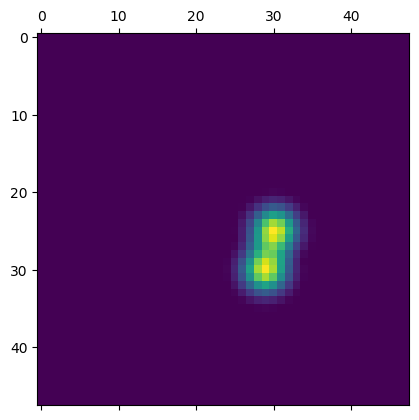

In [210]:
import matplotlib.pyplot as plt
plt.matshow(gridtensor[0,24,:,:])

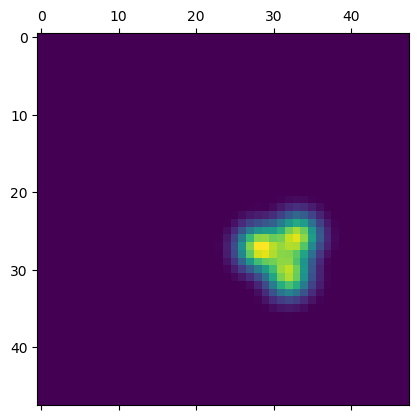

In [211]:
plt.matshow(gridtensor[1,24,:,:])

In [212]:
gridtensor.size()

torch.Size([14, 48, 48, 48])

In [213]:
# gridtensor[0]

In [214]:
# gridtensor[0][0]

In [215]:
# gridtensor[0][0][0]

In [216]:
# gridtensor[0][0][0][0]

In [217]:
# t_np = gridtensor.numpy() #convert to Numpy array
# df = pd.DataFrame(t_np) #convert to a dataframe
# df.to_csv("testfile",index=False) #save to file

# #Then, to reload:
# df = pd.read_csv("testfile")
gridtensor.size()[0]

14

In [218]:
gridtensor[13][20][20]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

/tmp/ipykernel_1001642/4031820186.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(gridtensor[i,j,:,:])


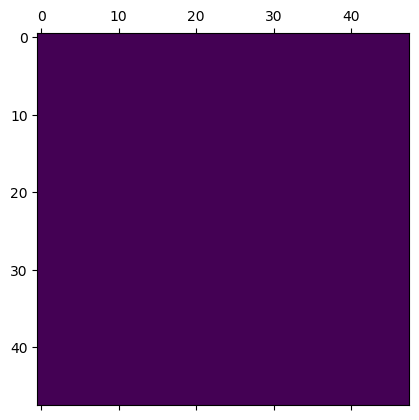

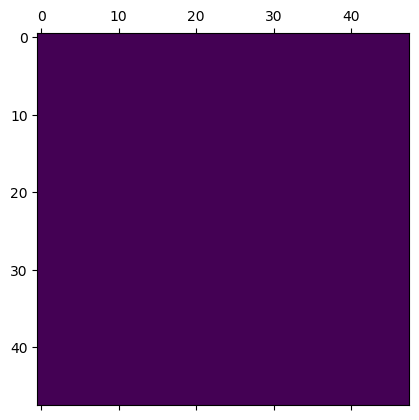

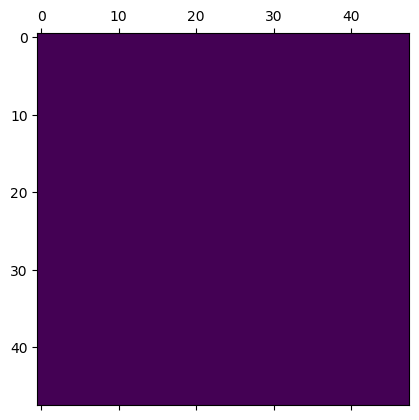

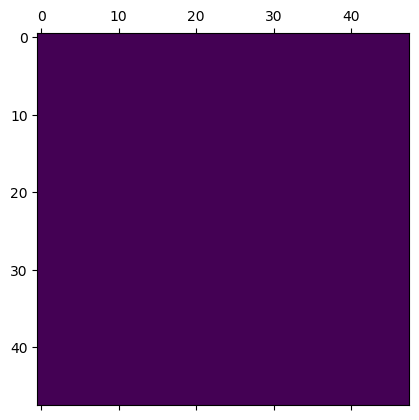

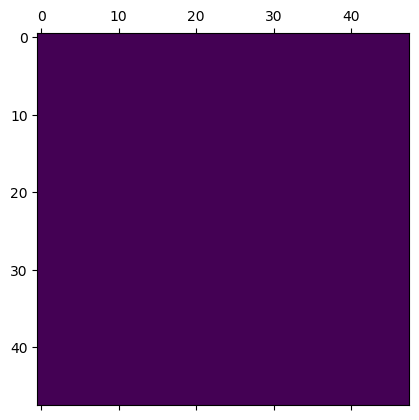

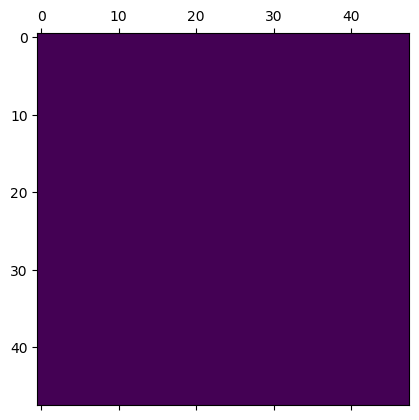

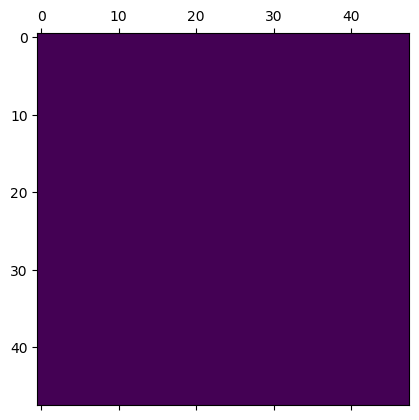

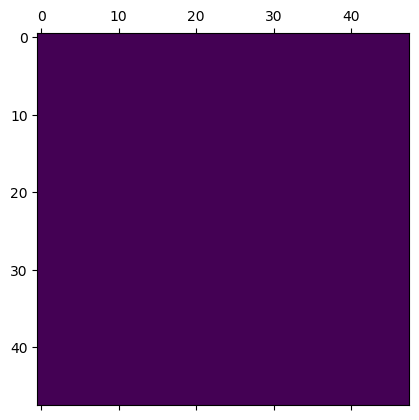

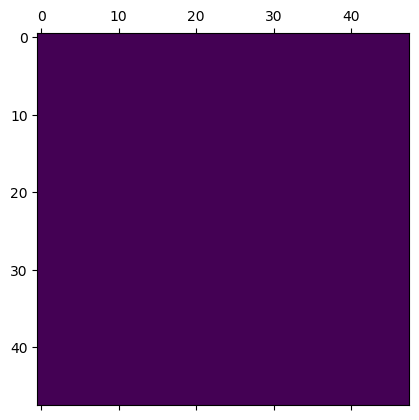

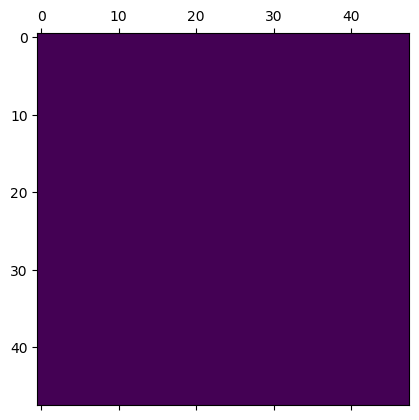

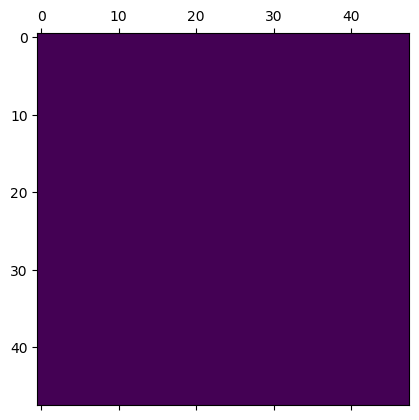

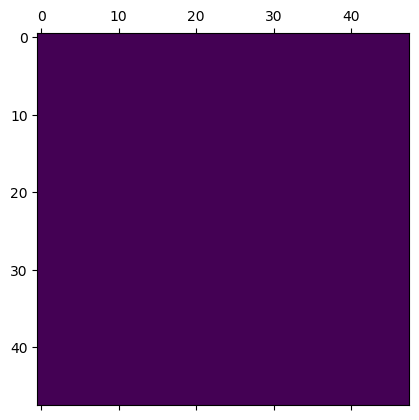

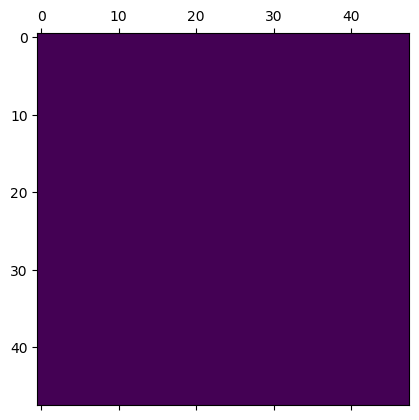

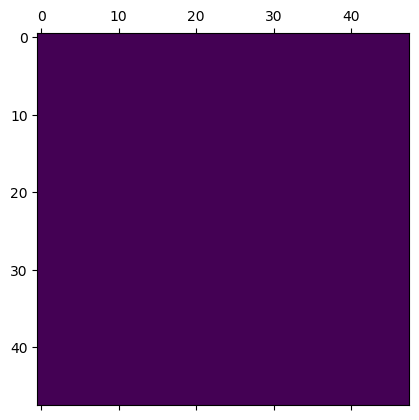

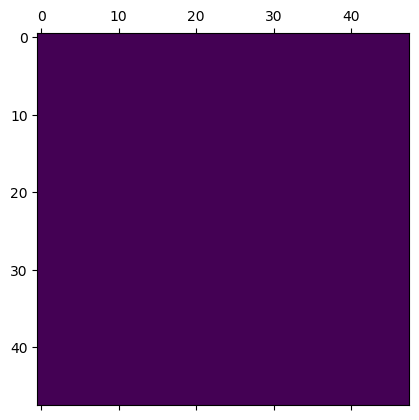

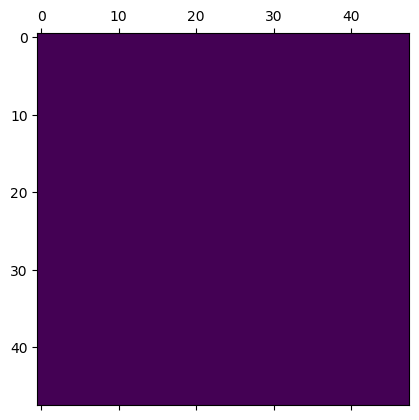

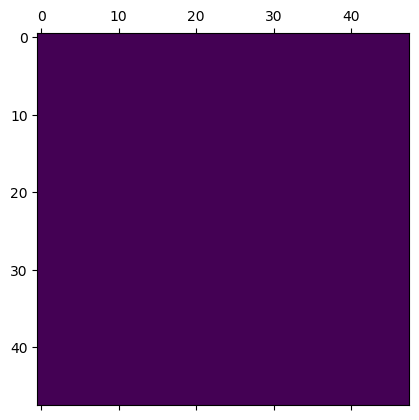

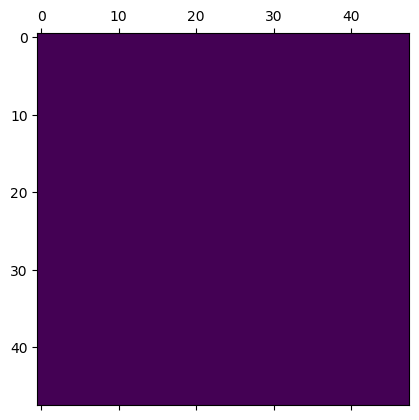

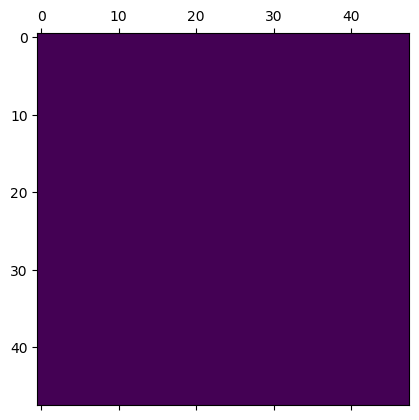

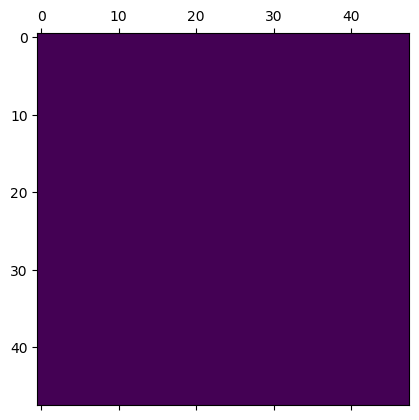

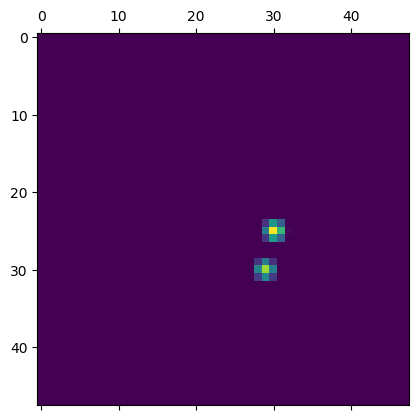

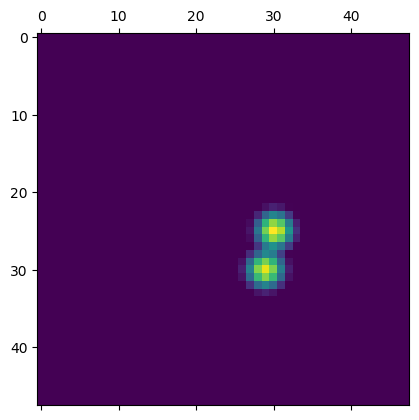

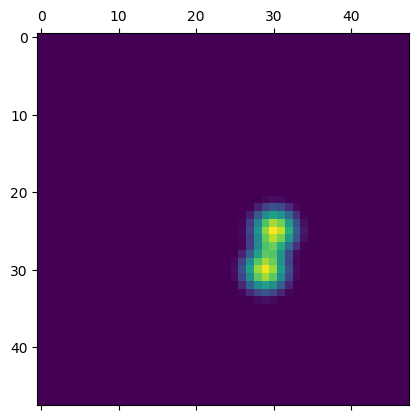

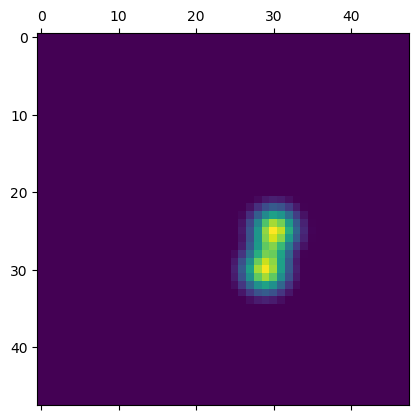

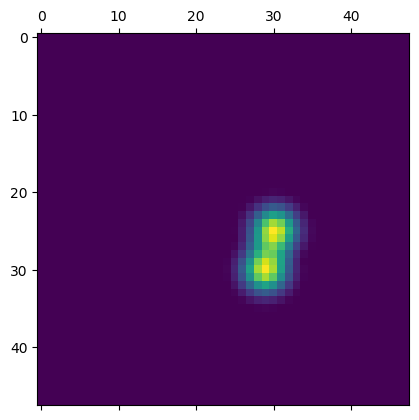

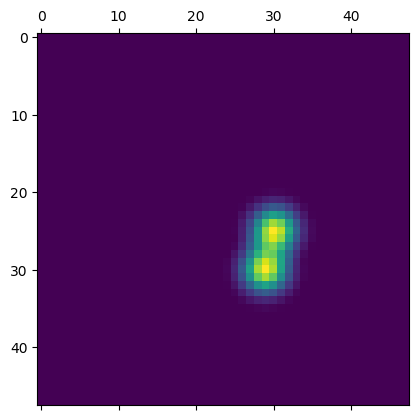

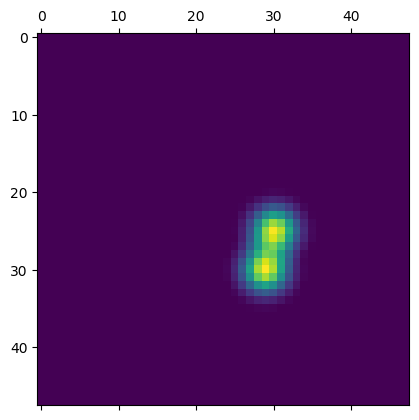

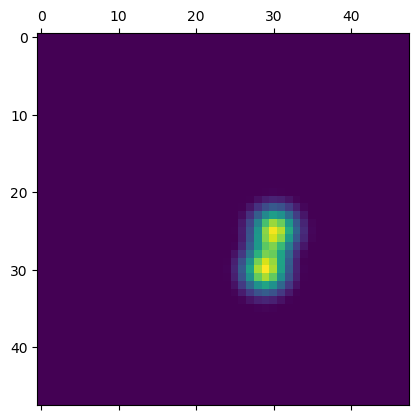

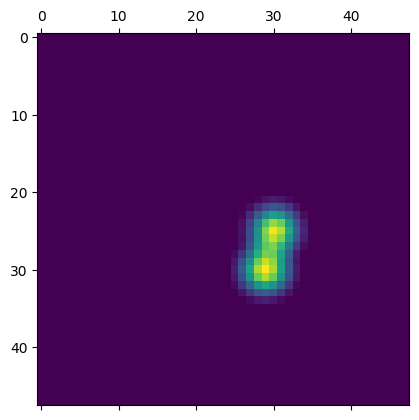

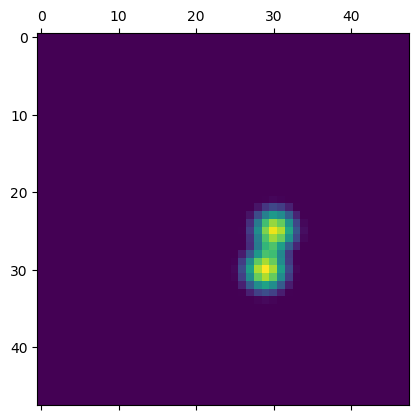

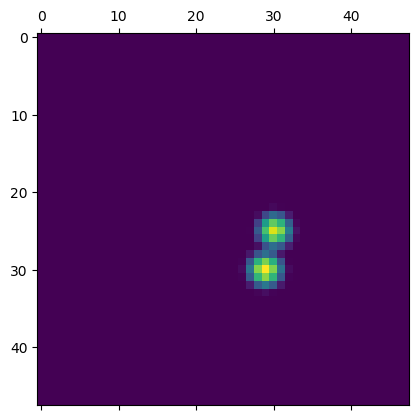

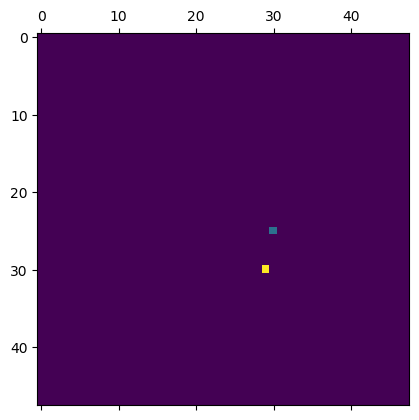

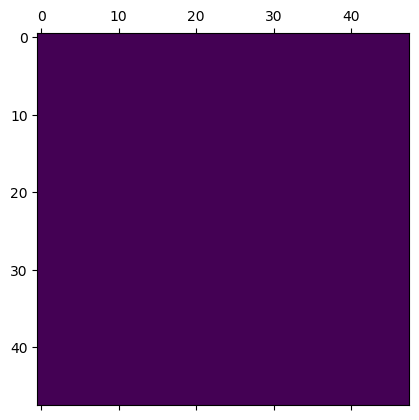

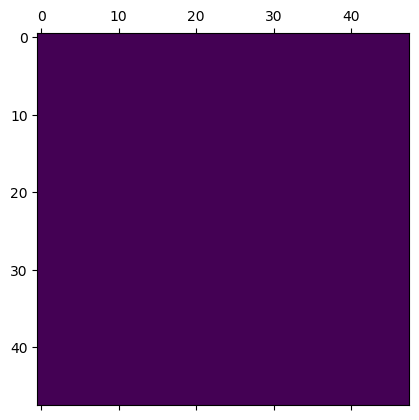

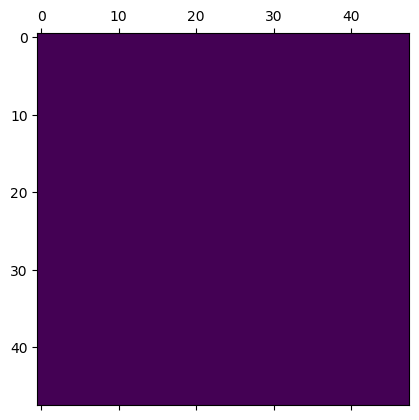

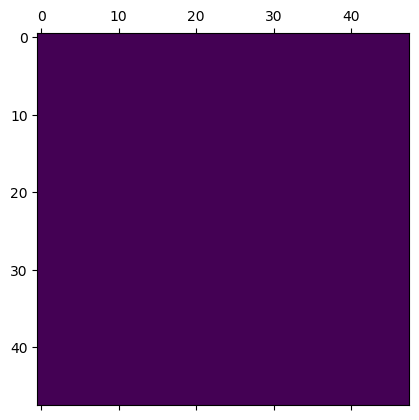

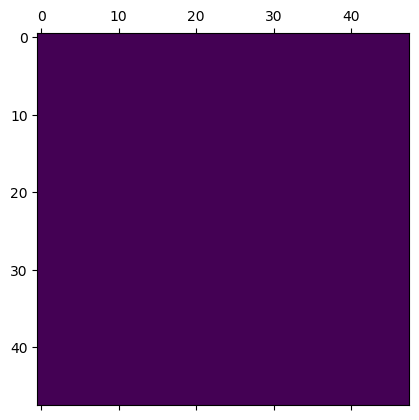

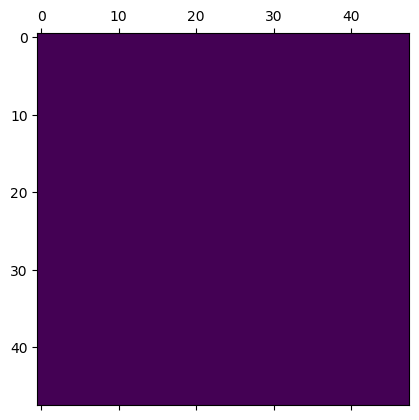

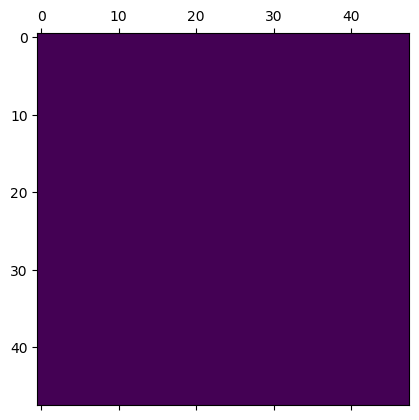

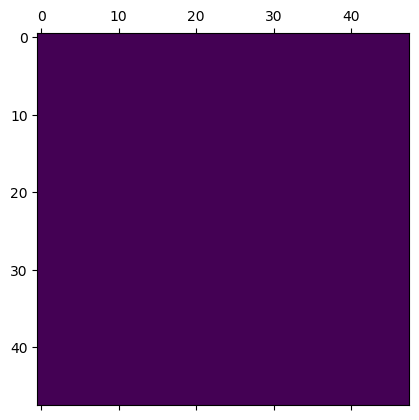

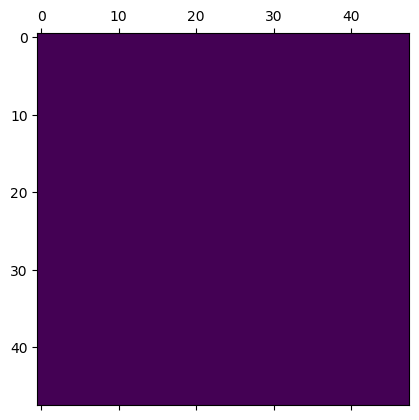

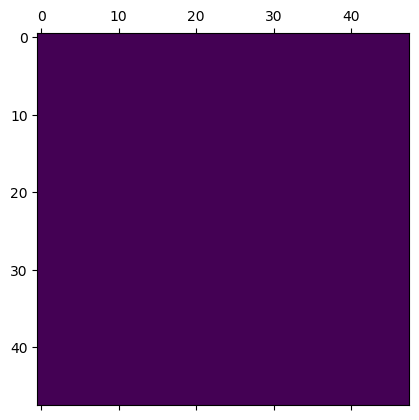

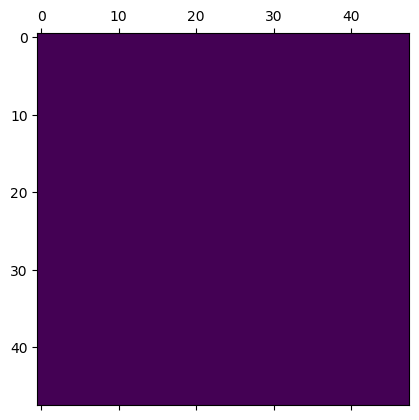

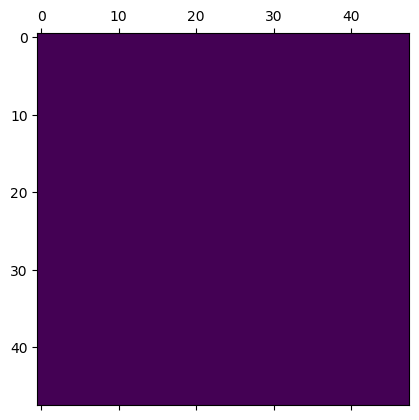

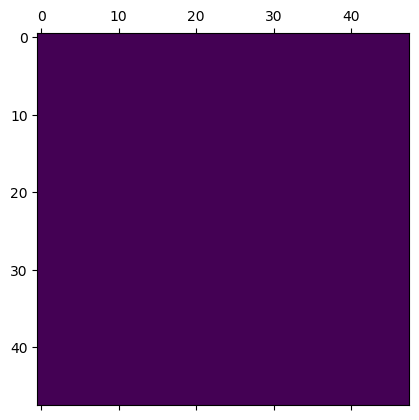

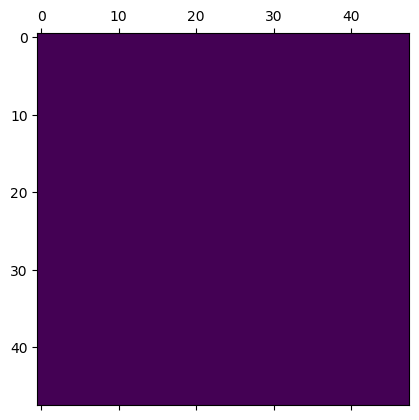

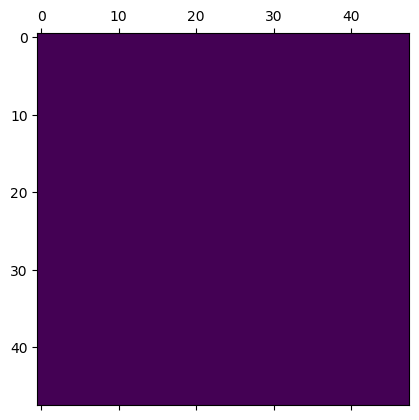

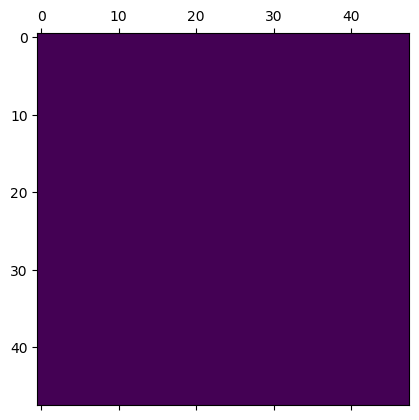

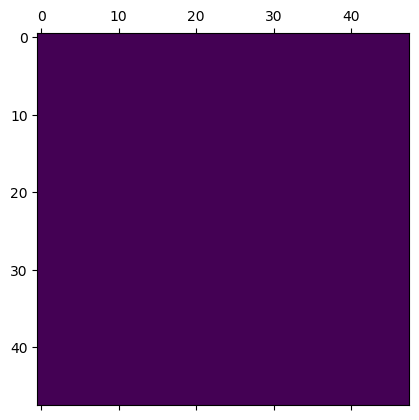

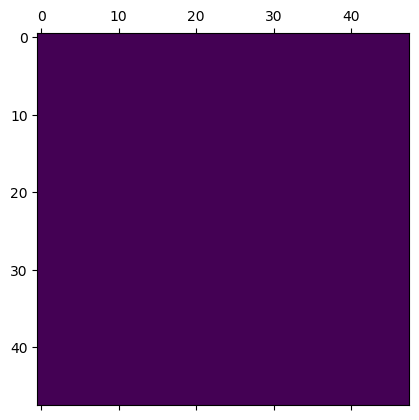

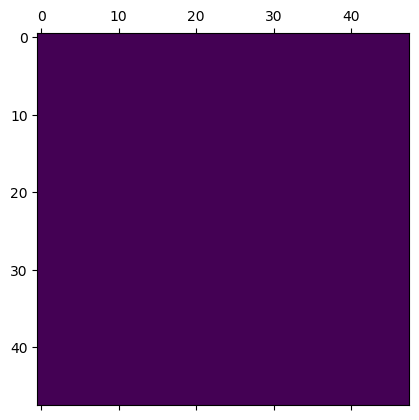

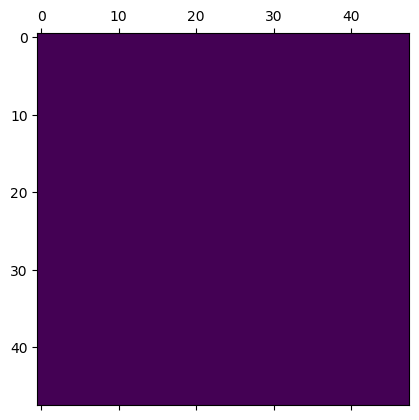

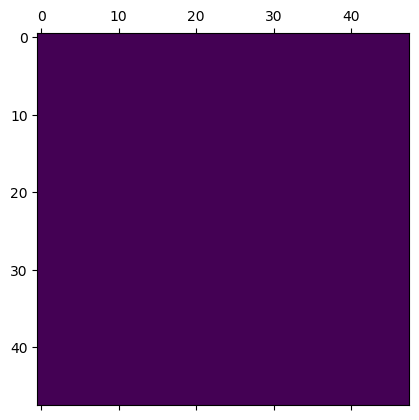

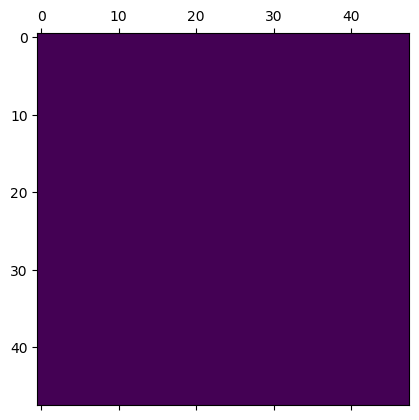

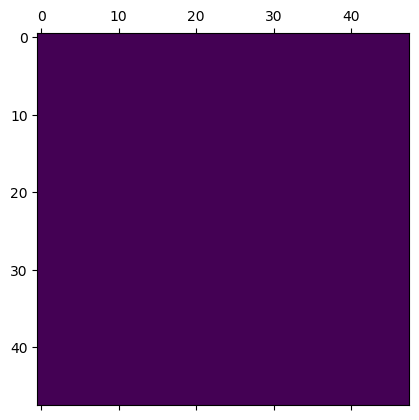

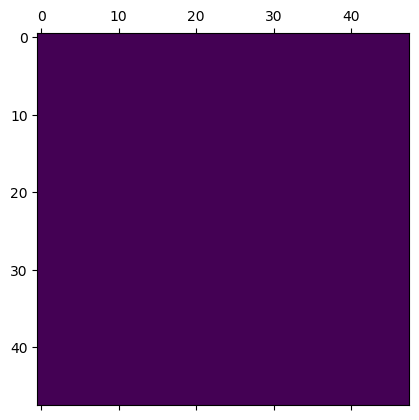

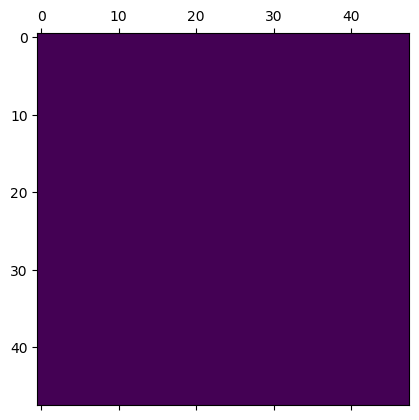

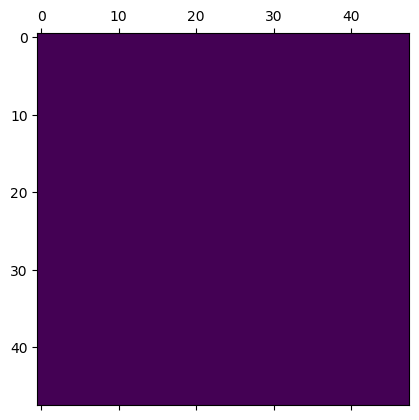

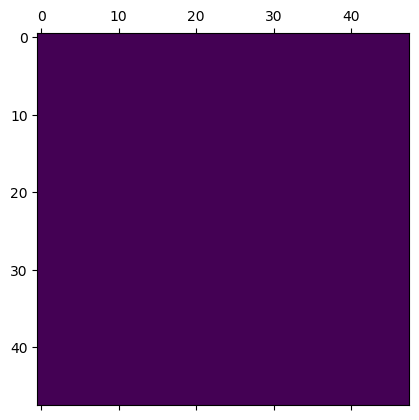

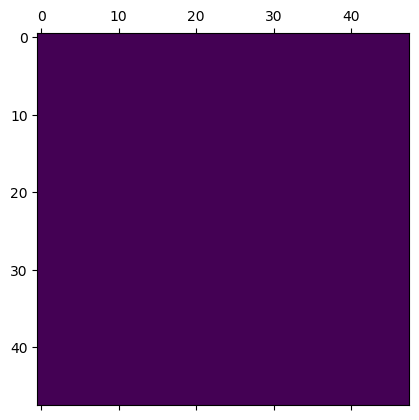

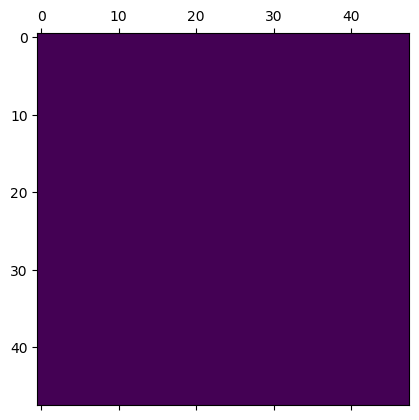

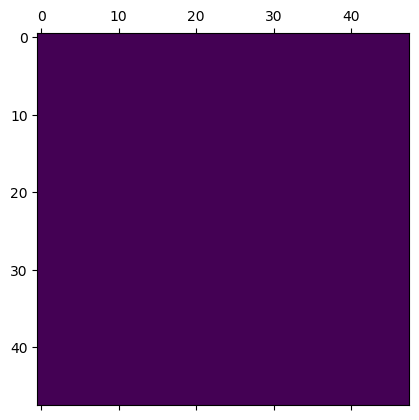

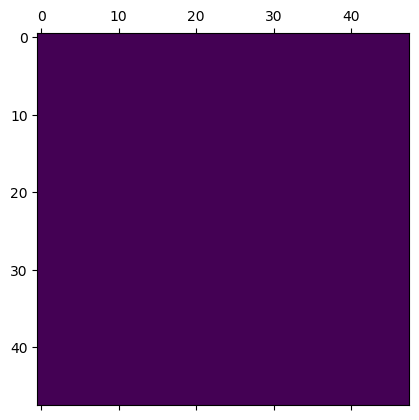

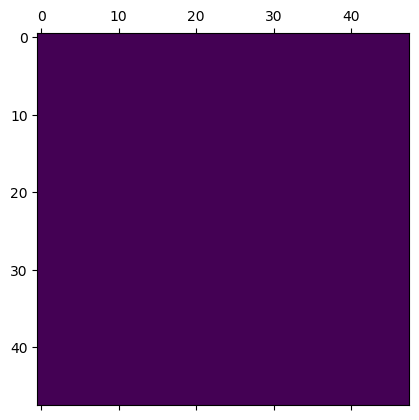

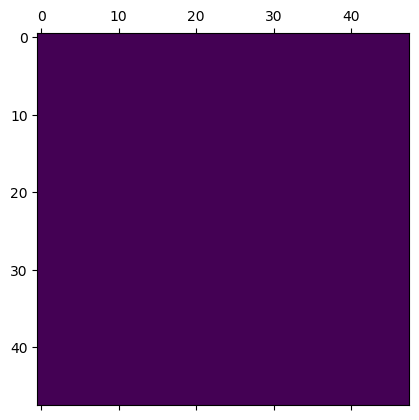

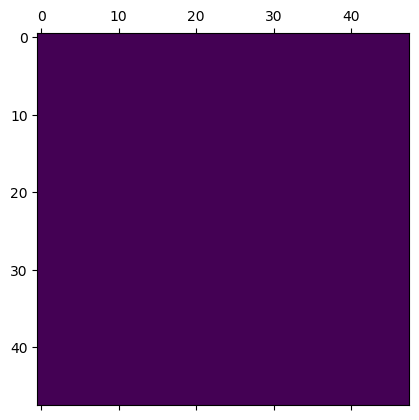

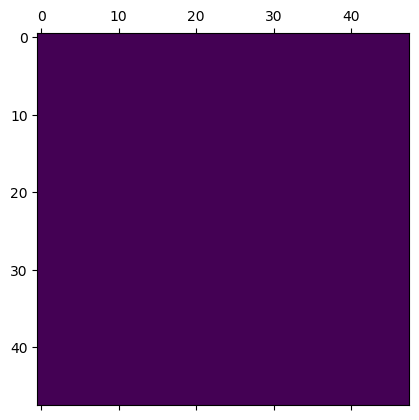

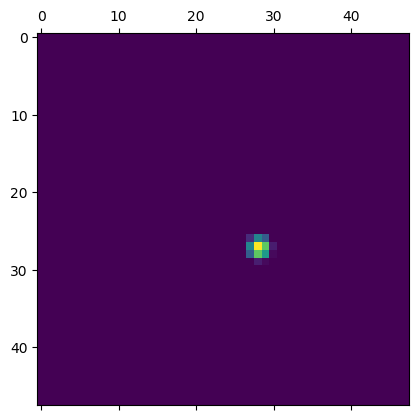

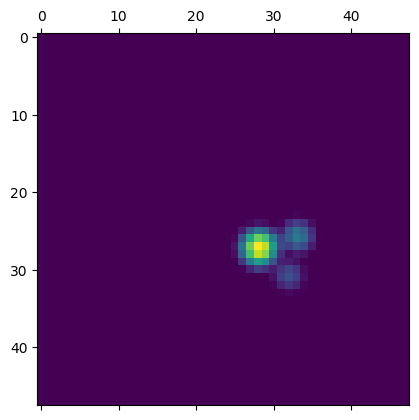

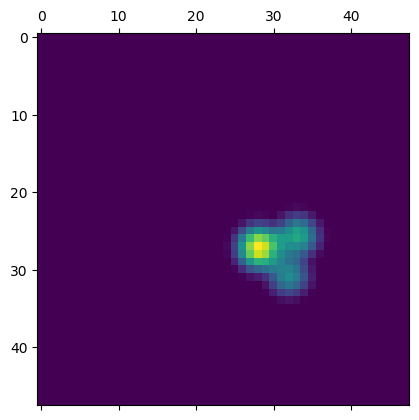

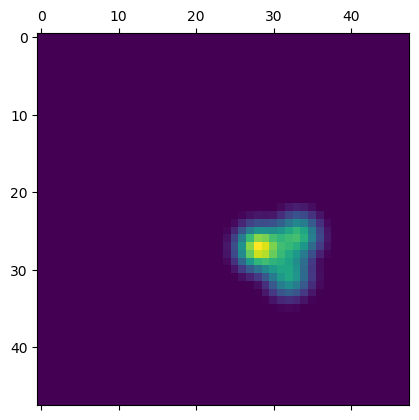

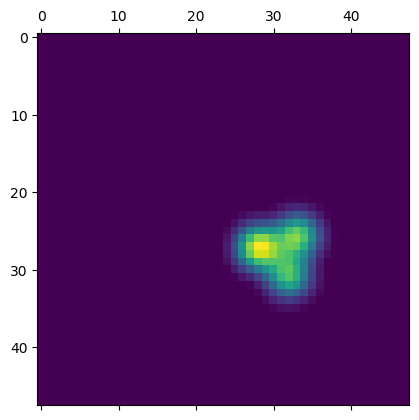

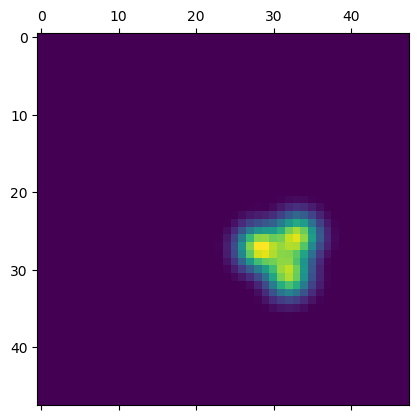

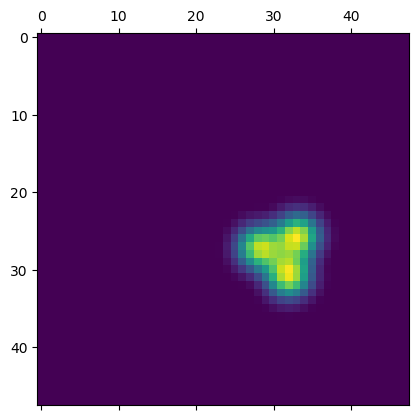

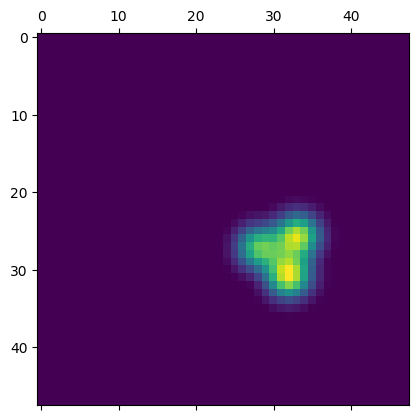

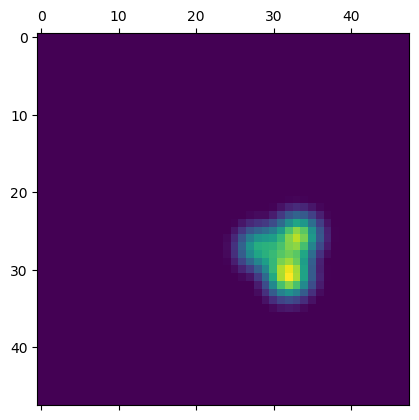

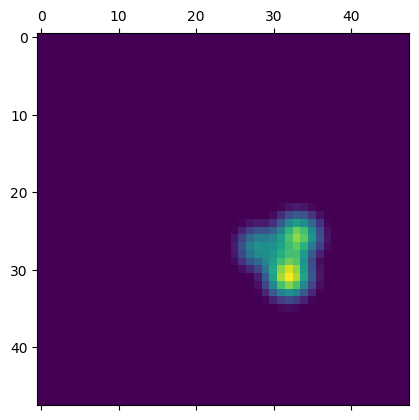

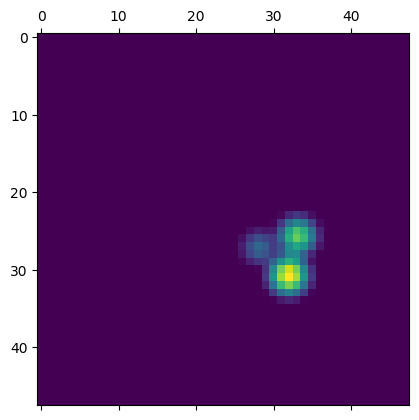

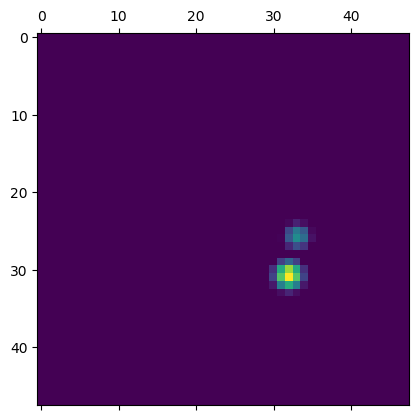

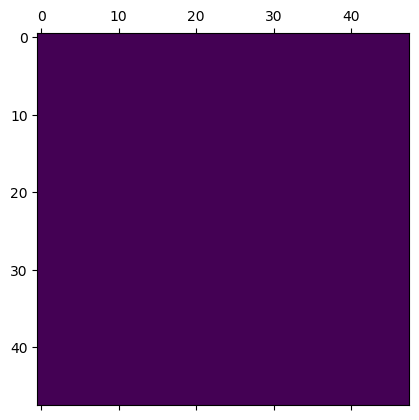

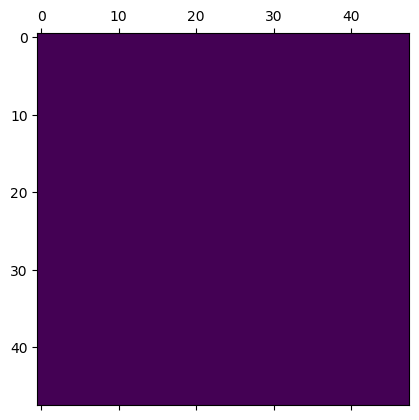

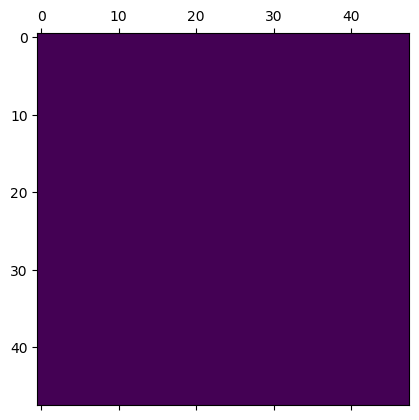

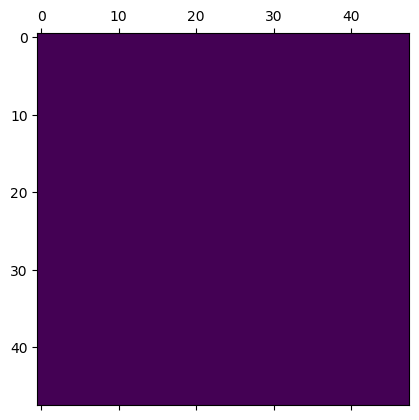

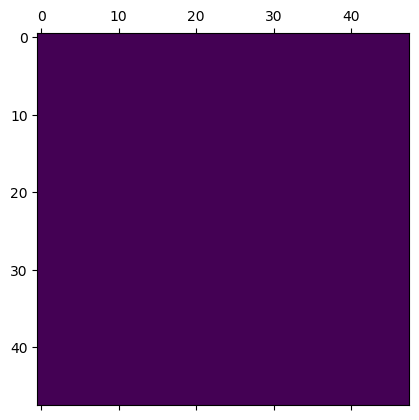

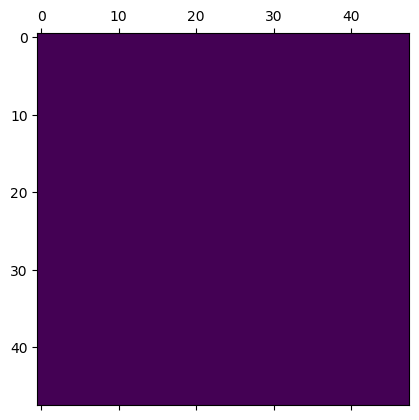

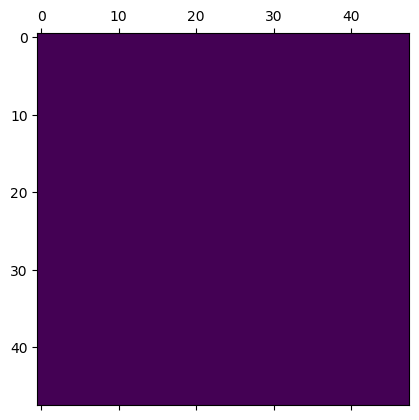

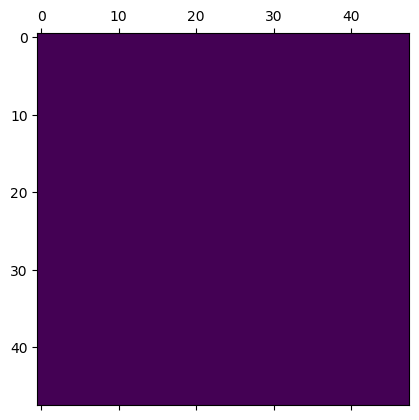

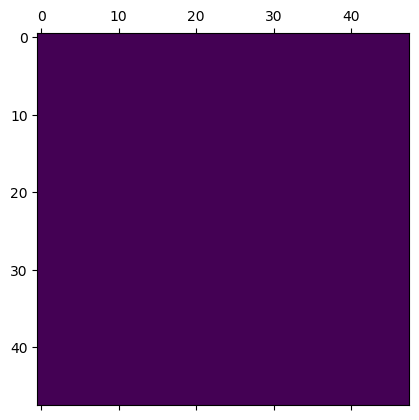

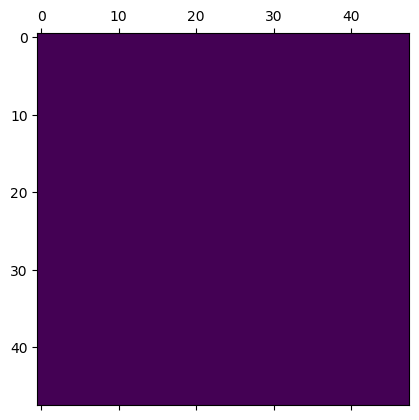

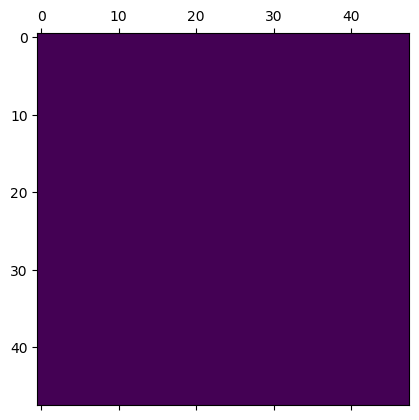

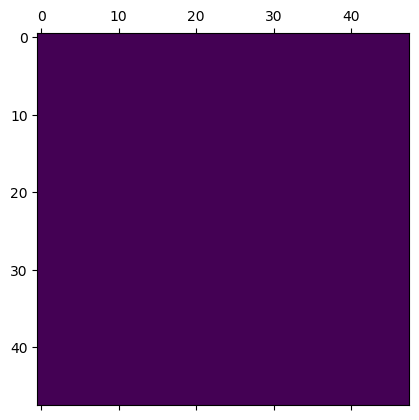

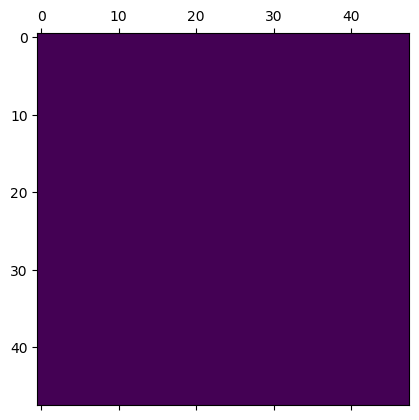

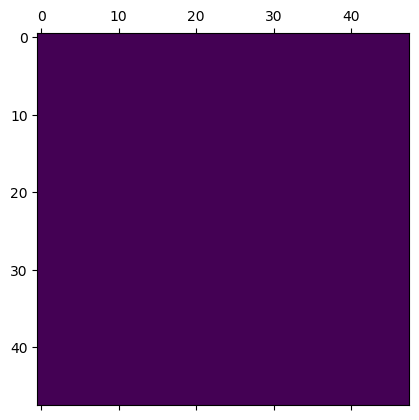

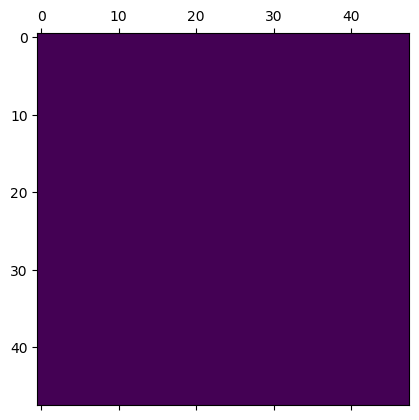

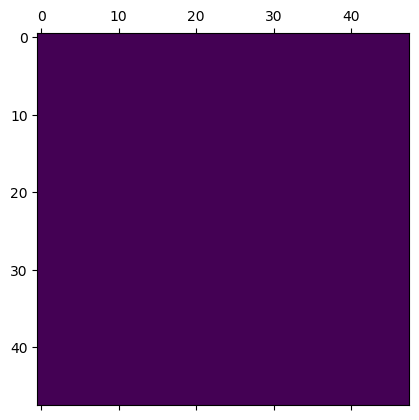

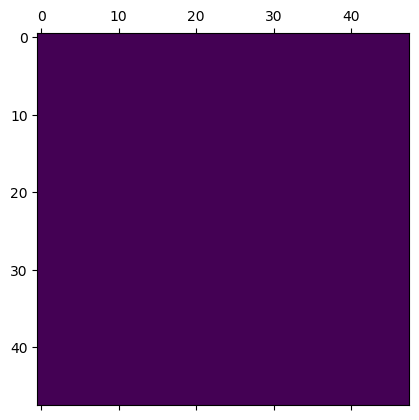

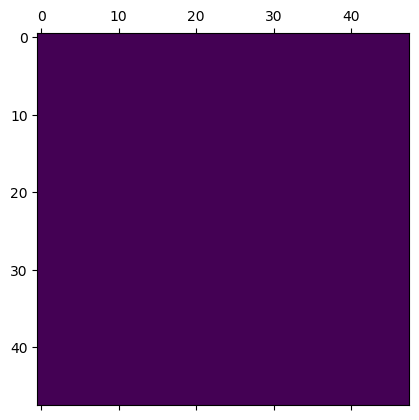

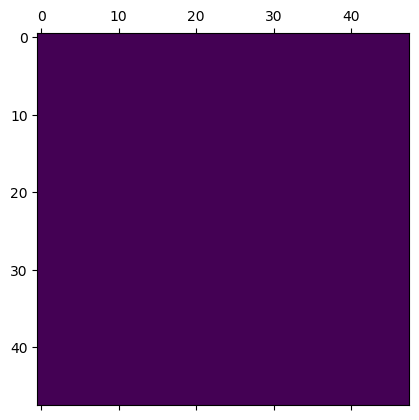

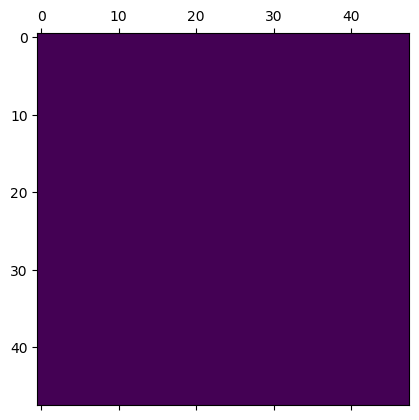

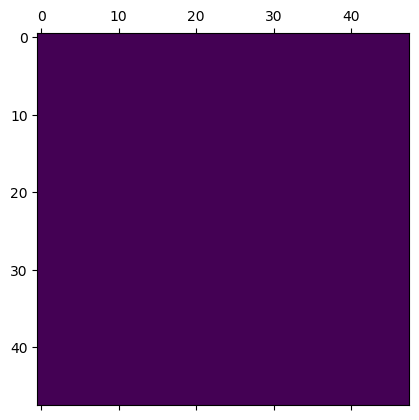

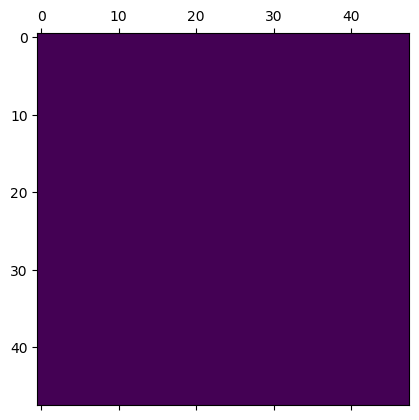

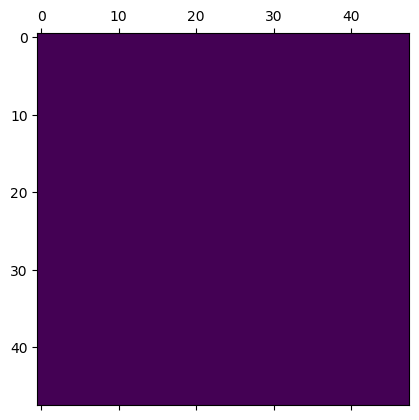

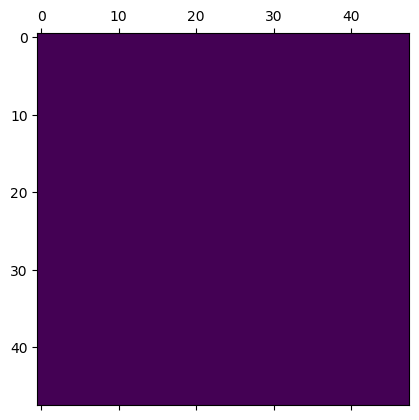

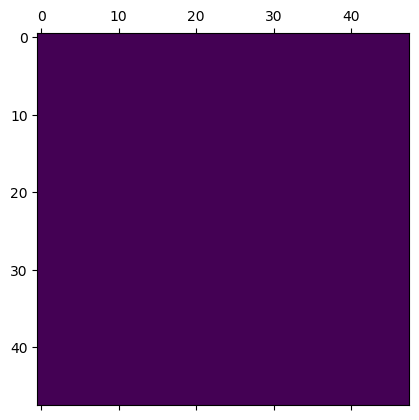

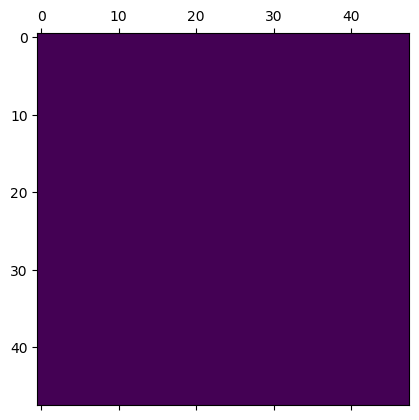

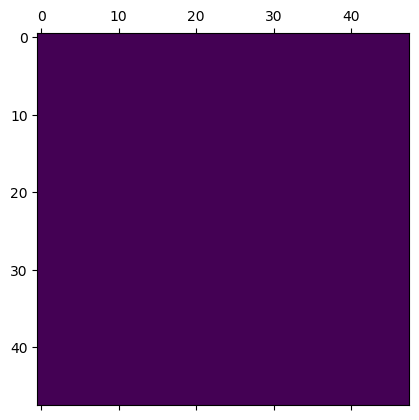

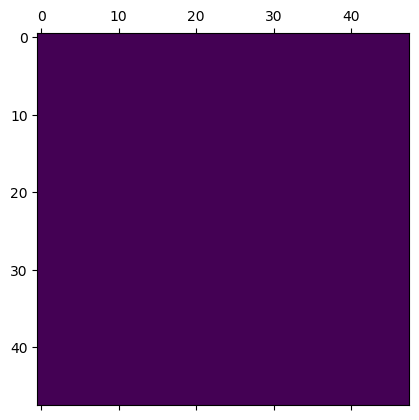

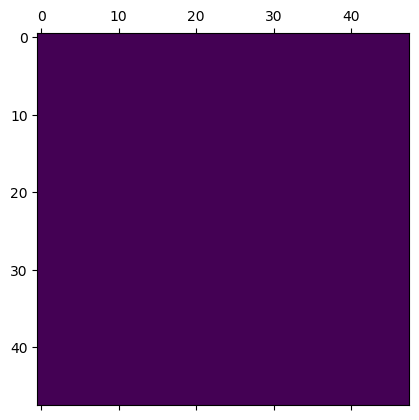

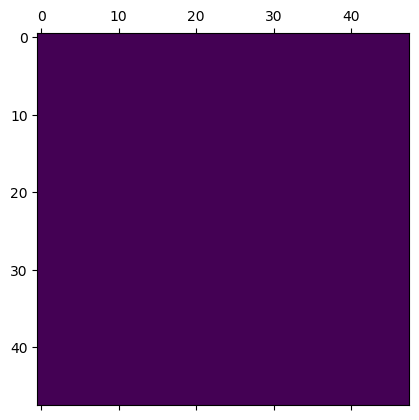

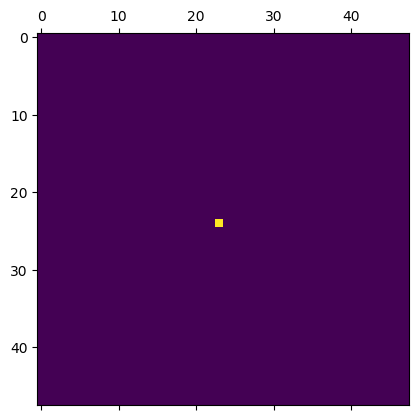

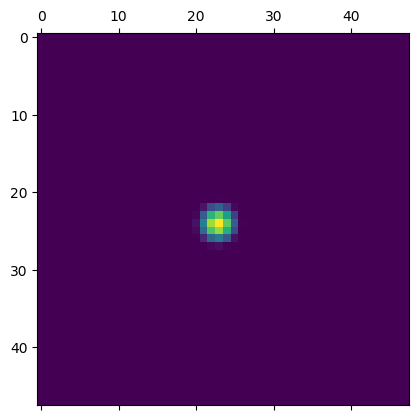

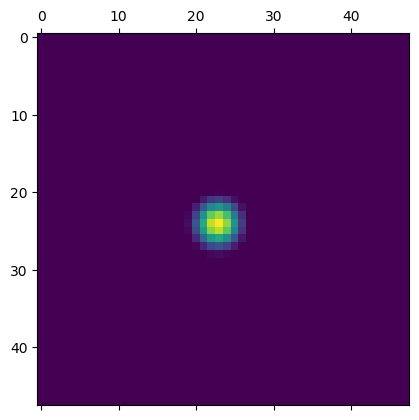

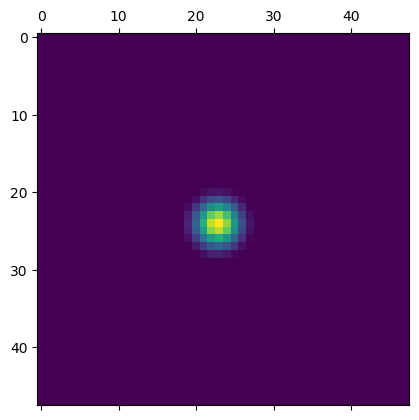

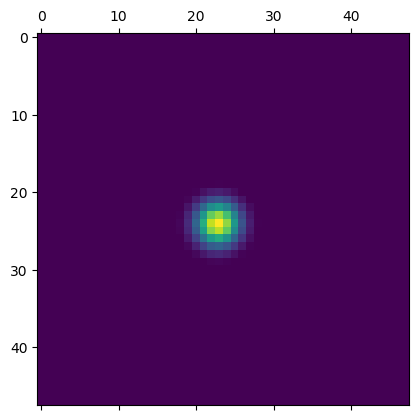

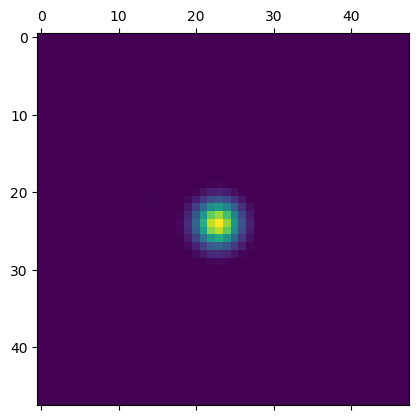

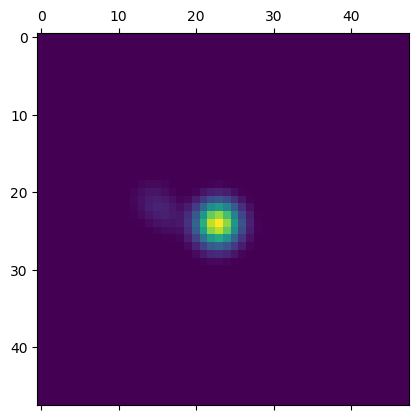

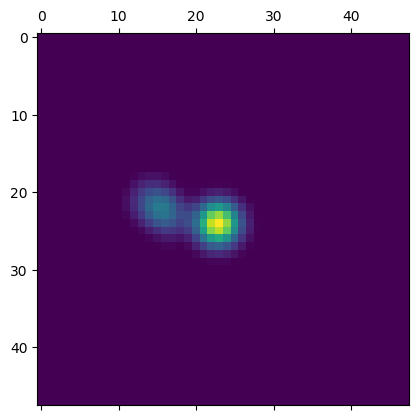

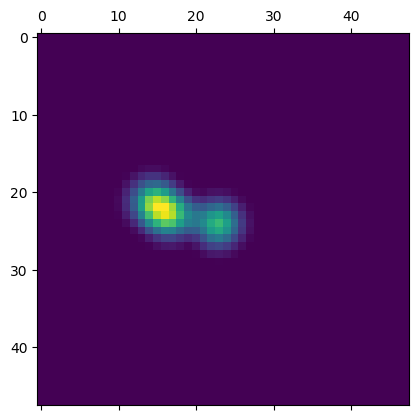

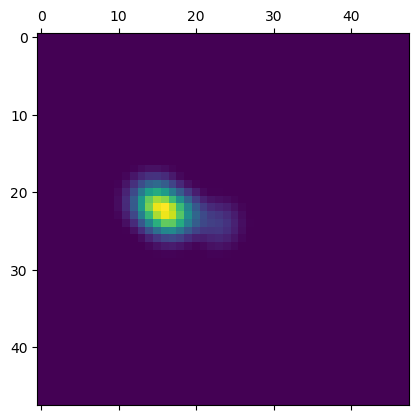

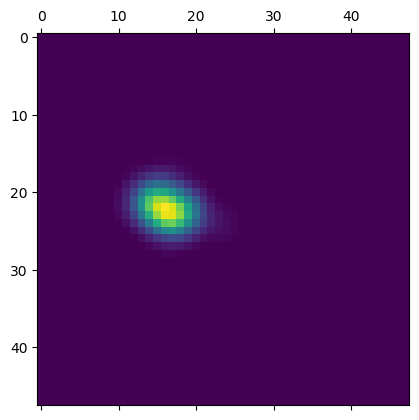

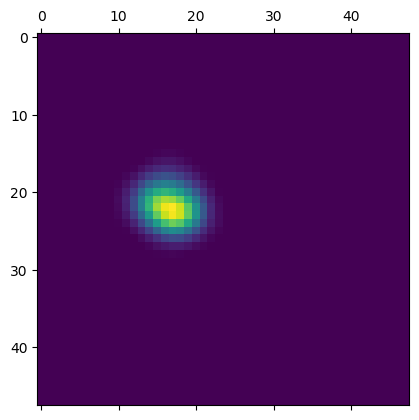

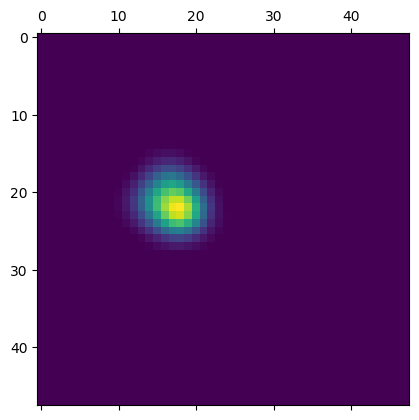

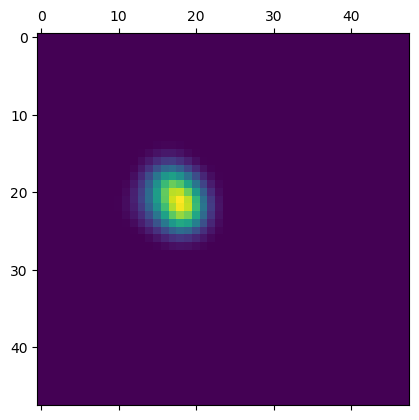

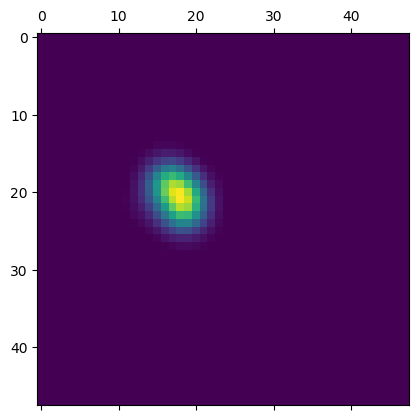

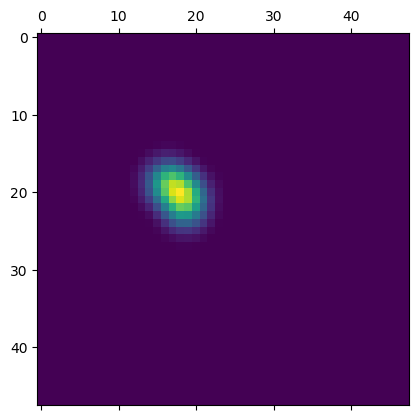

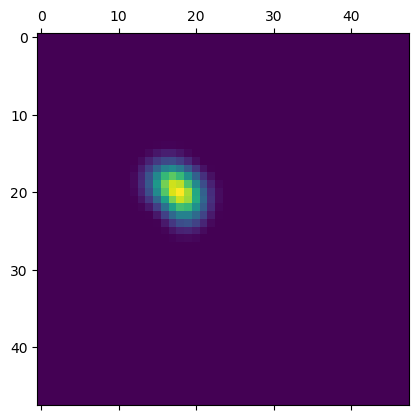

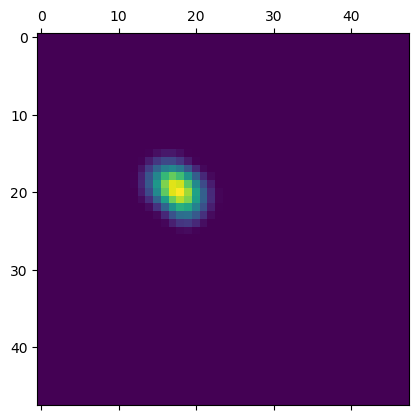

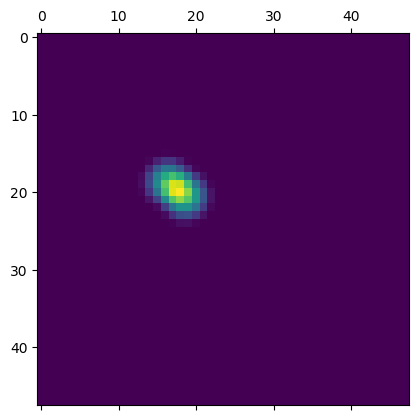

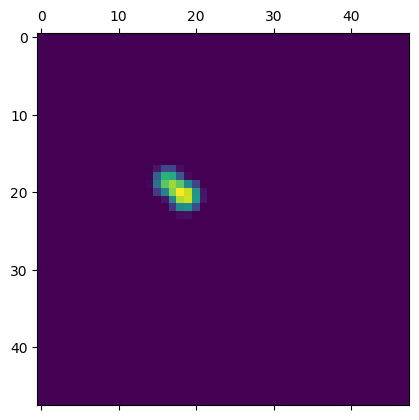

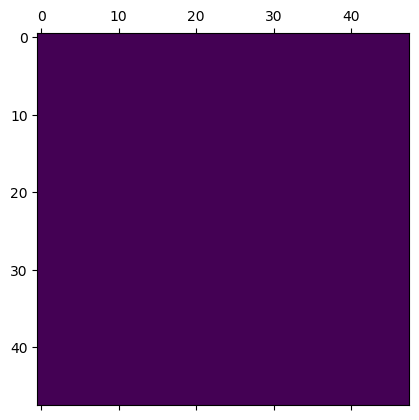

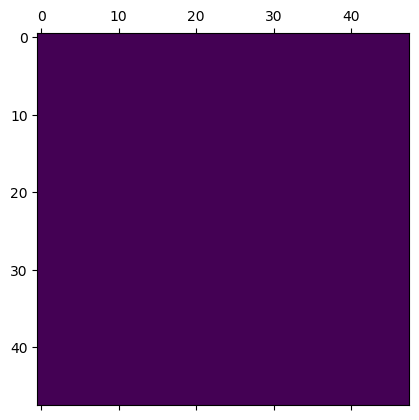

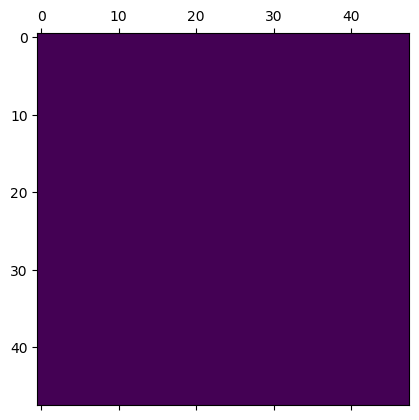

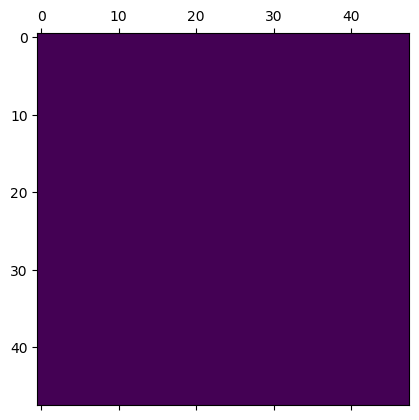

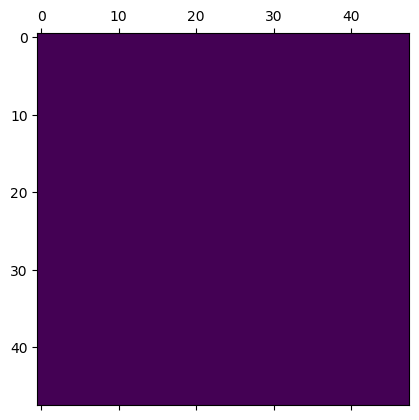

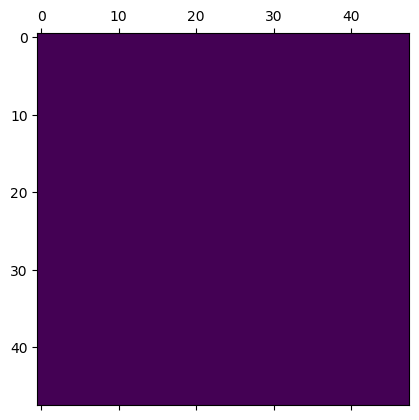

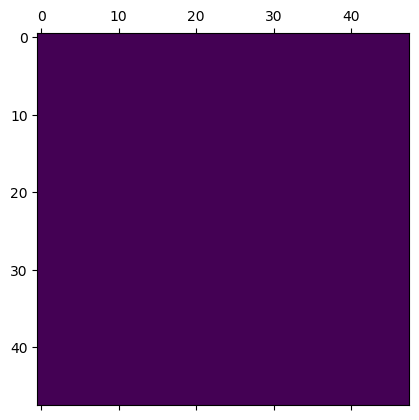

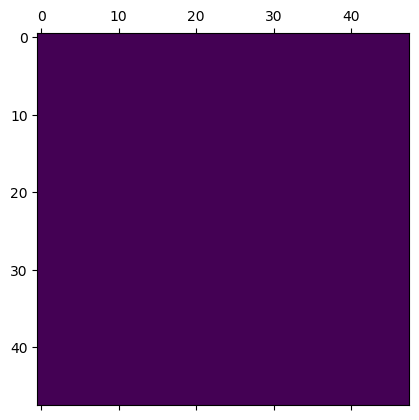

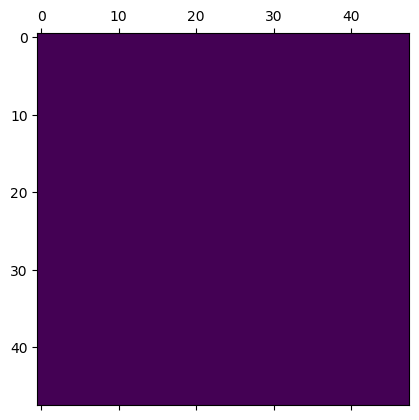

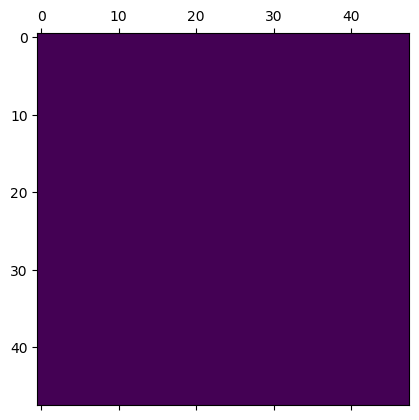

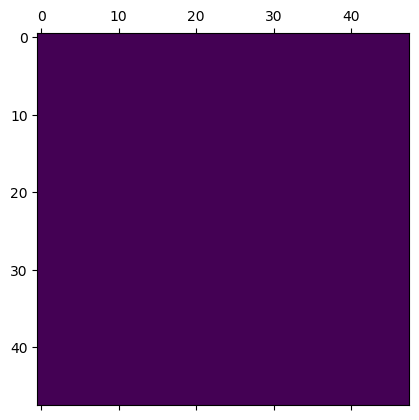

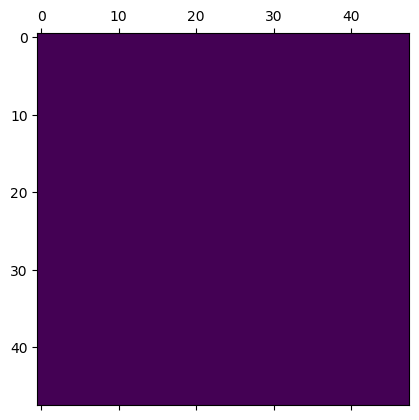

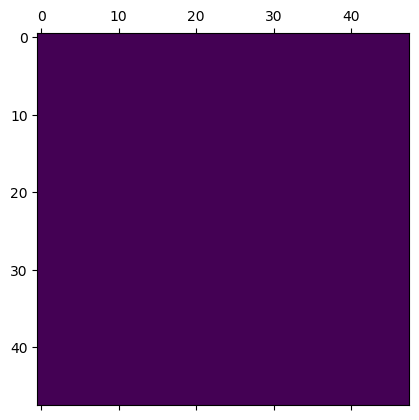

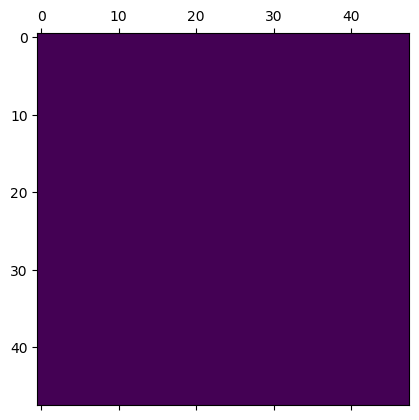

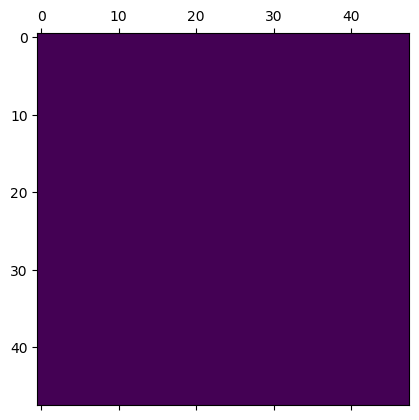

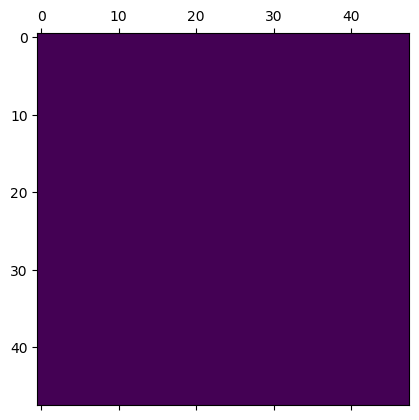

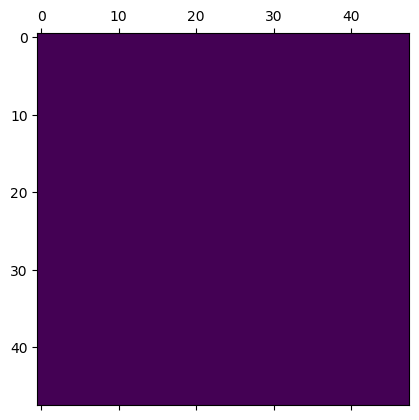

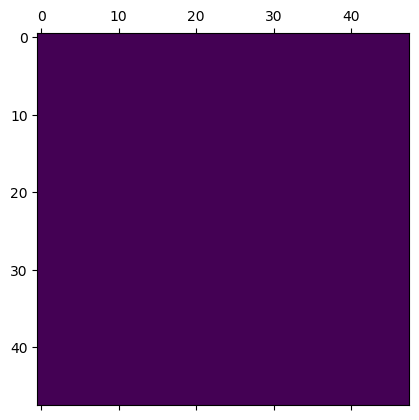

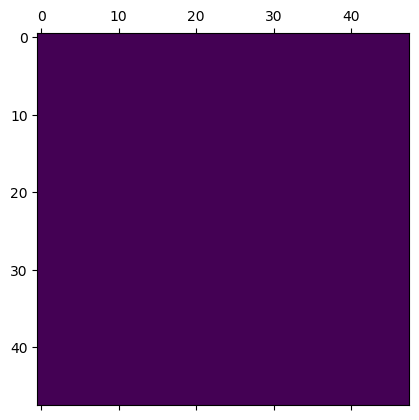

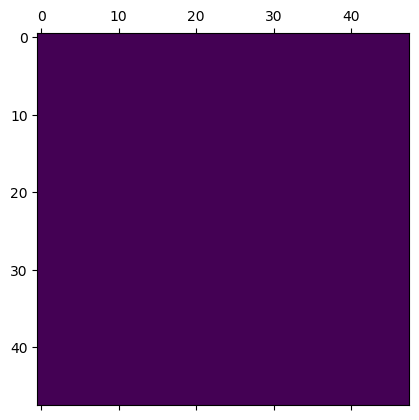

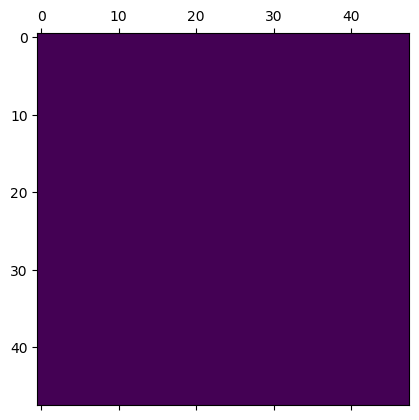

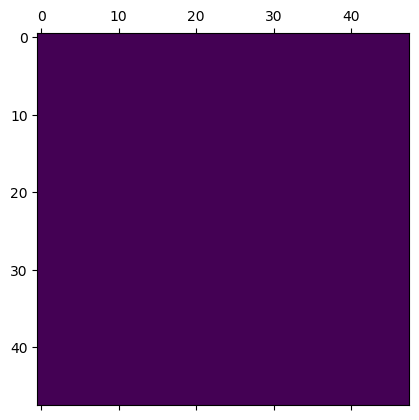

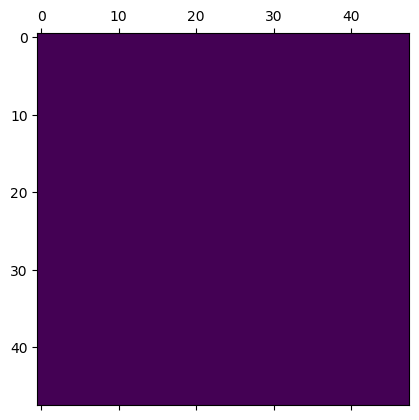

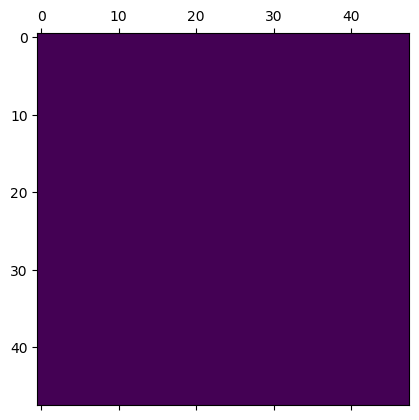

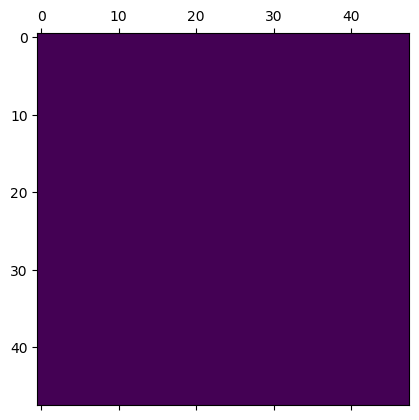

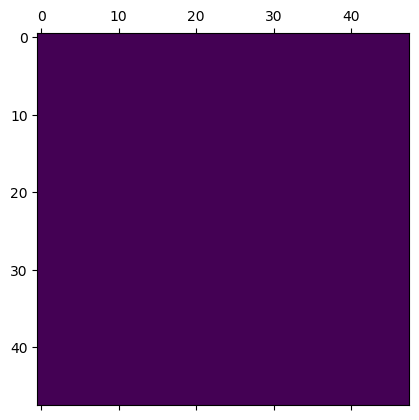

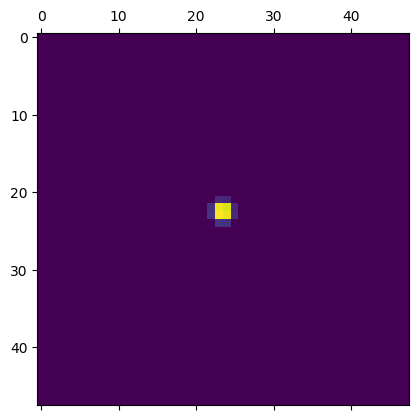

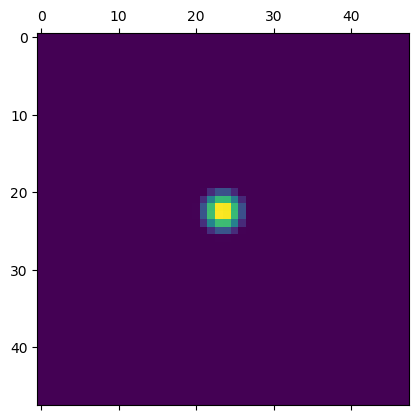

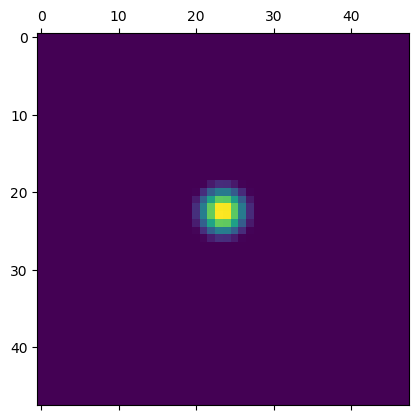

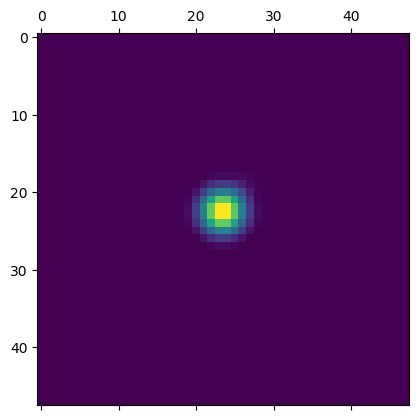

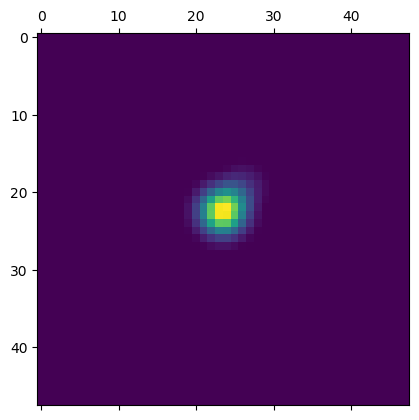

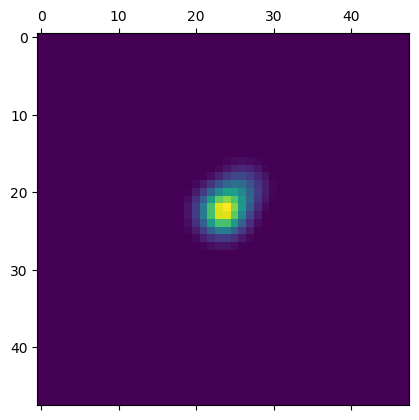

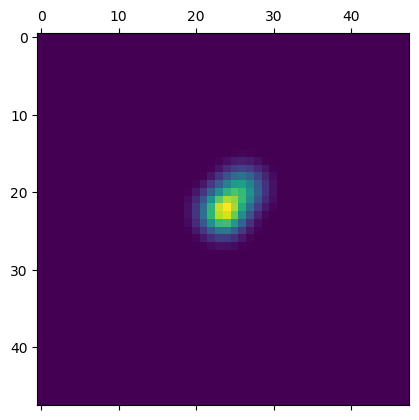

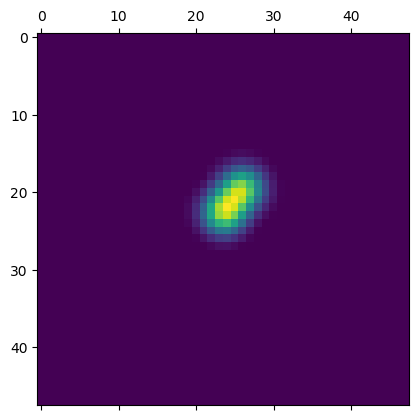

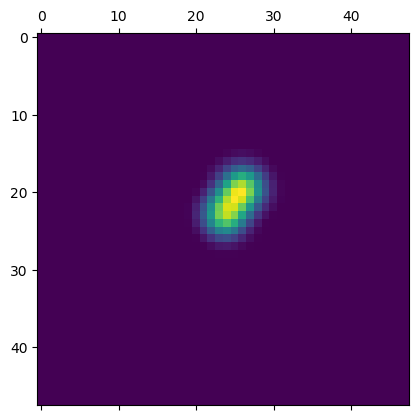

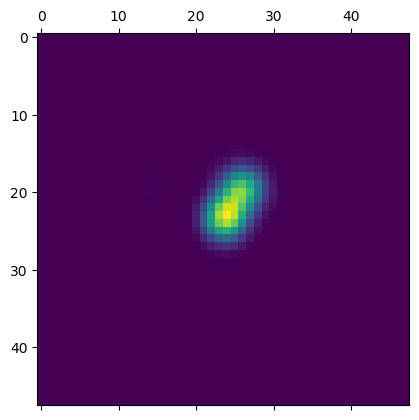

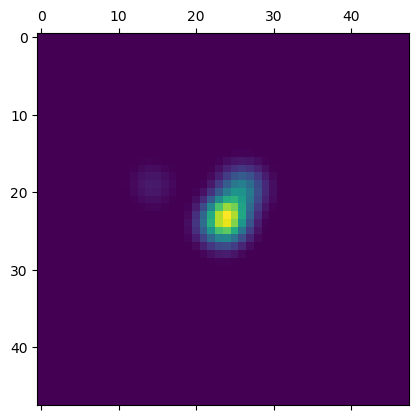

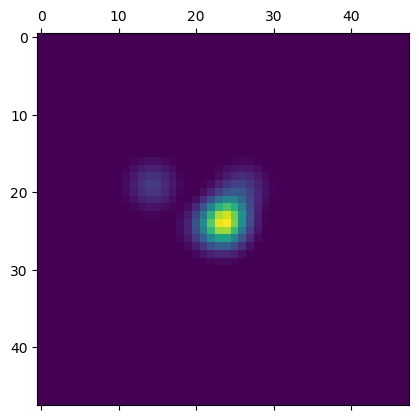

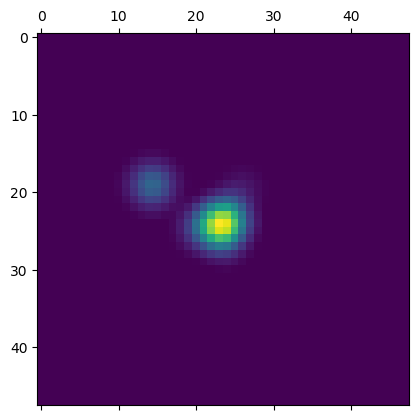

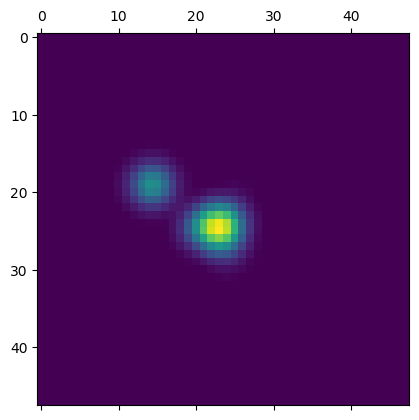

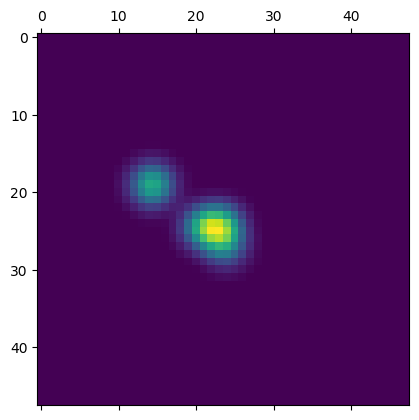

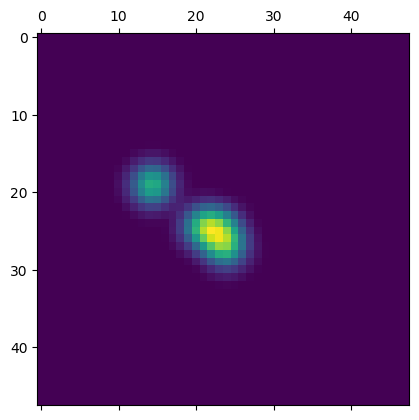

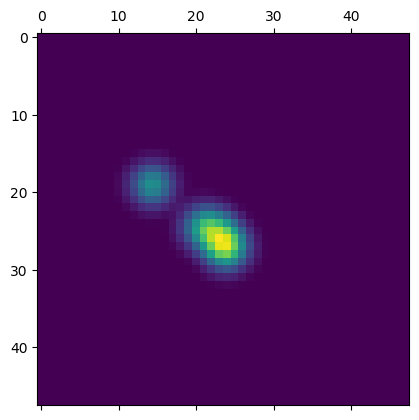

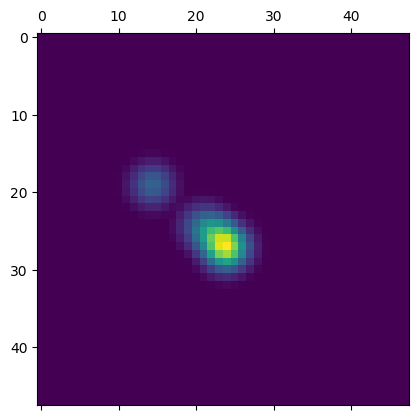

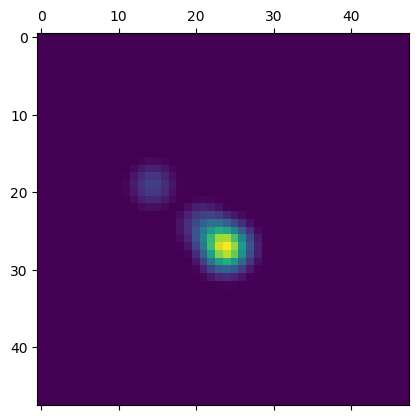

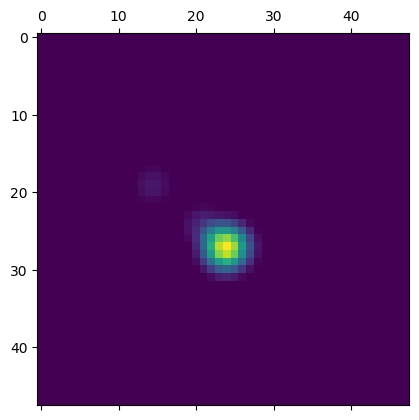

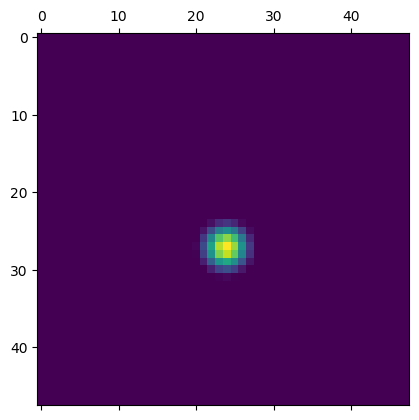

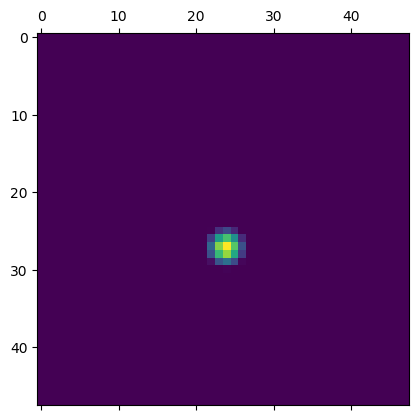

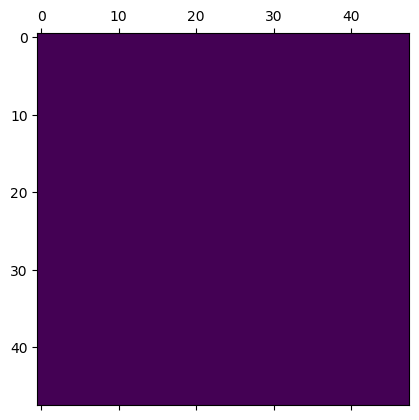

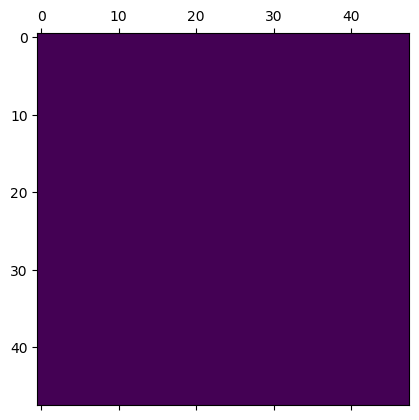

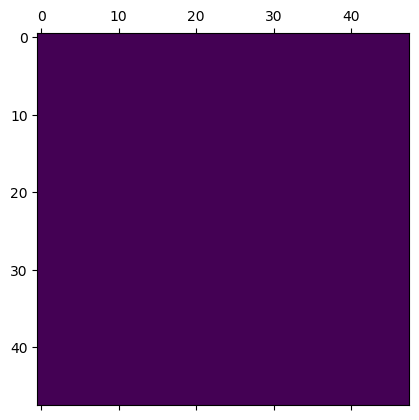

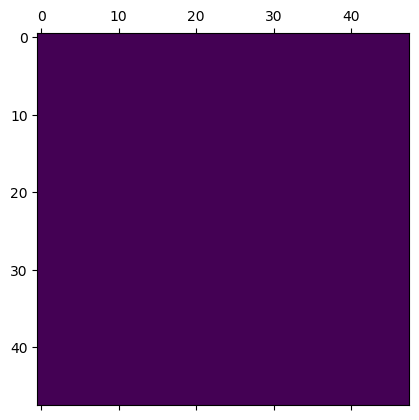

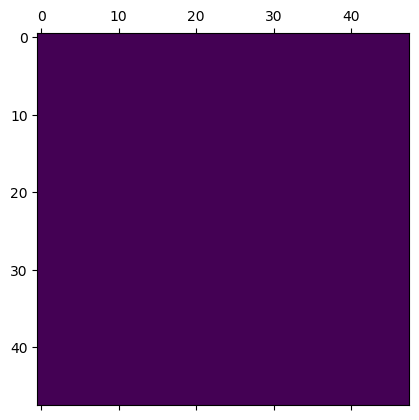

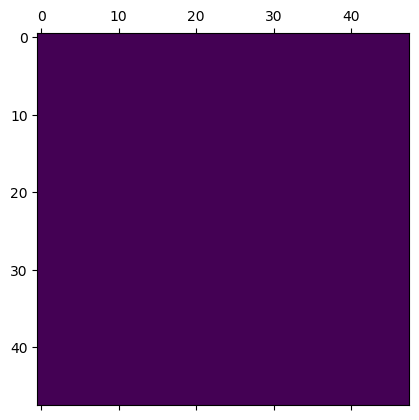

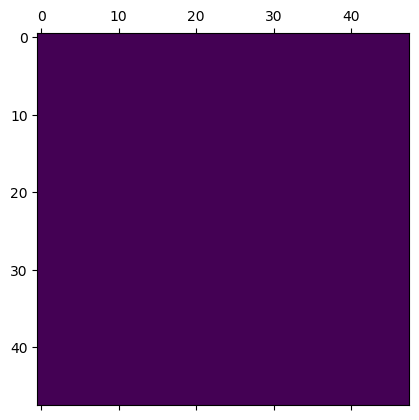

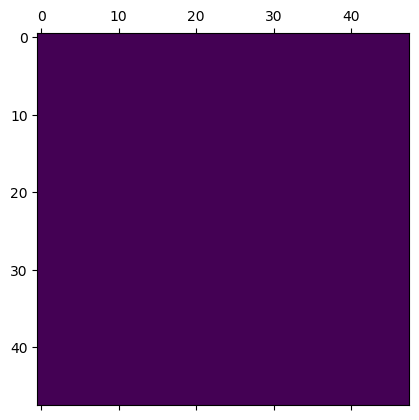

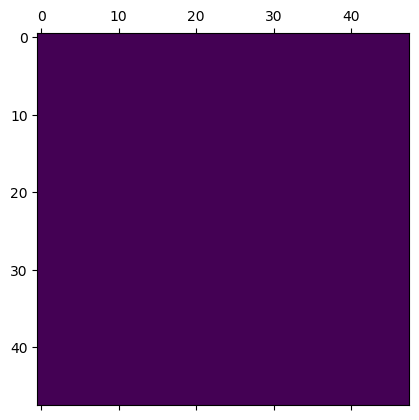

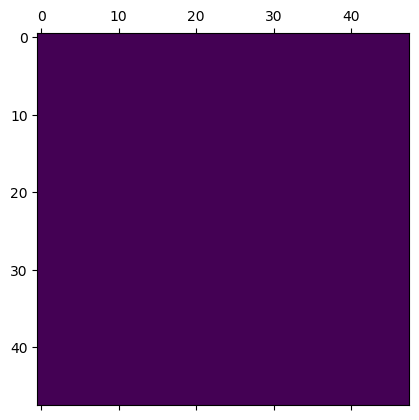

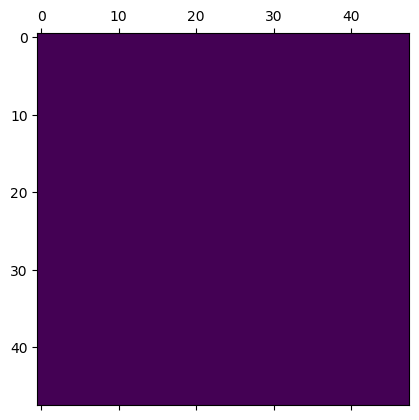

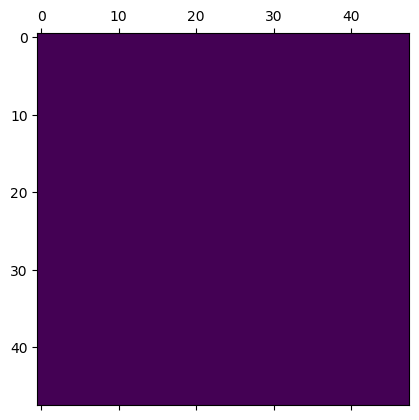

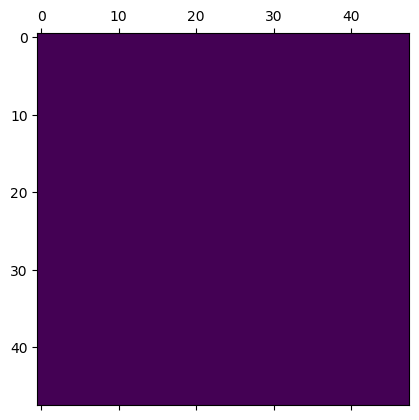

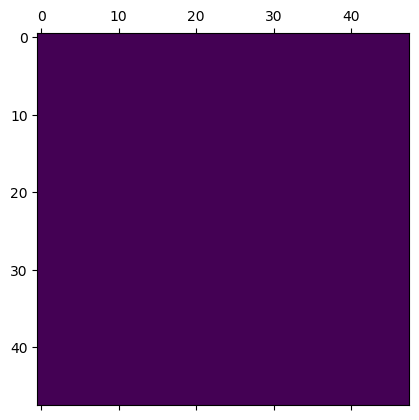

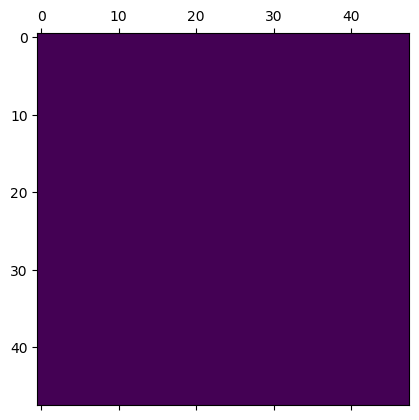

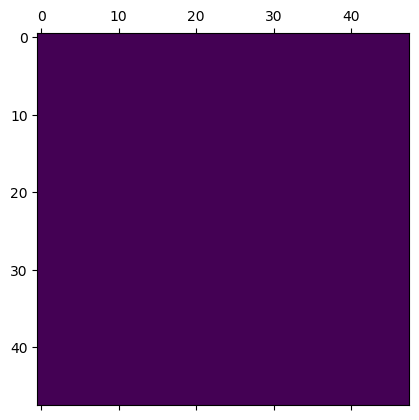

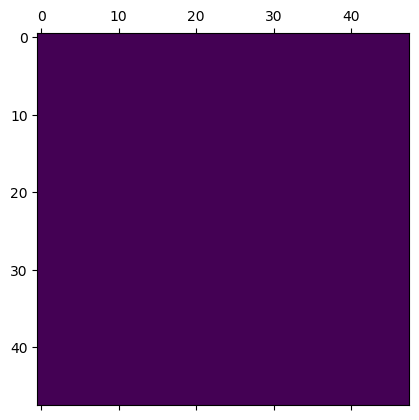

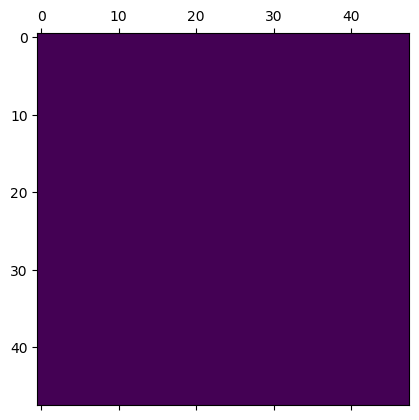

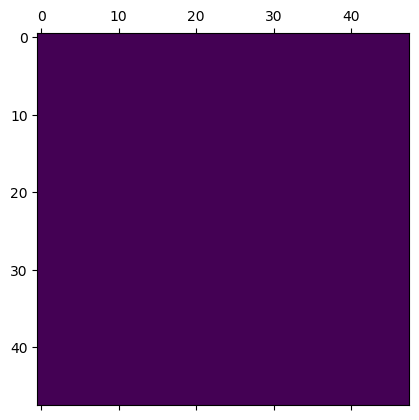

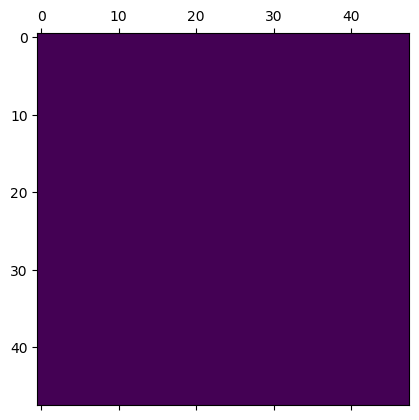

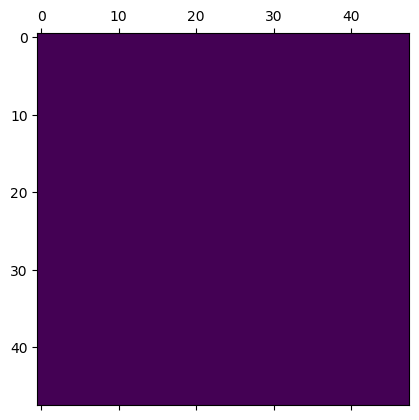

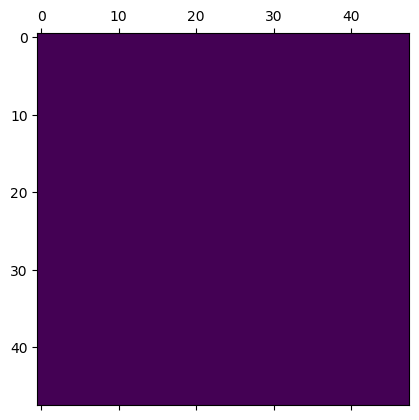

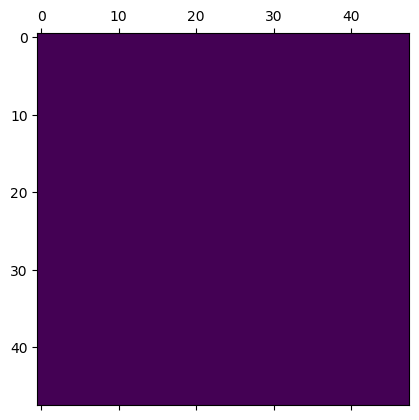

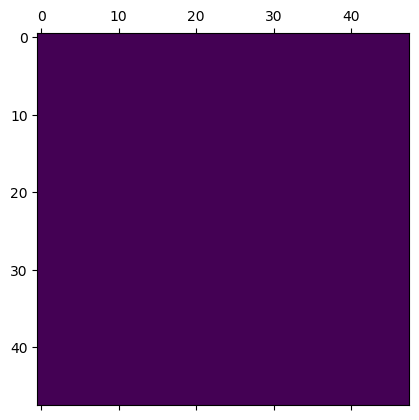

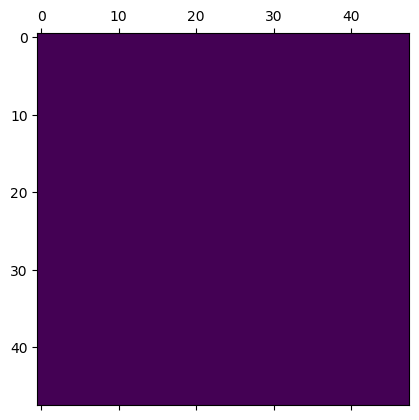

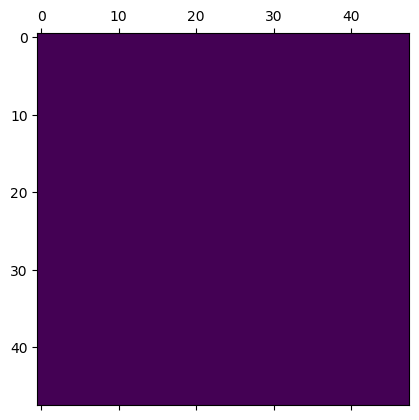

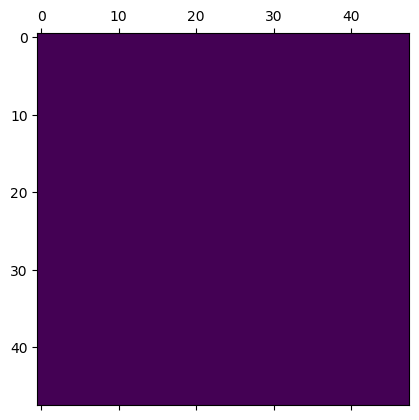

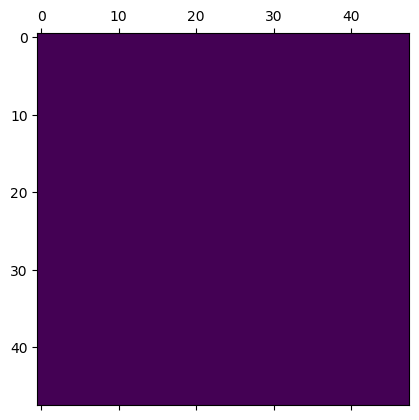

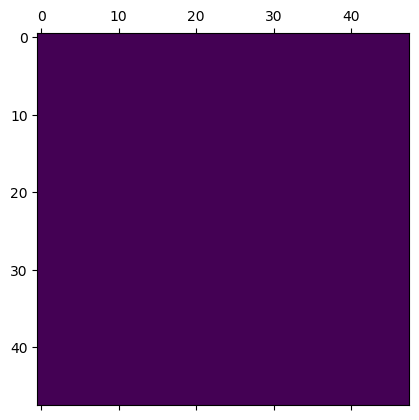

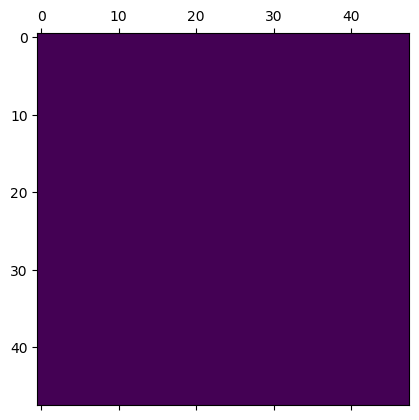

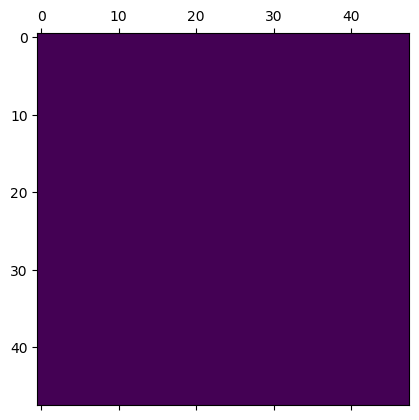

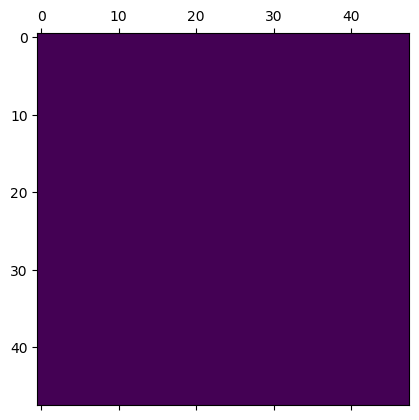

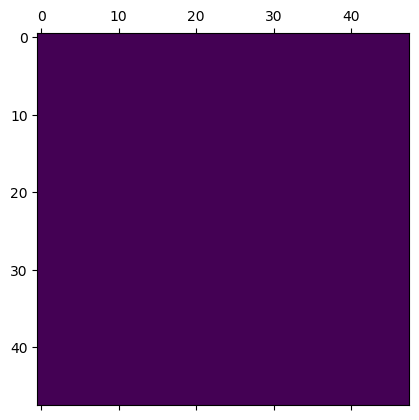

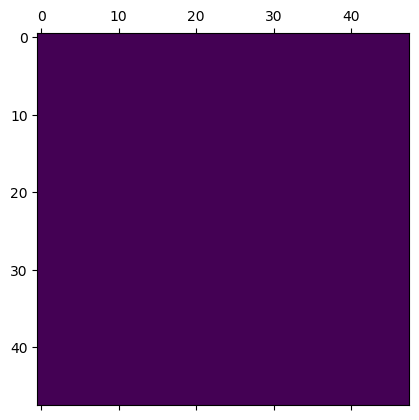

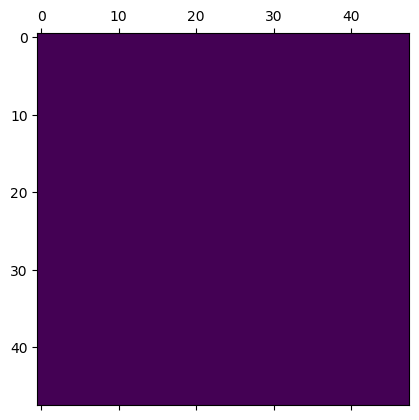

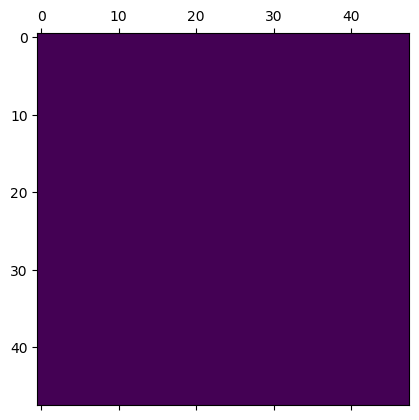

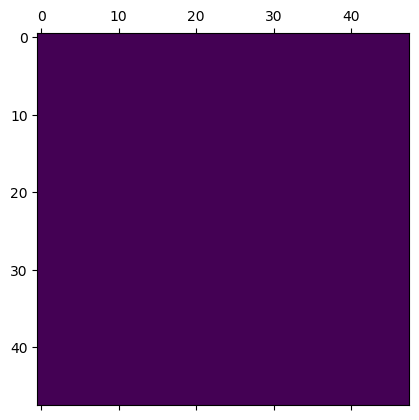

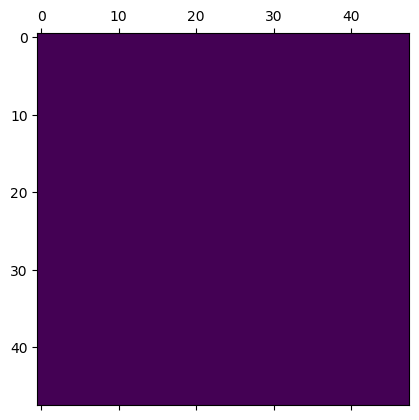

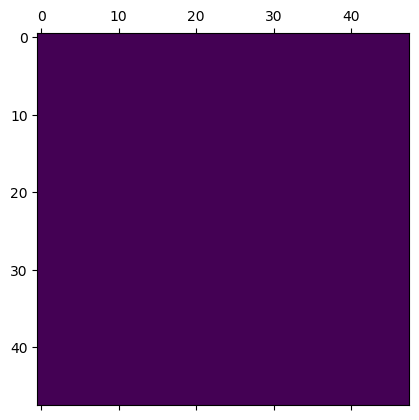

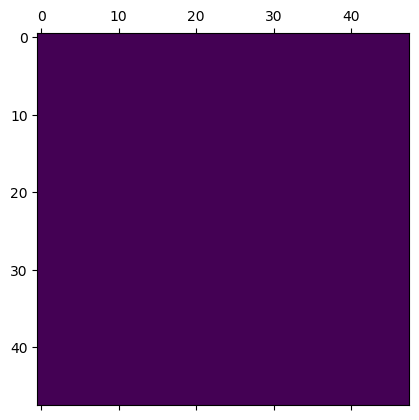

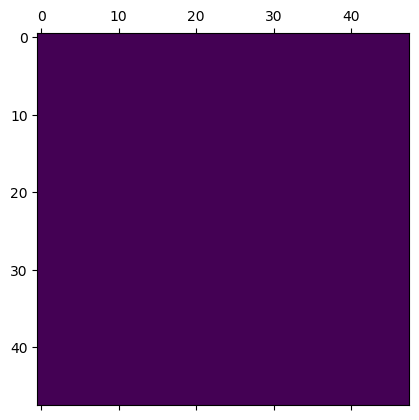

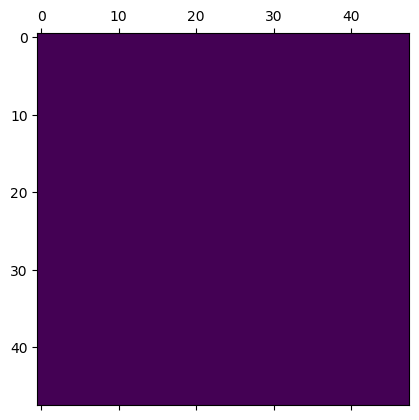

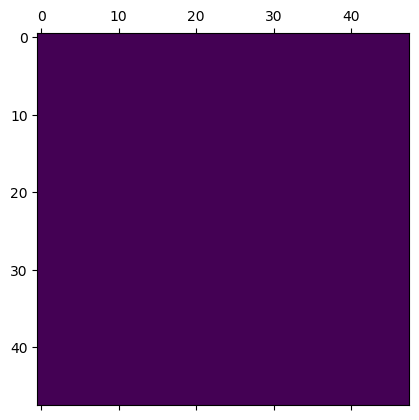

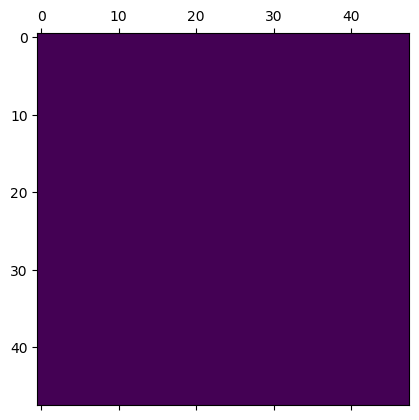

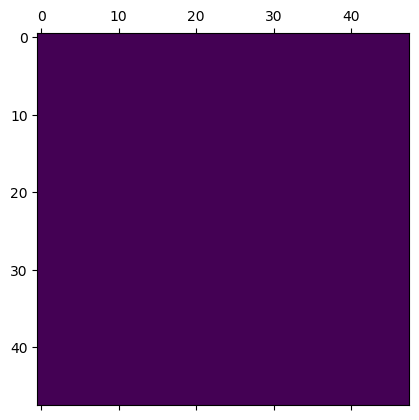

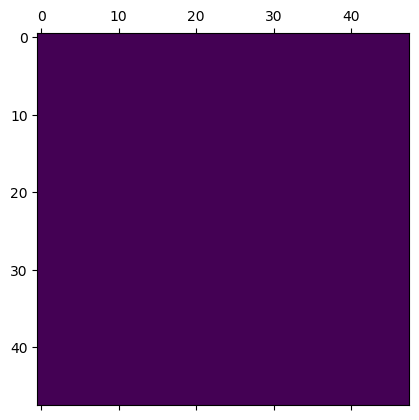

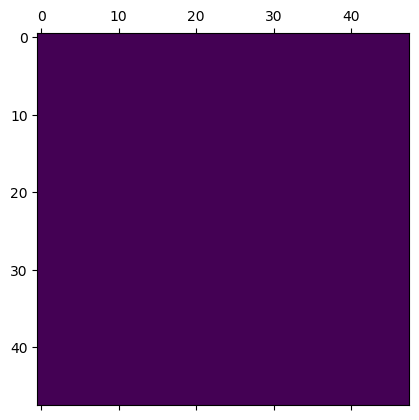

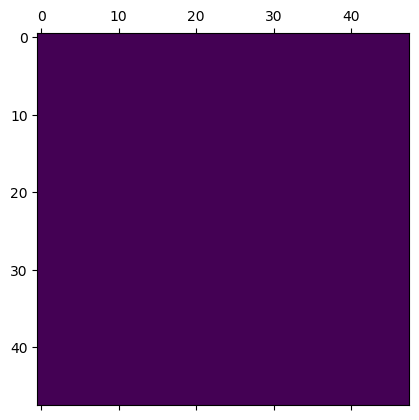

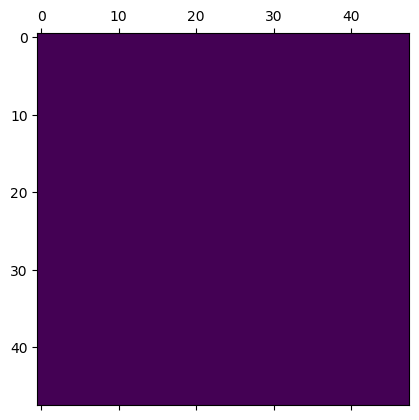

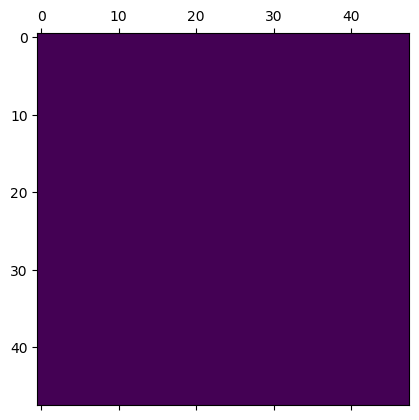

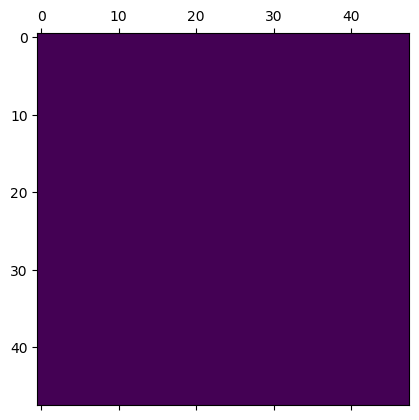

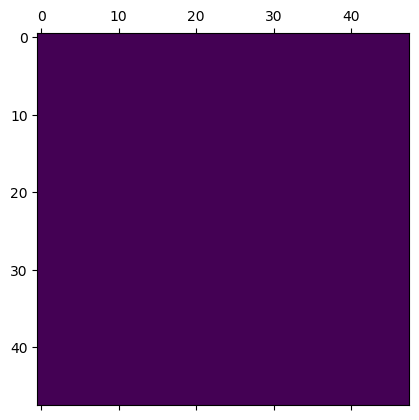

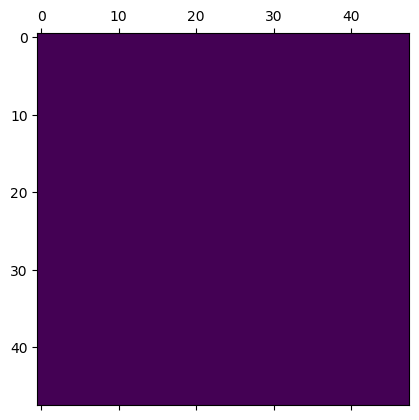

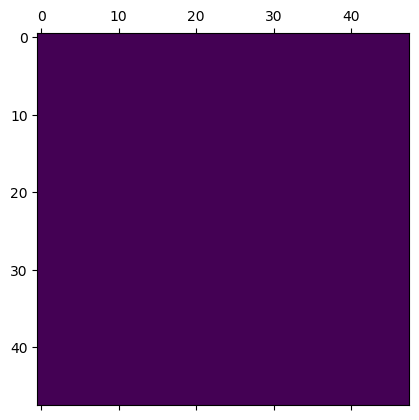

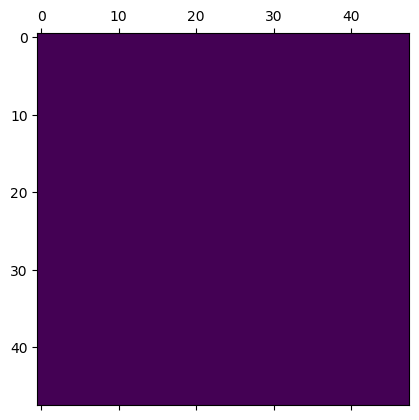

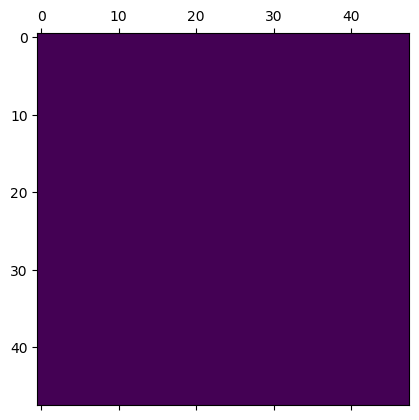

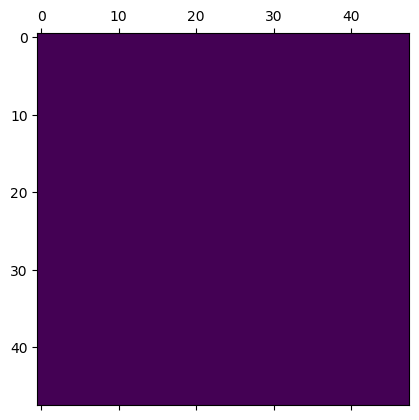

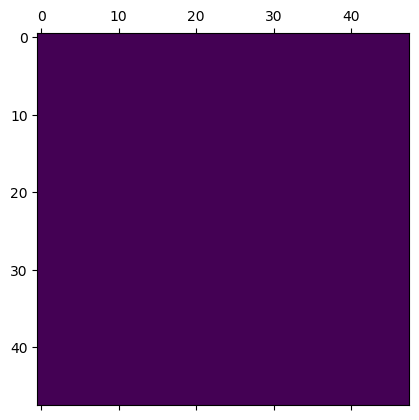

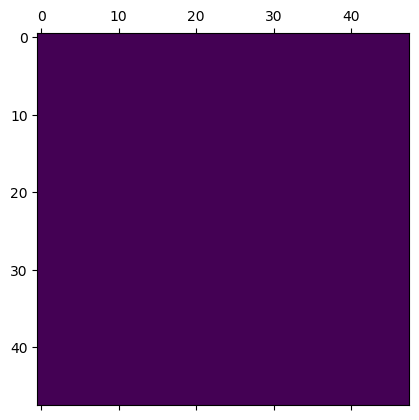

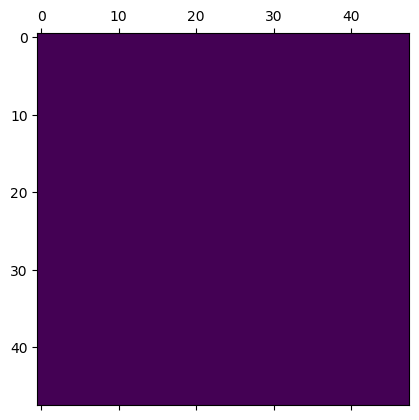

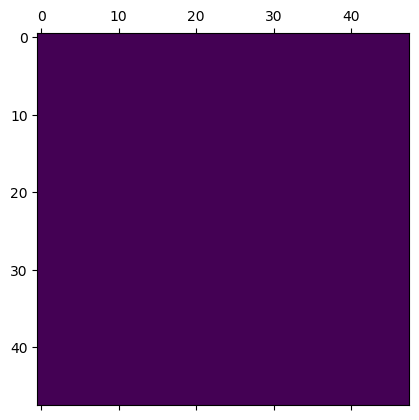

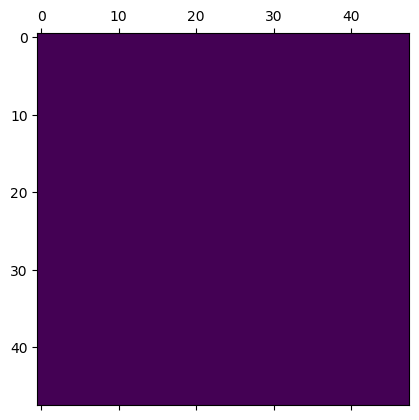

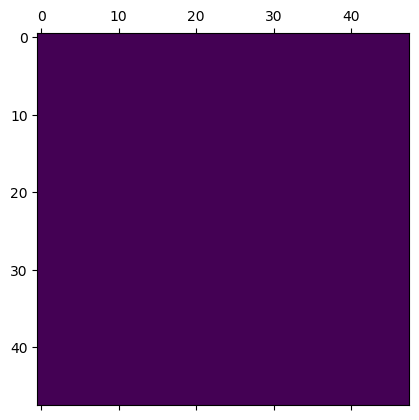

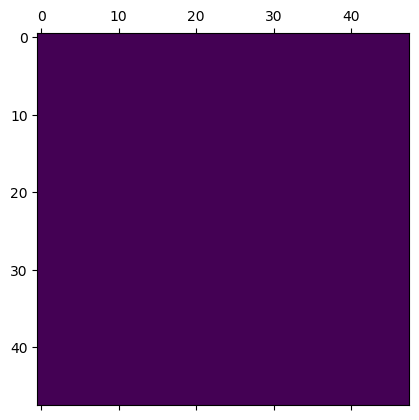

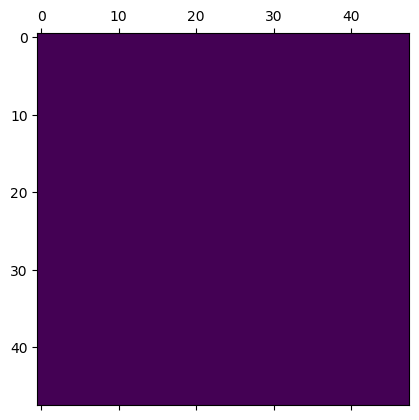

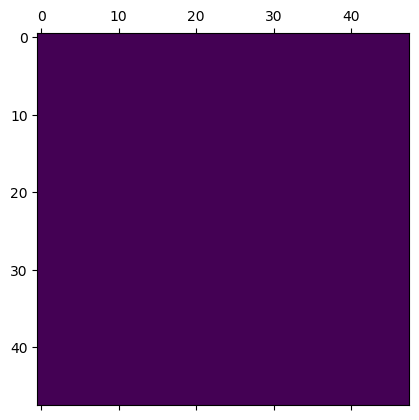

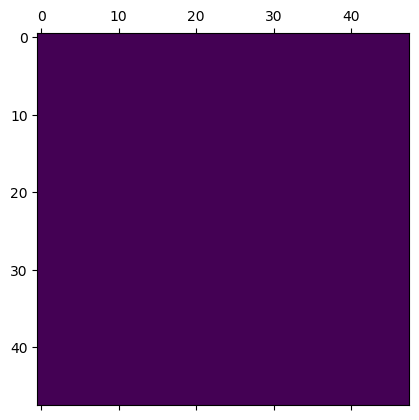

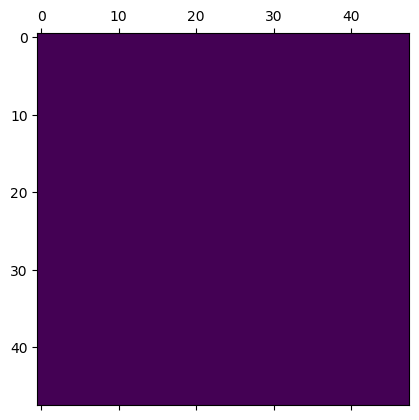

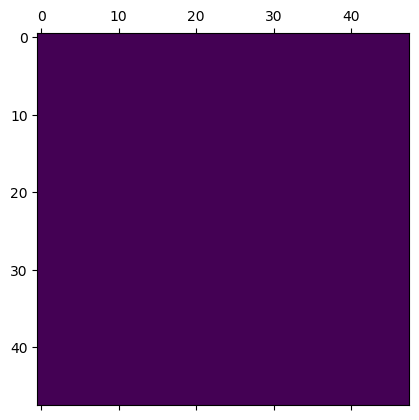

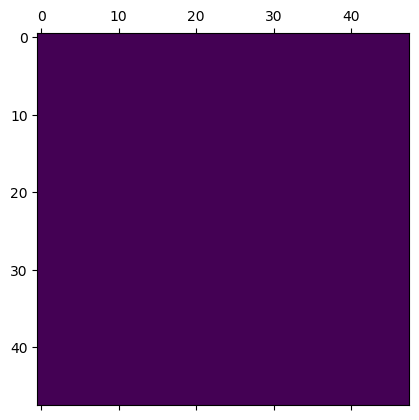

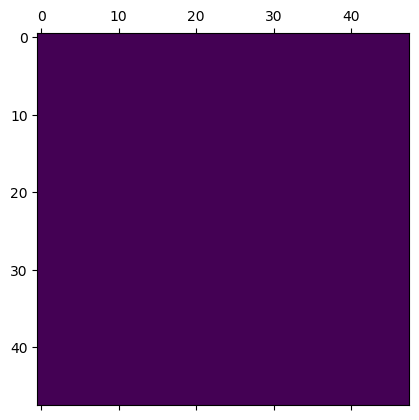

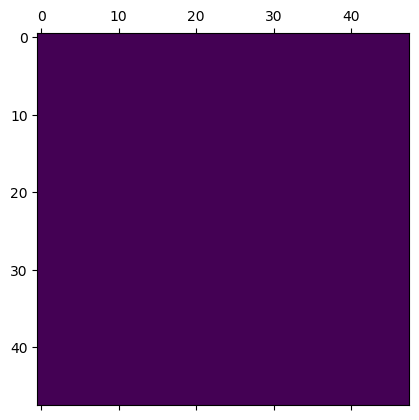

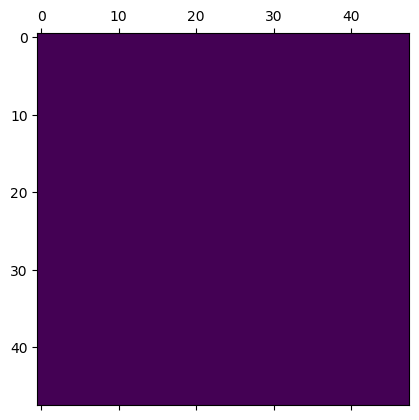

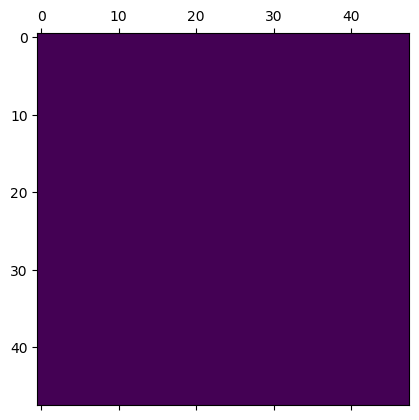

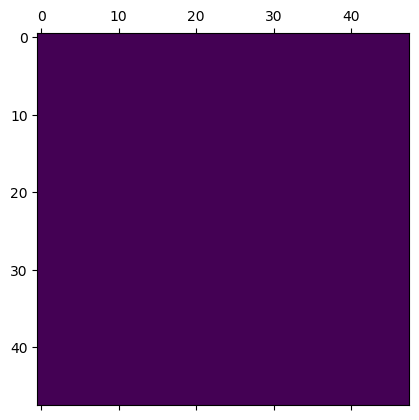

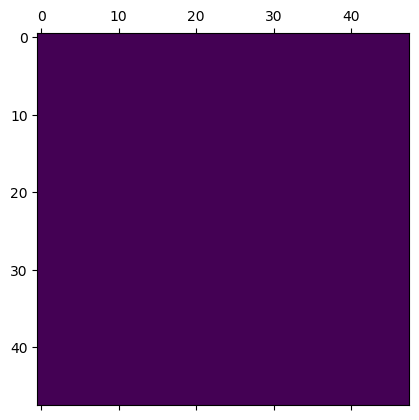

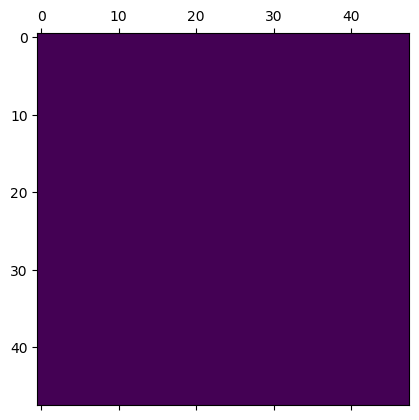

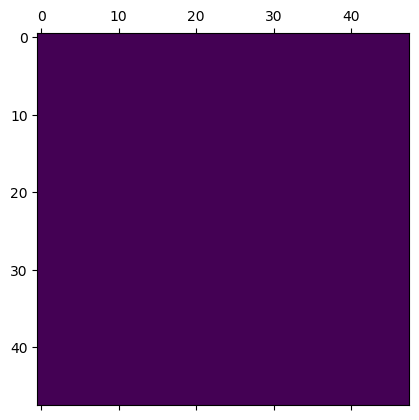

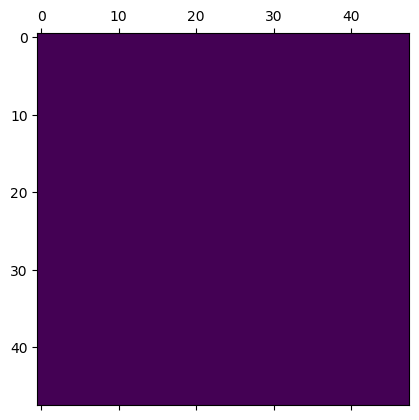

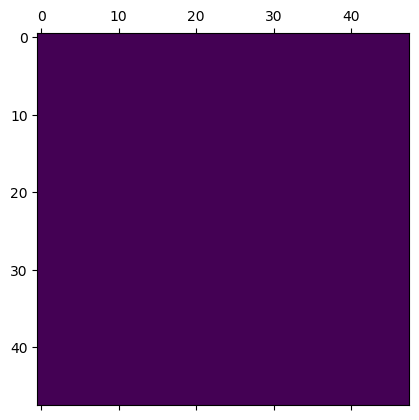

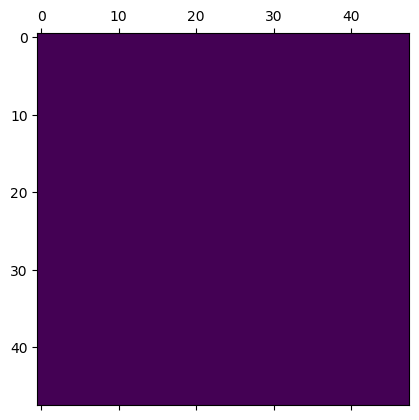

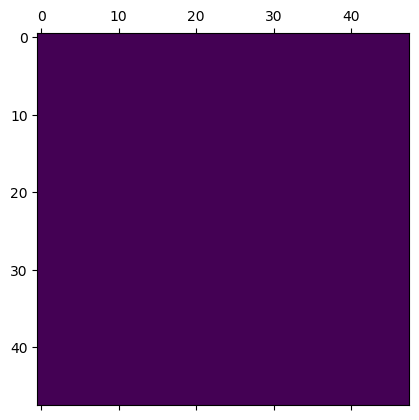

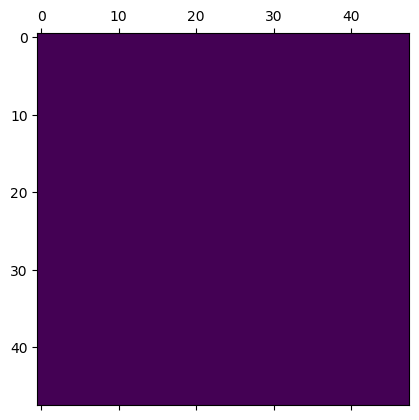

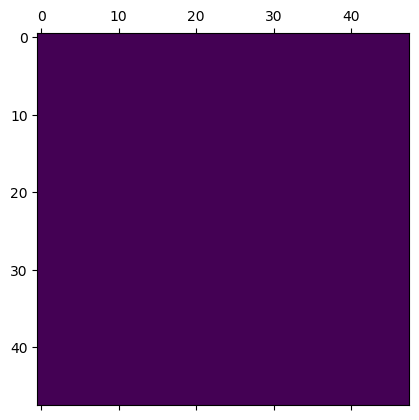

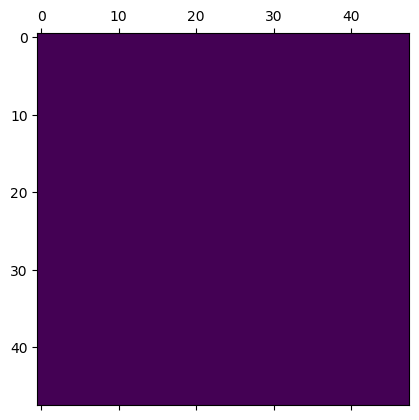

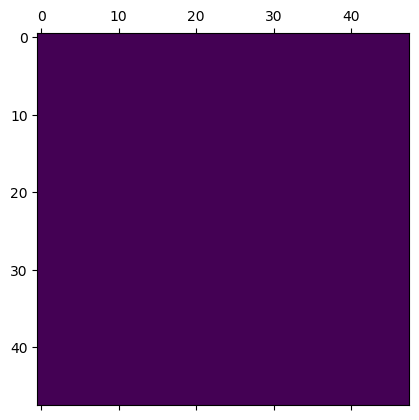

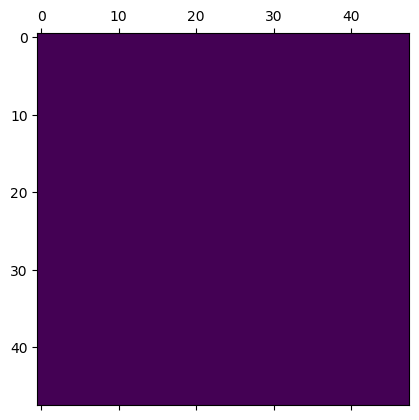

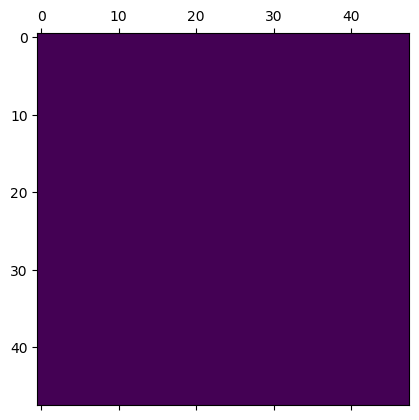

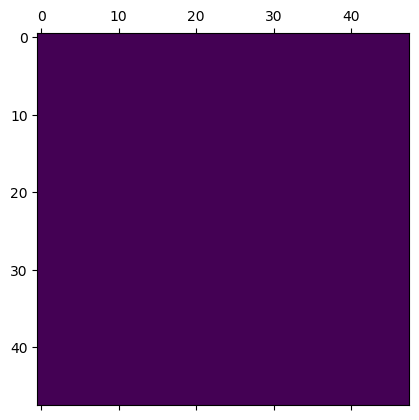

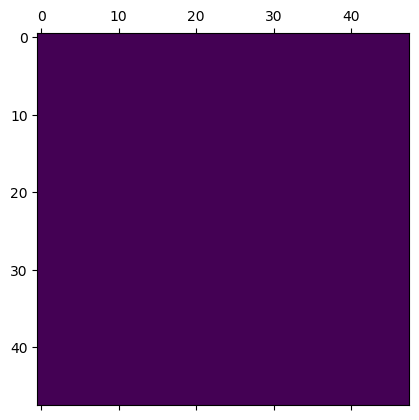

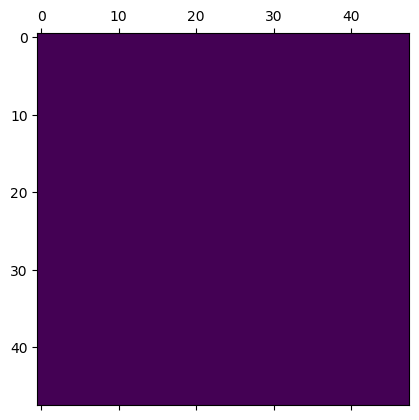

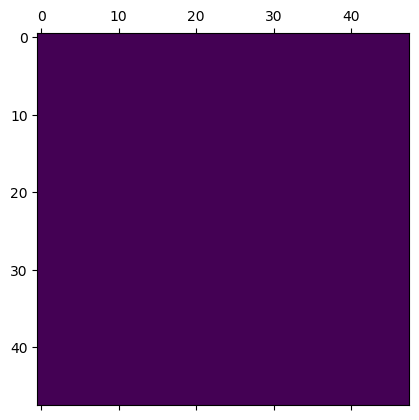

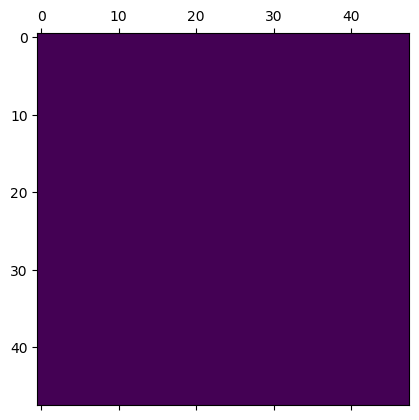

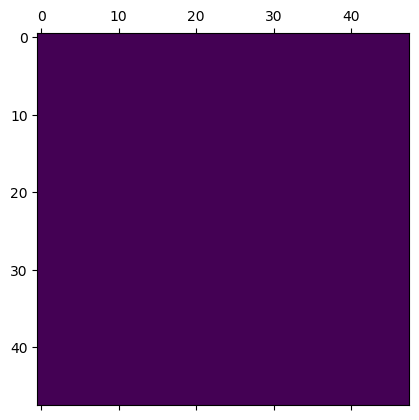

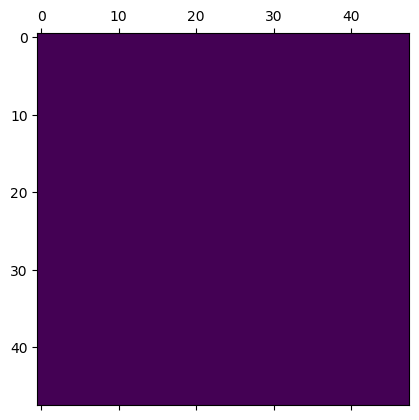

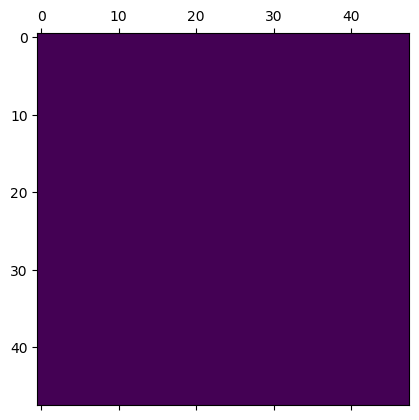

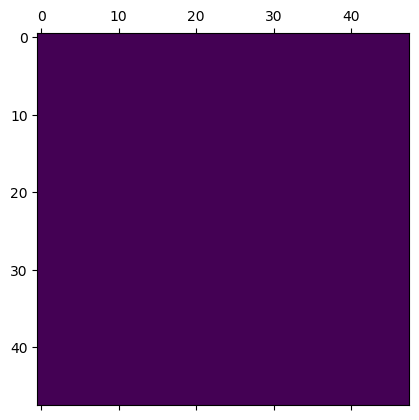

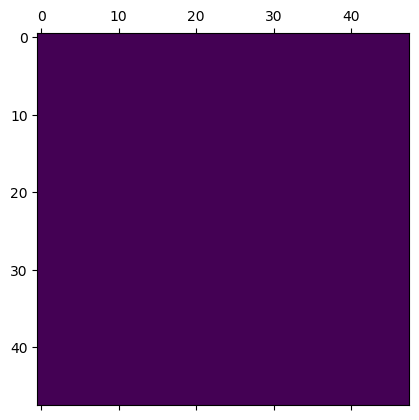

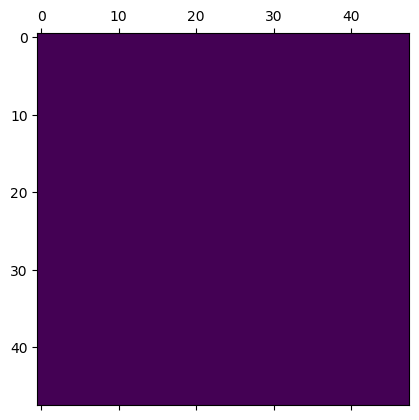

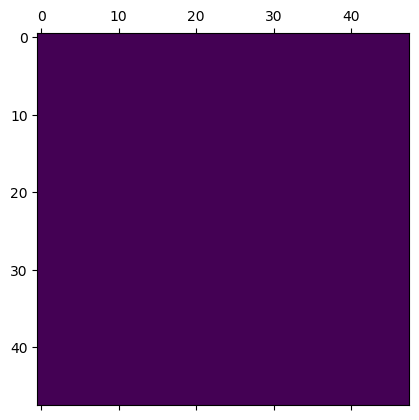

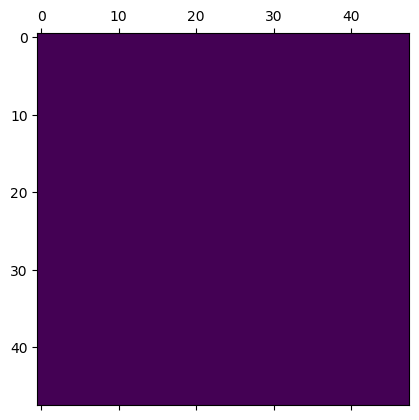

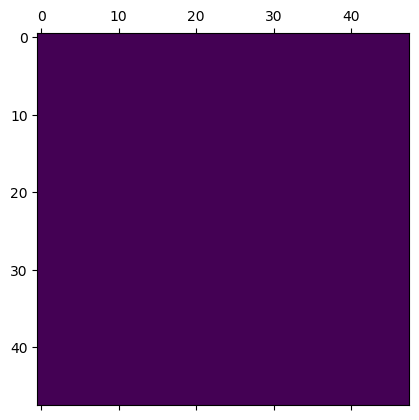

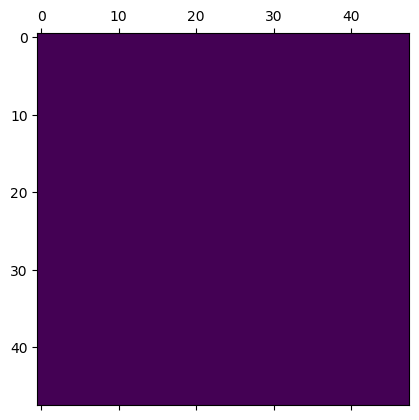

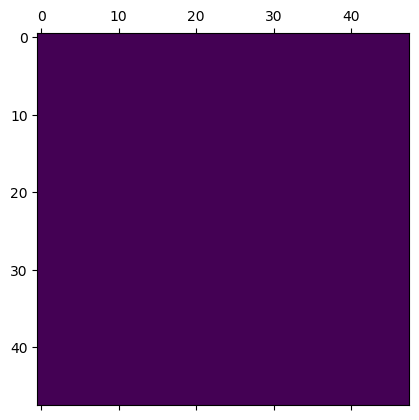

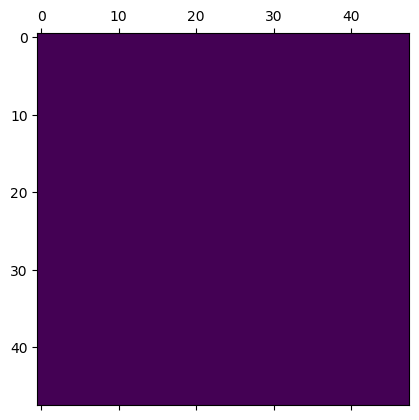

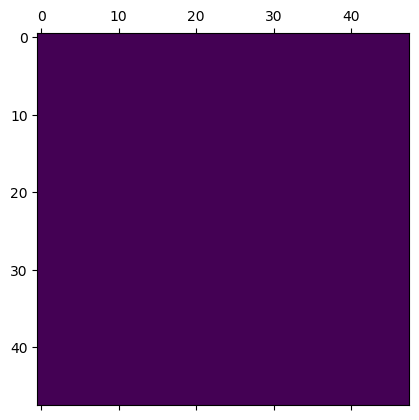

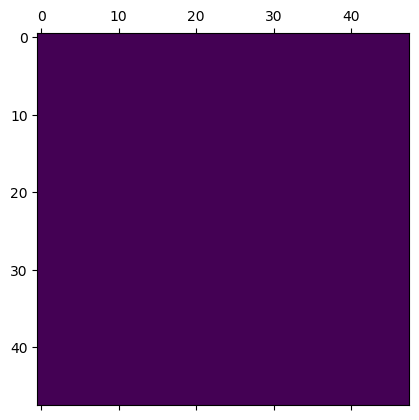

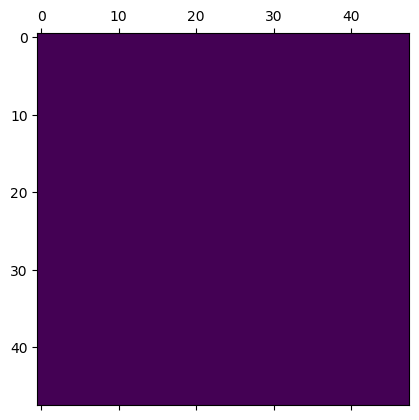

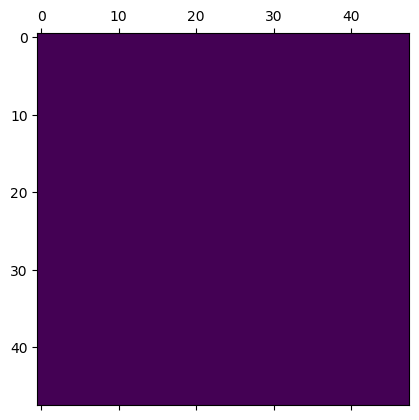

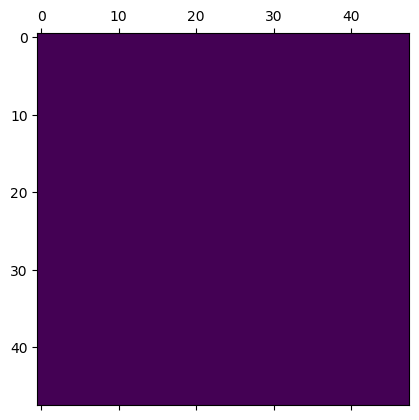

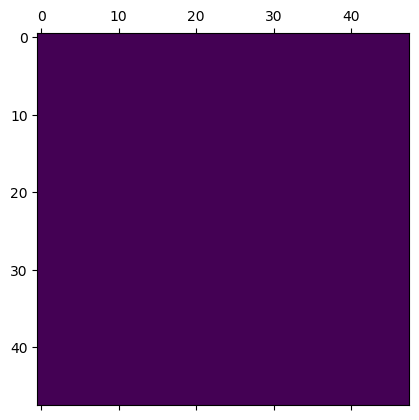

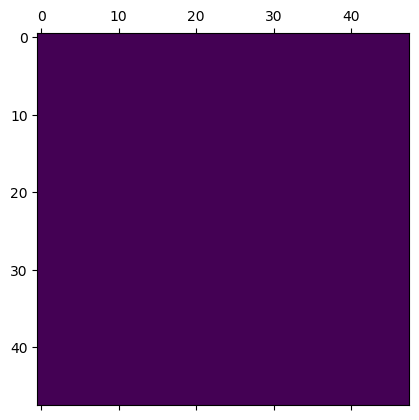

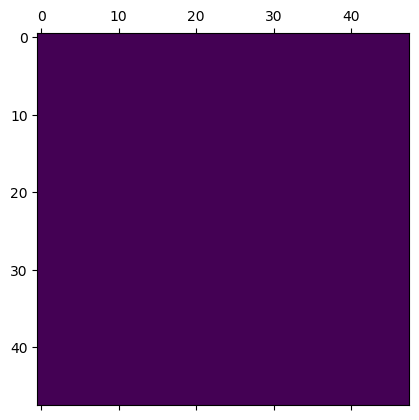

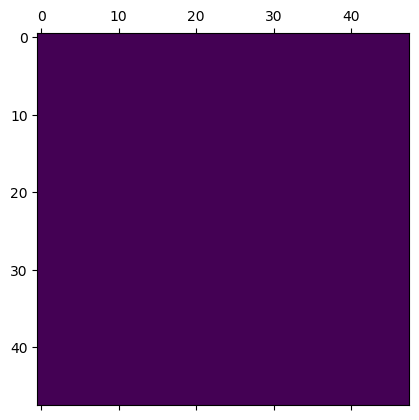

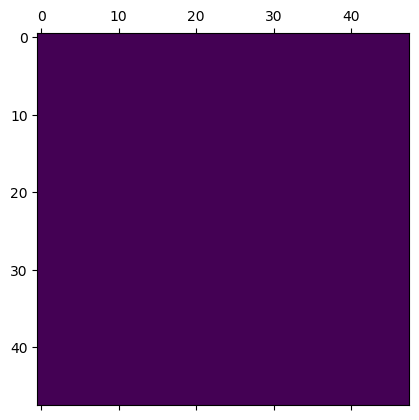

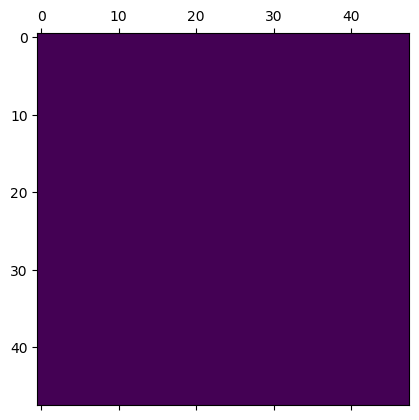

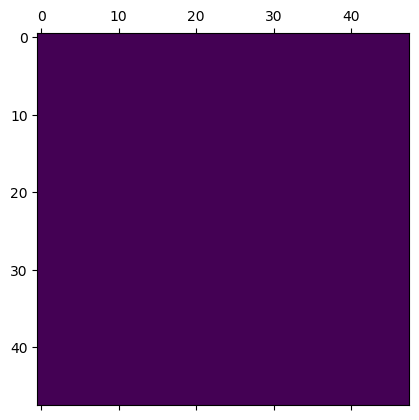

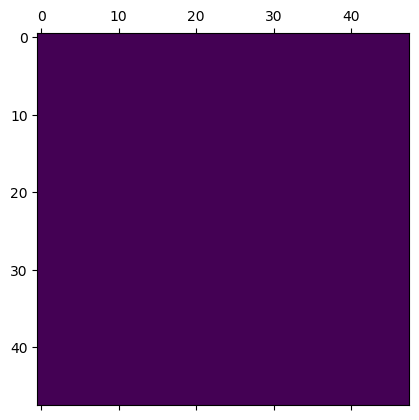

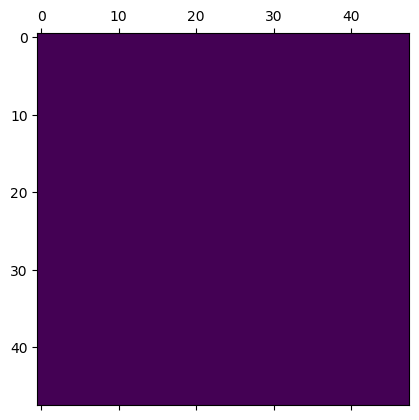

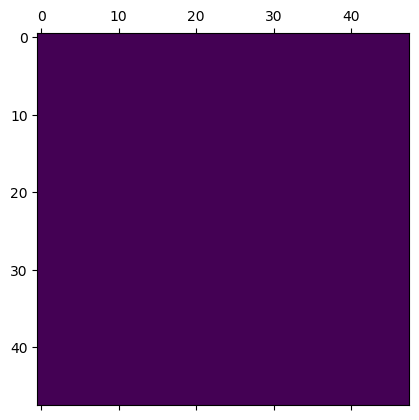

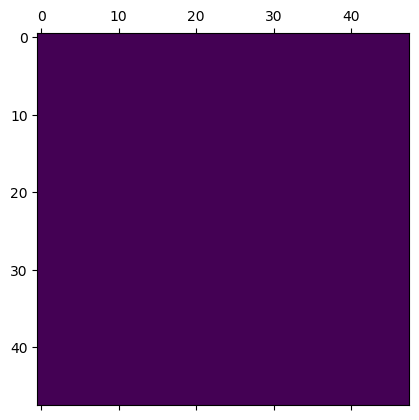

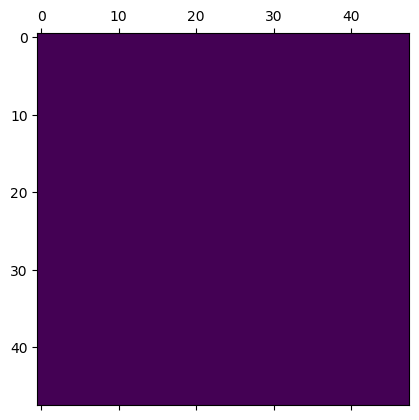

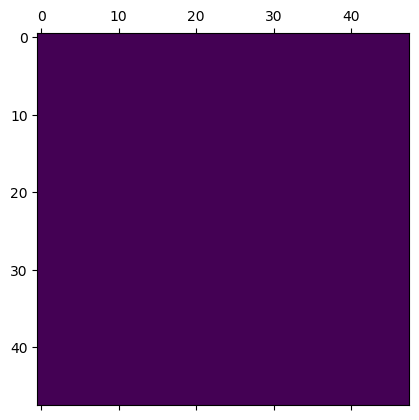

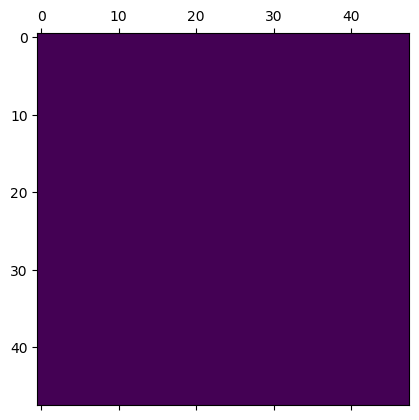

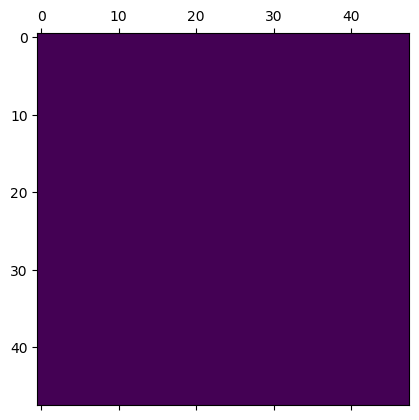

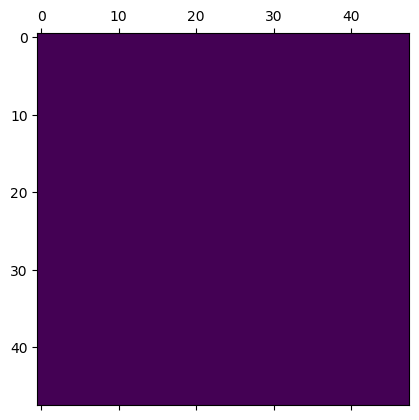

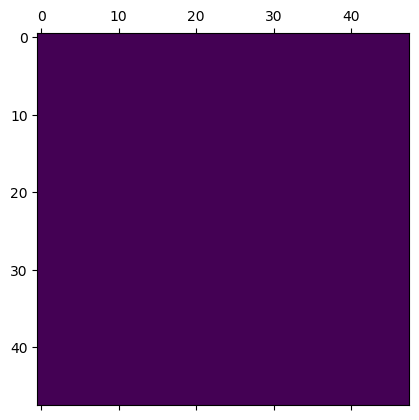

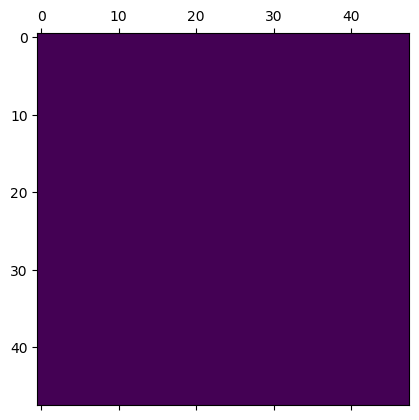

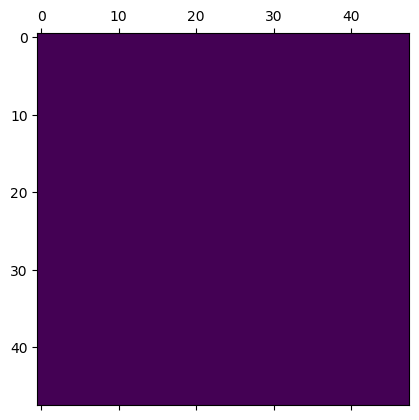

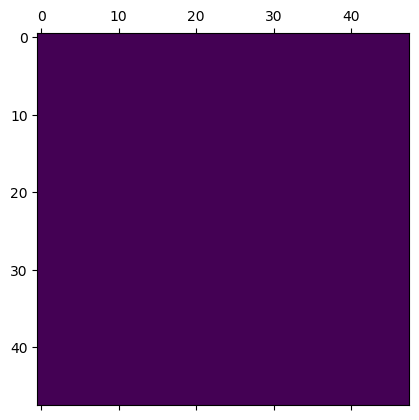

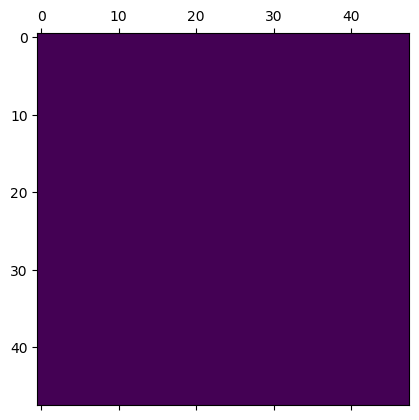

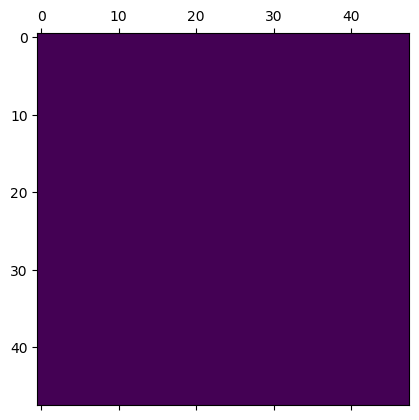

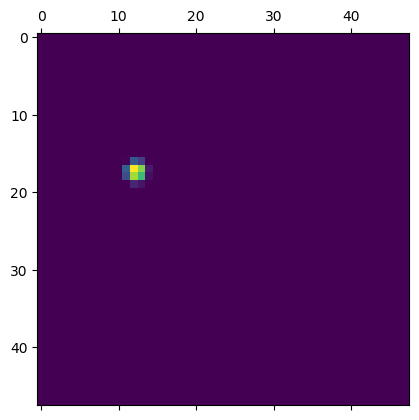

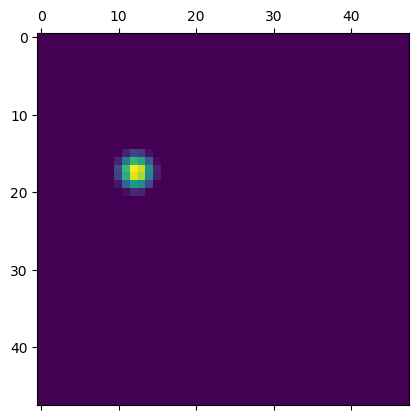

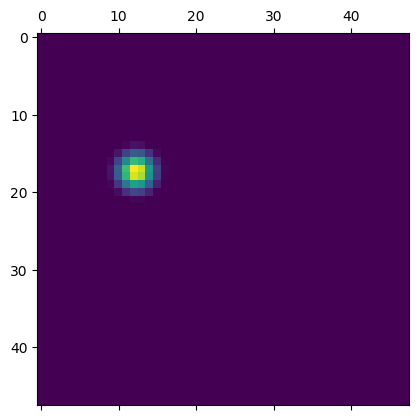

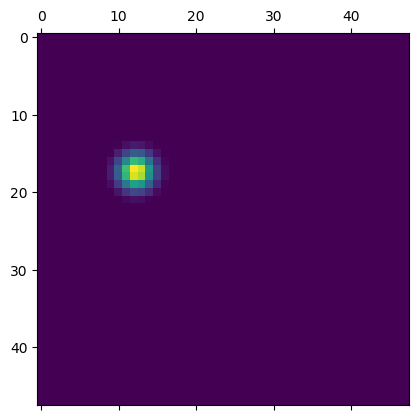

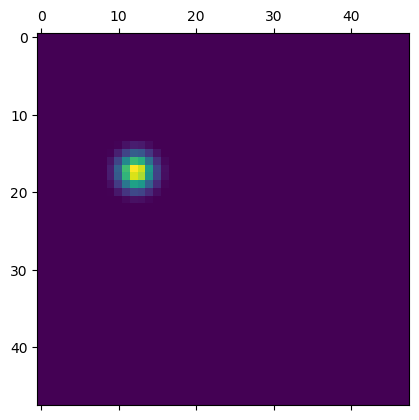

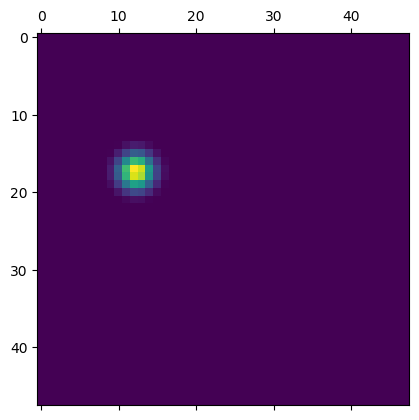

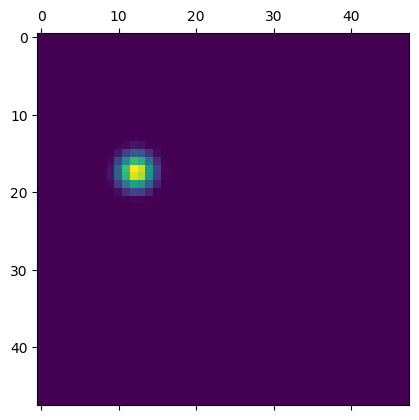

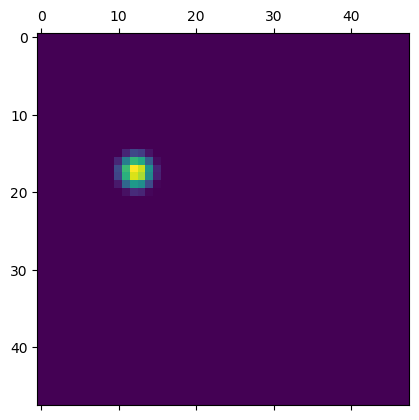

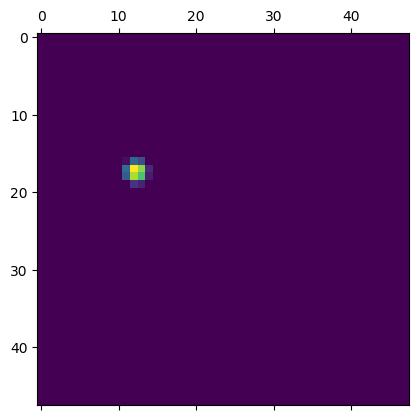

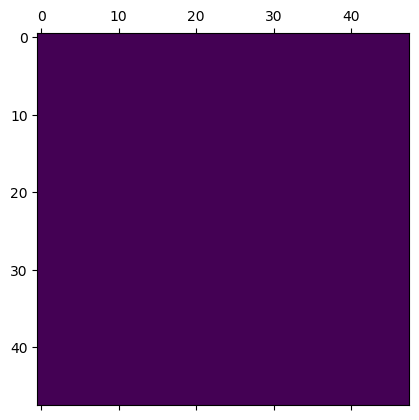

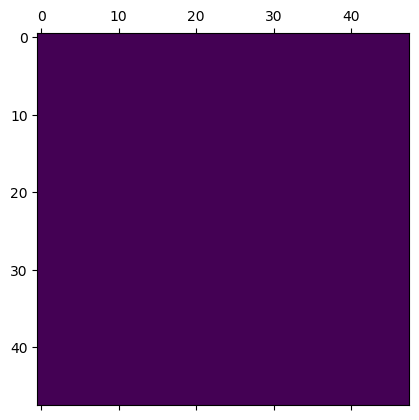

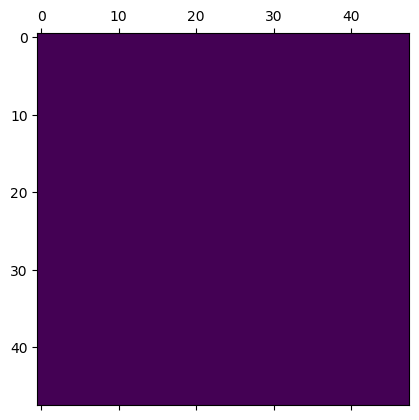

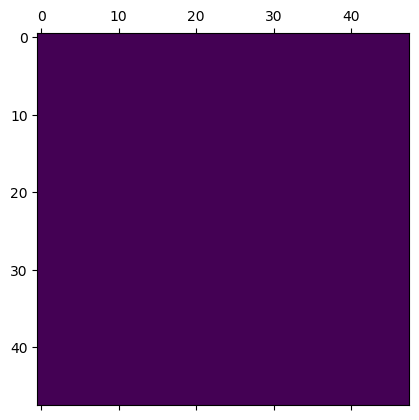

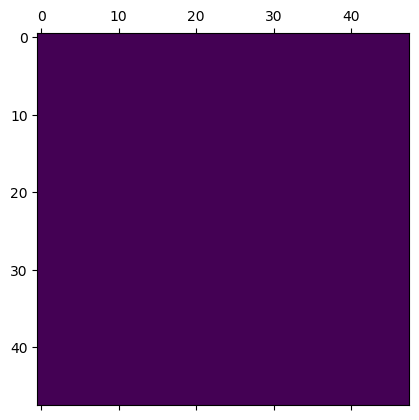

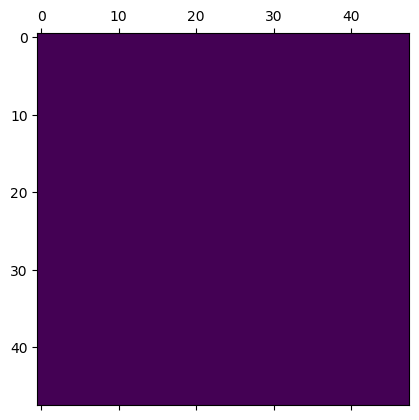

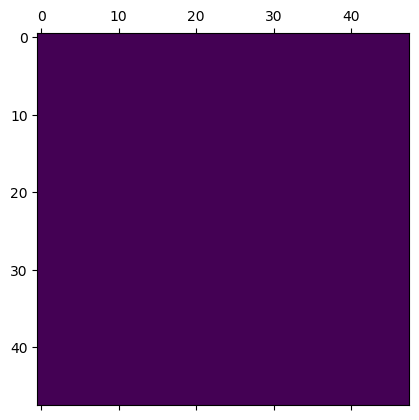

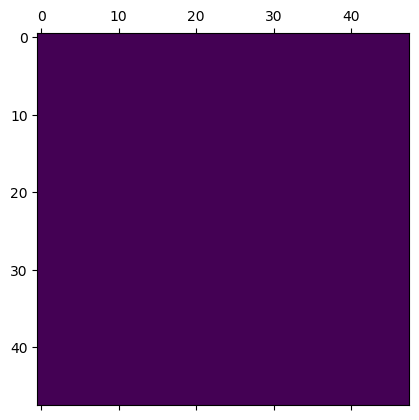

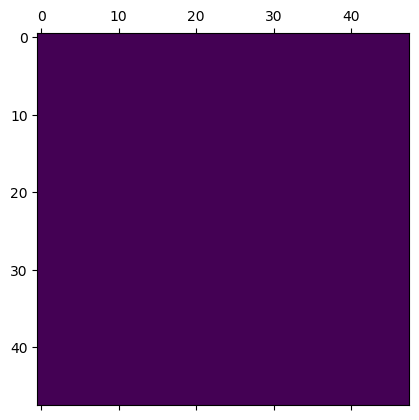

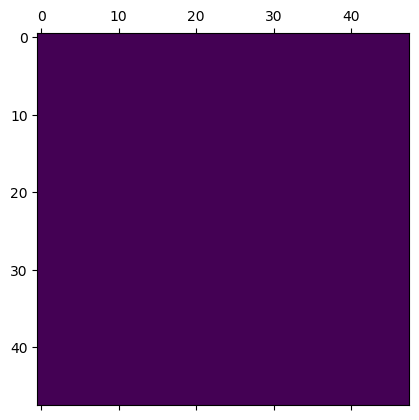

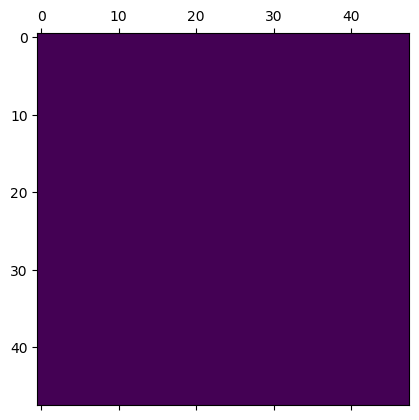

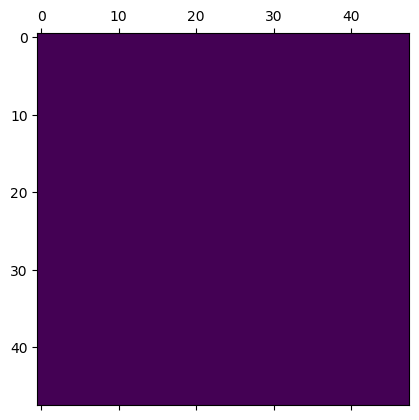

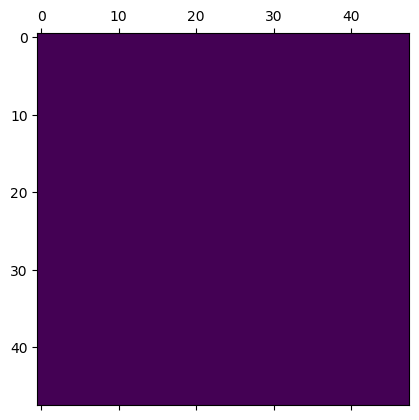

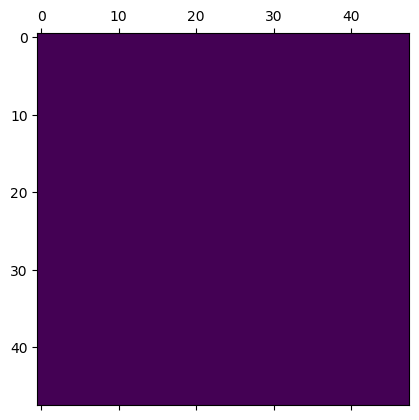

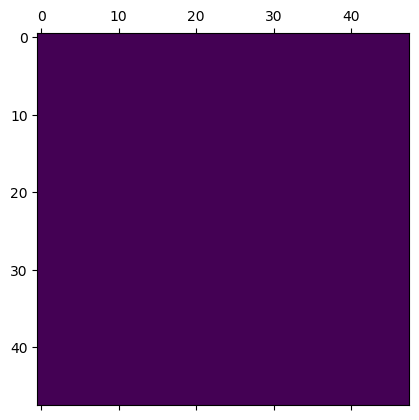

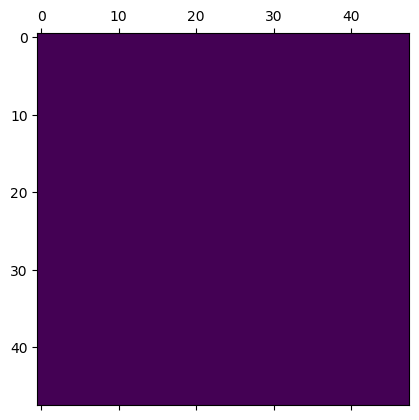

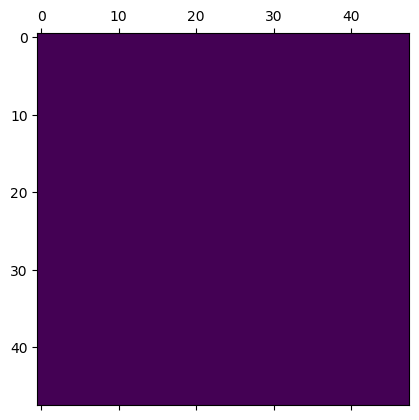

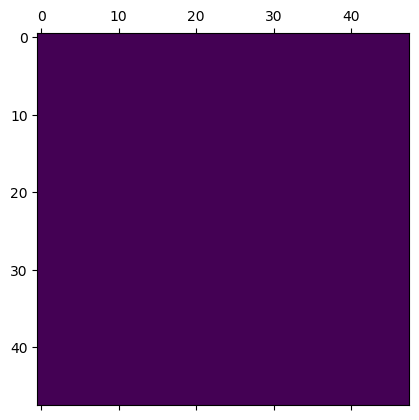

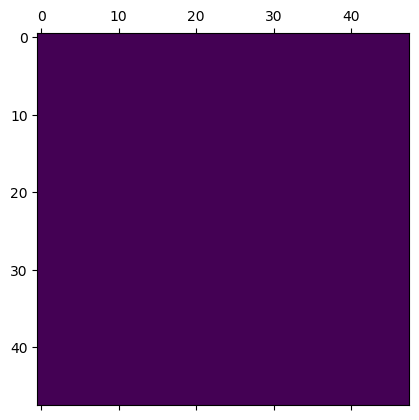

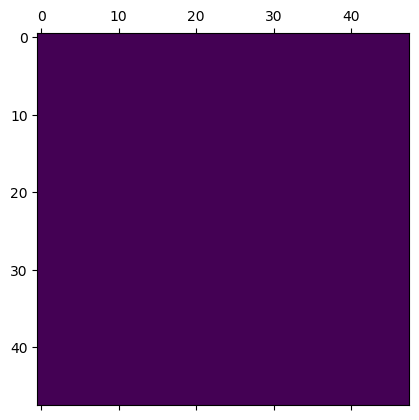

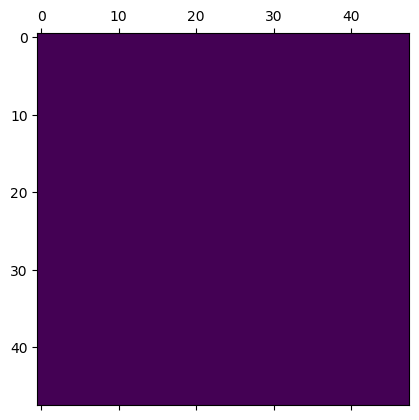

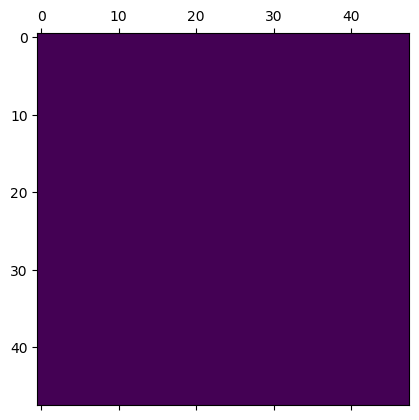

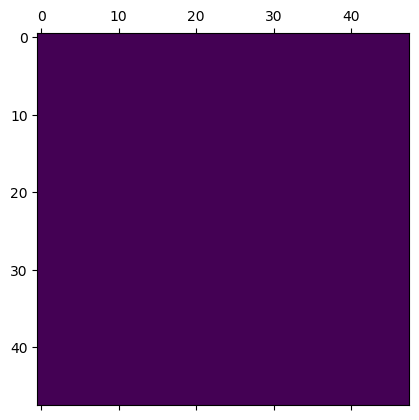

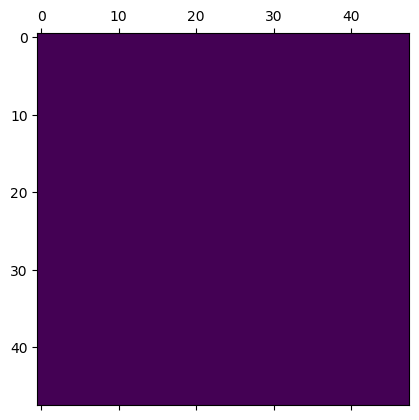

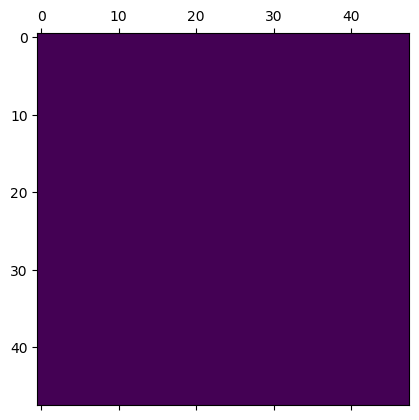

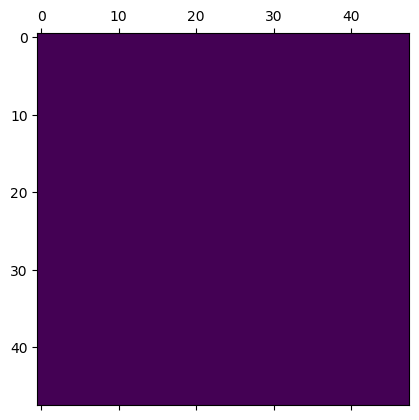

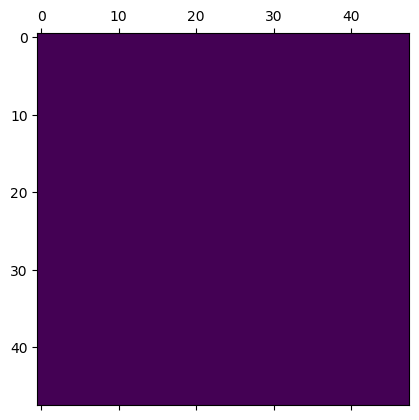

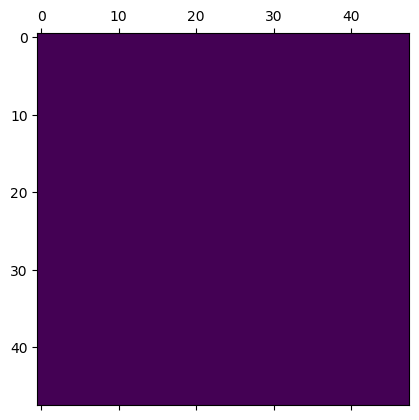

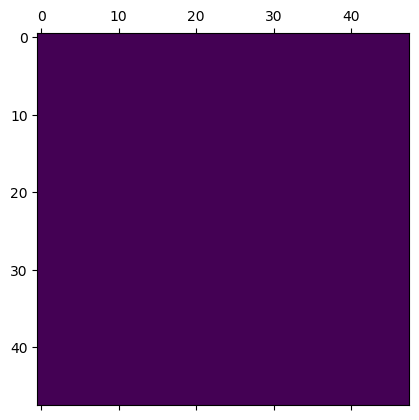

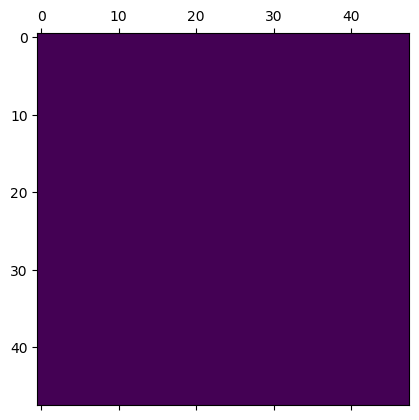

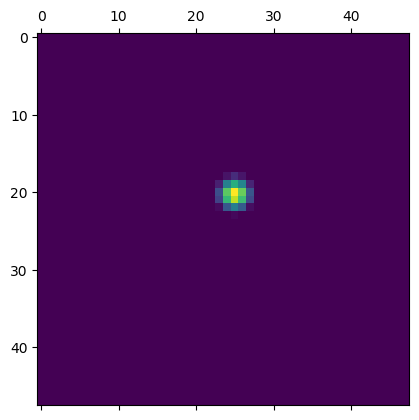

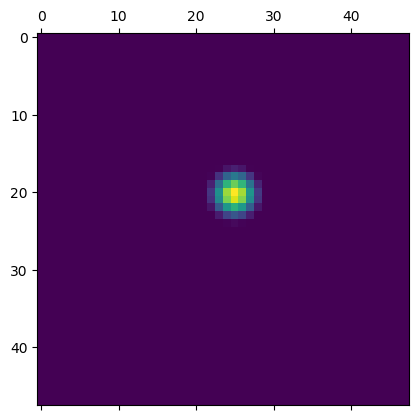

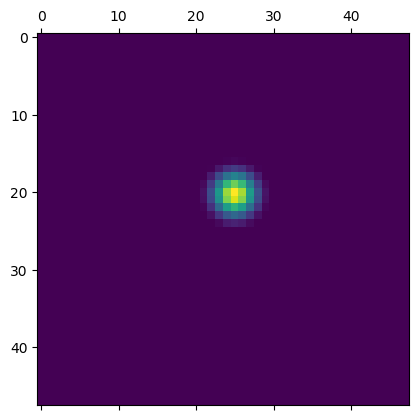

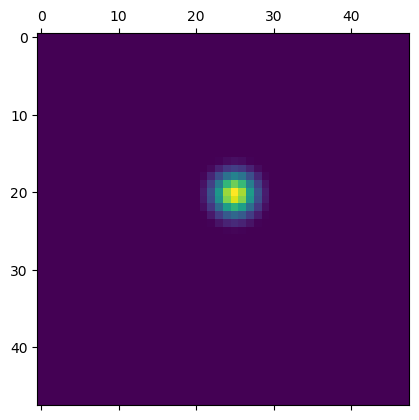

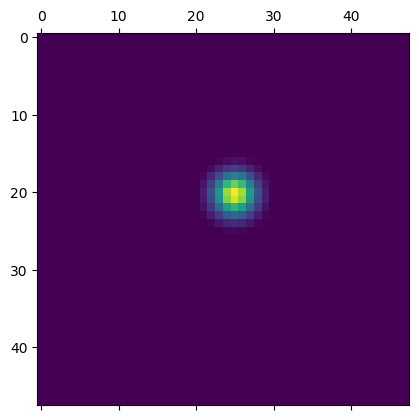

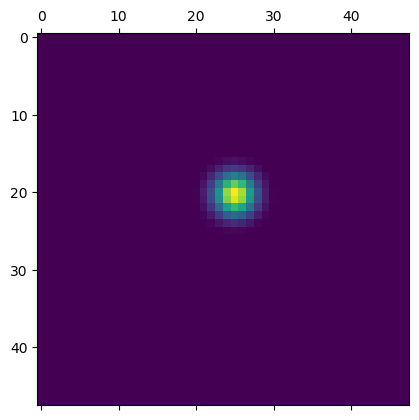

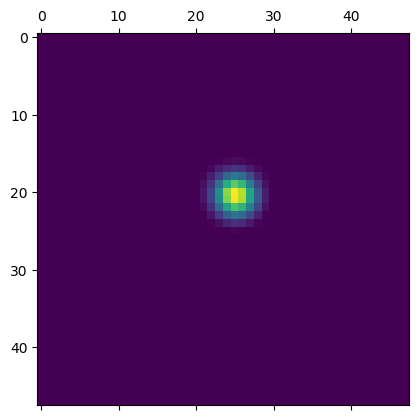

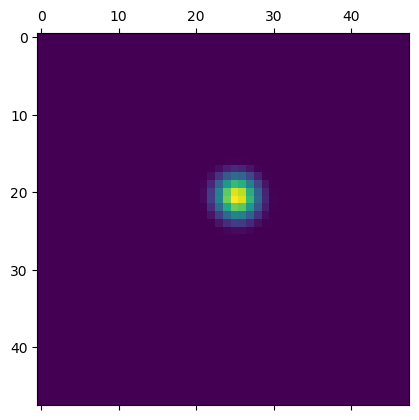

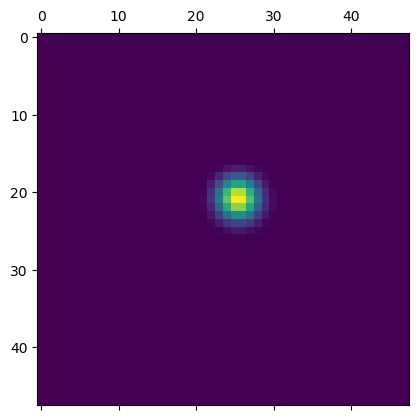

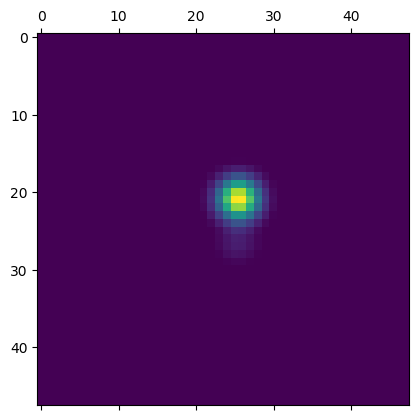

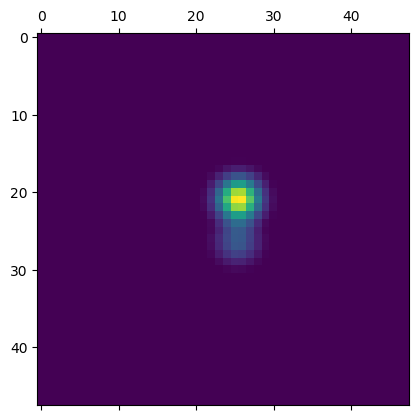

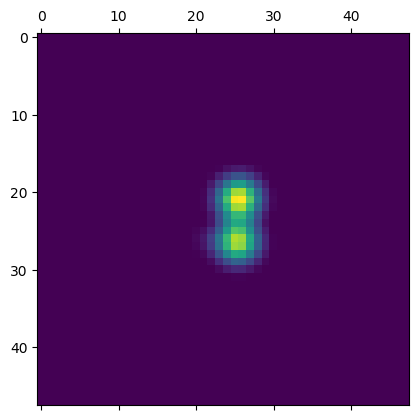

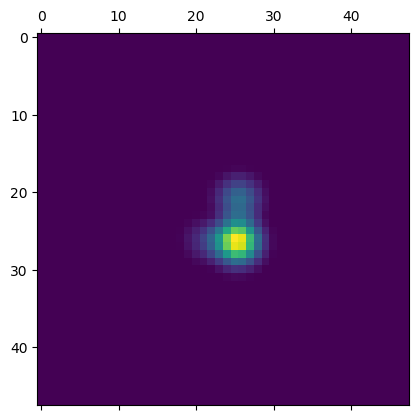

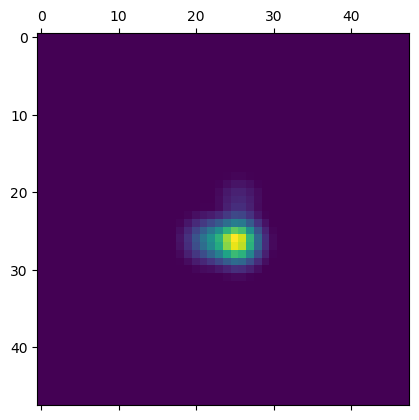

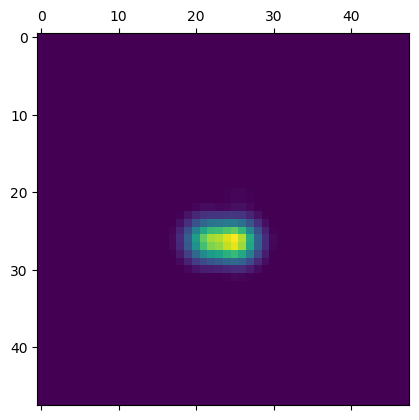

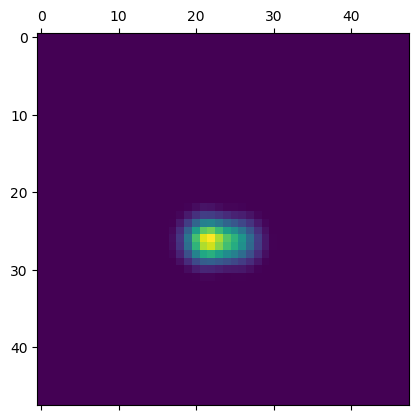

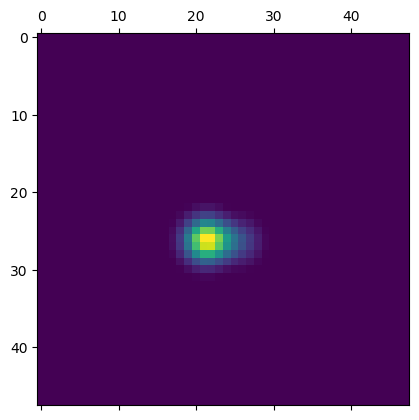

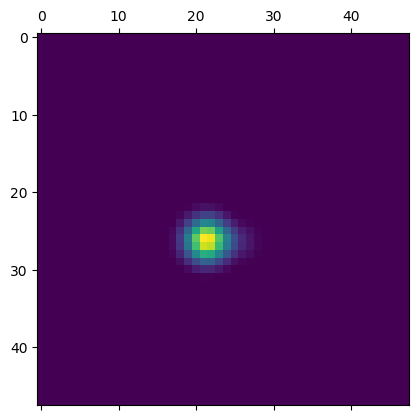

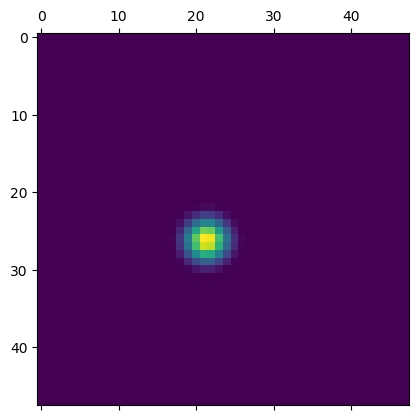

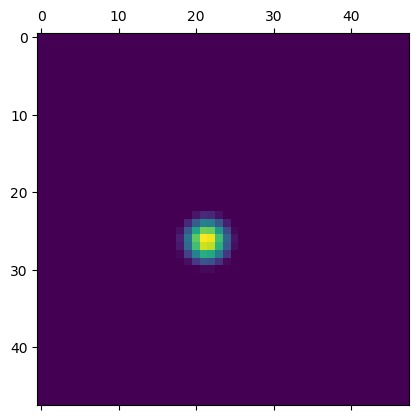

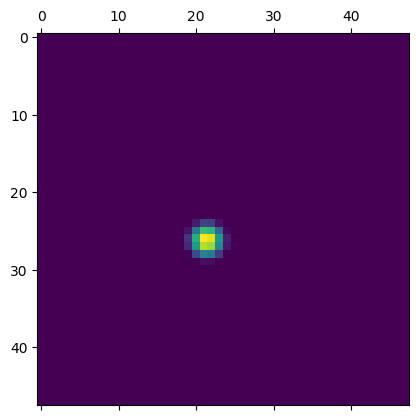

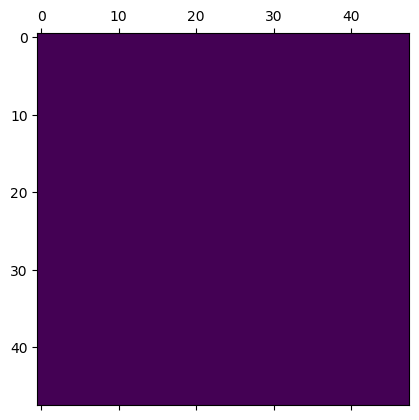

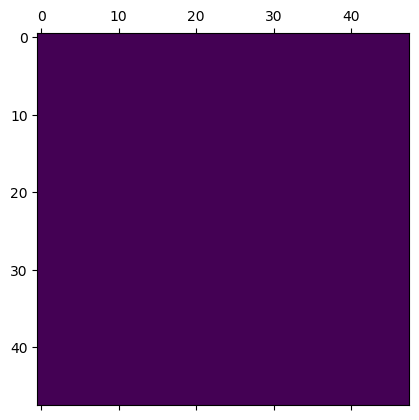

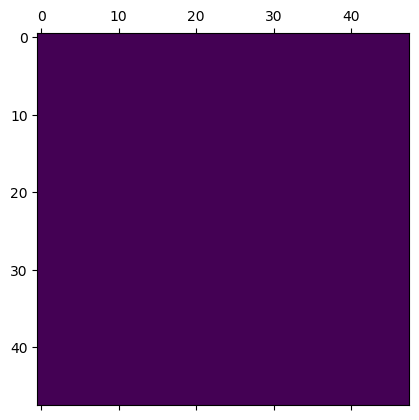

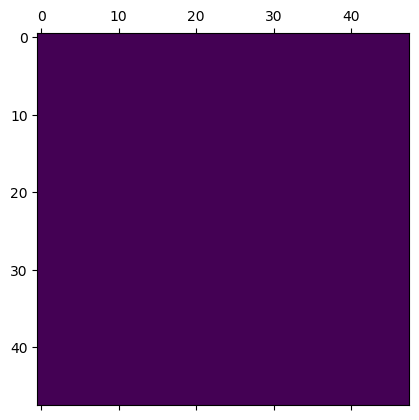

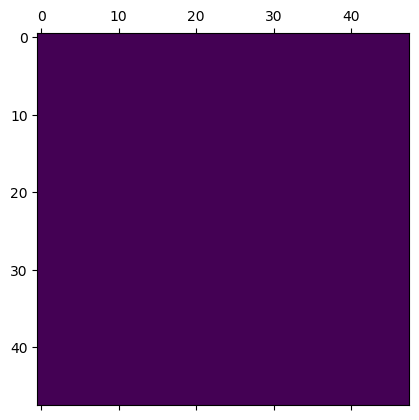

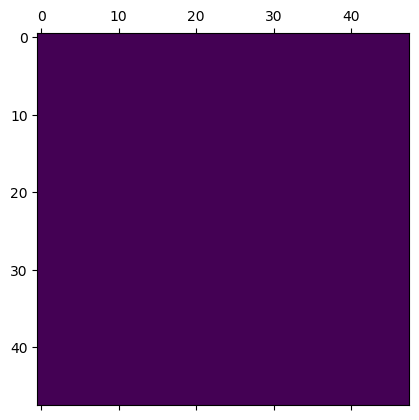

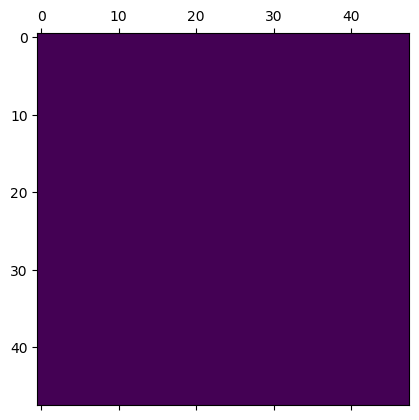

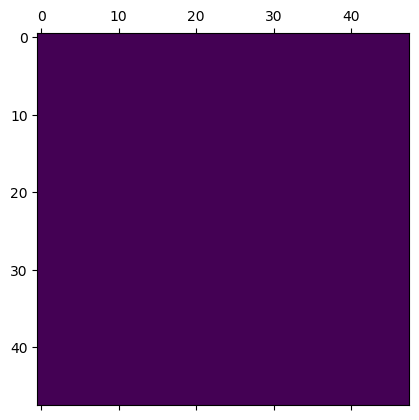

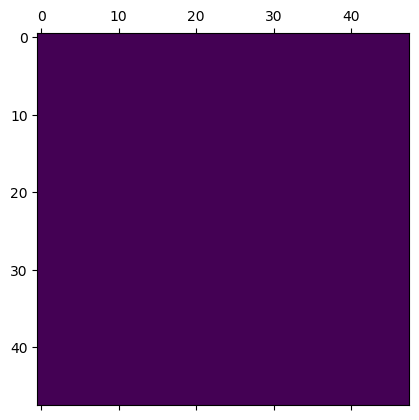

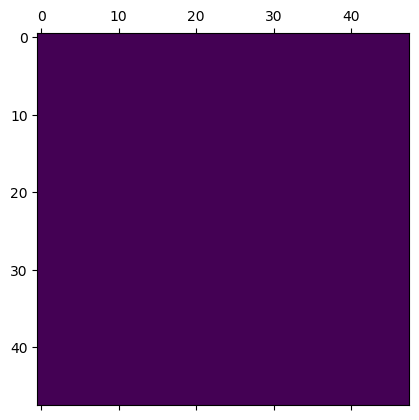

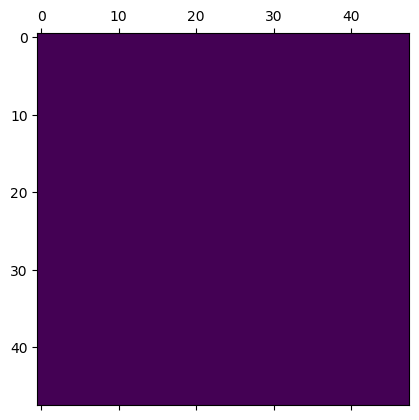

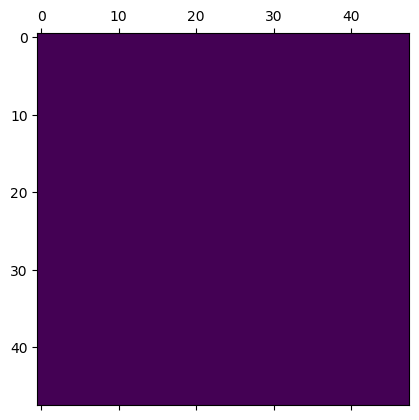

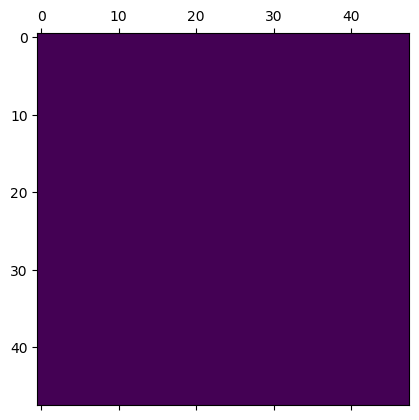

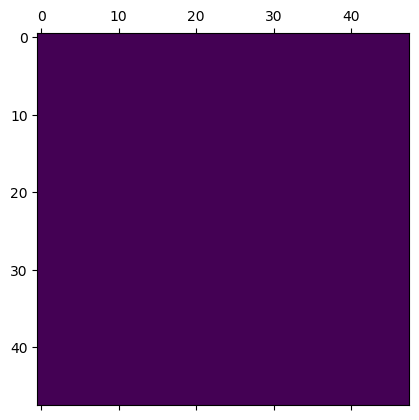

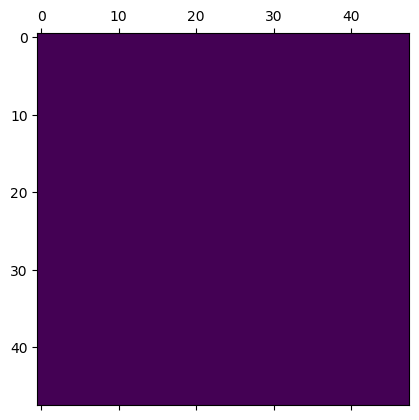

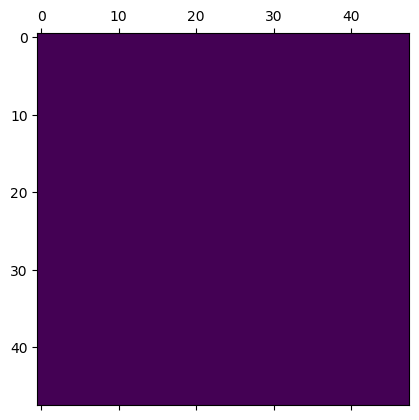

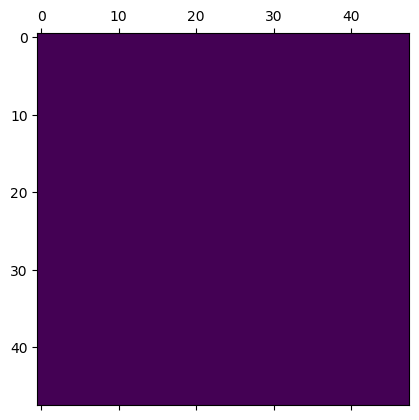

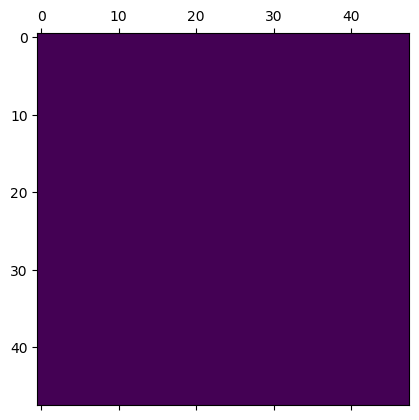

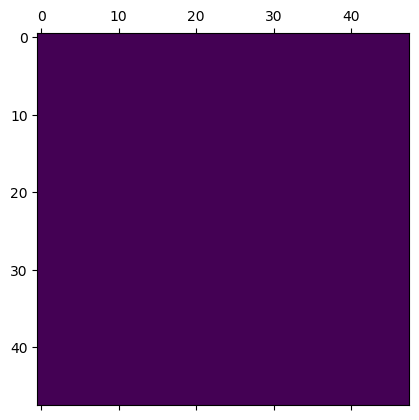

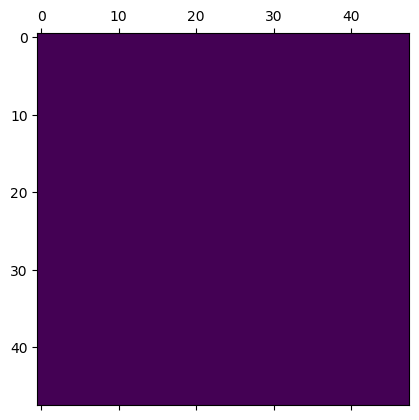

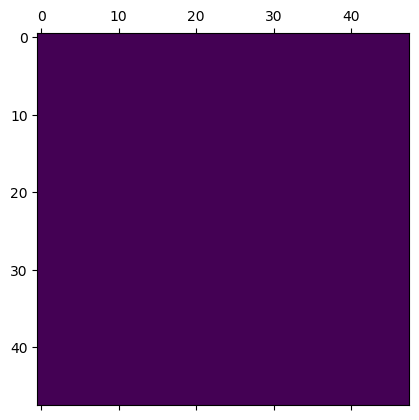

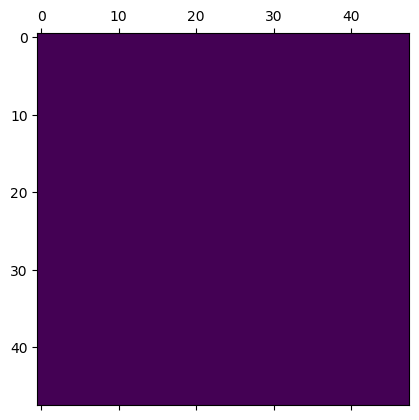

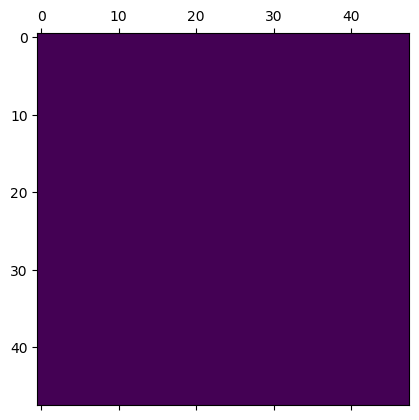

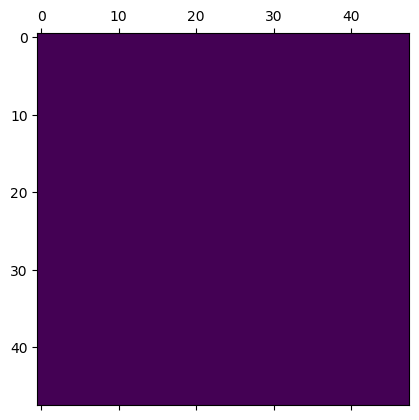

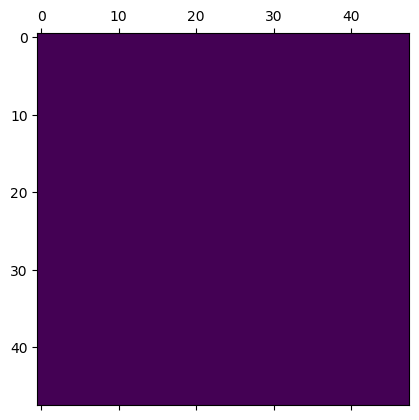

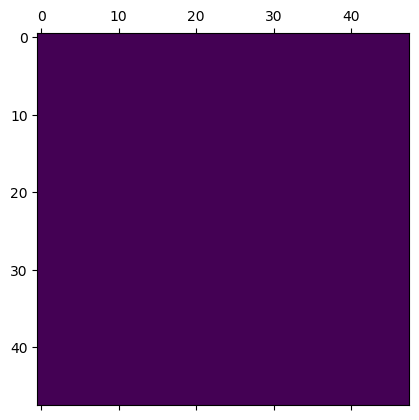

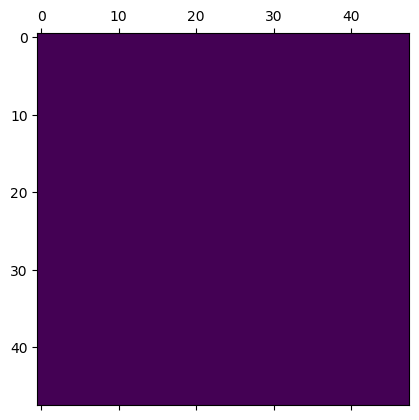

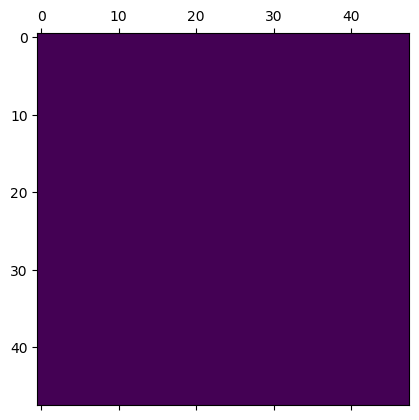

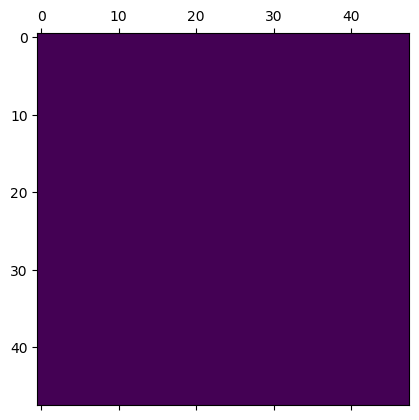

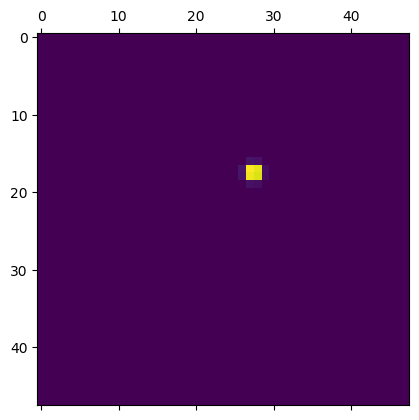

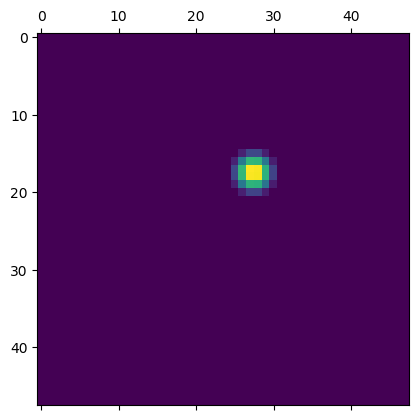

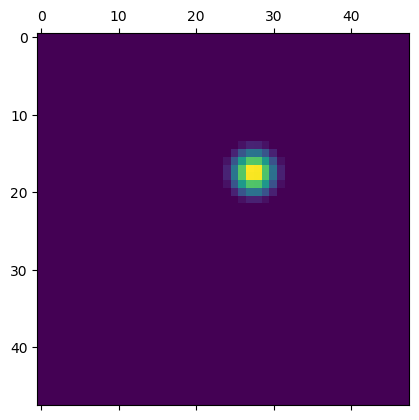

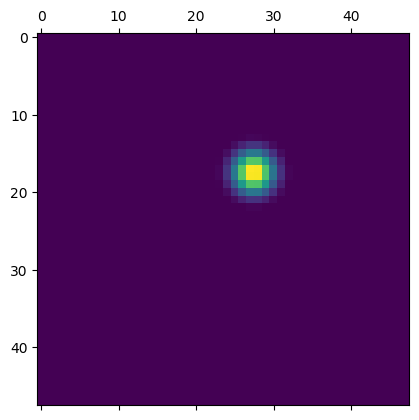

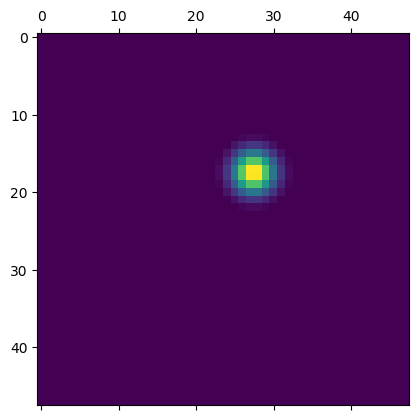

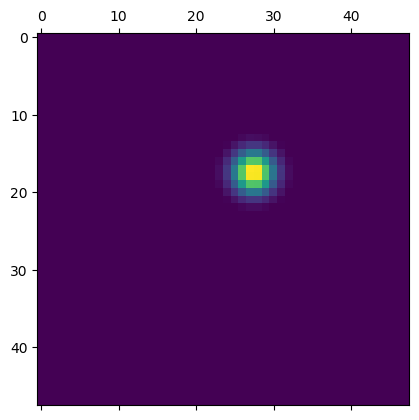

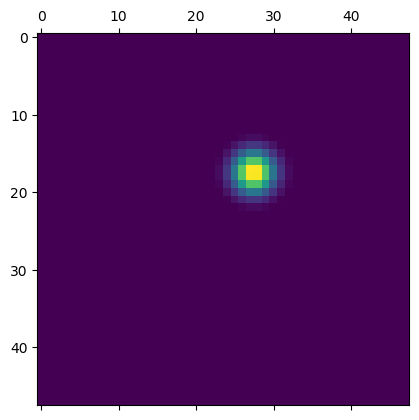

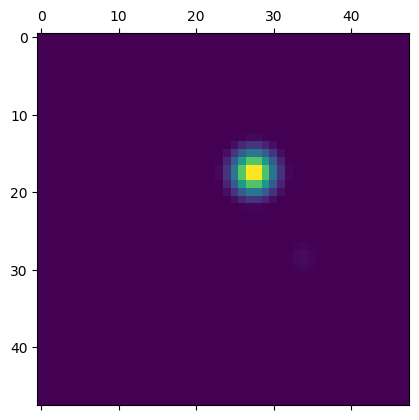

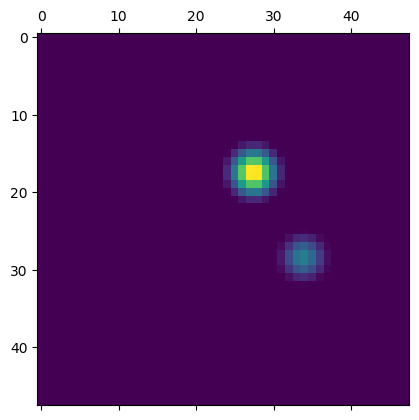

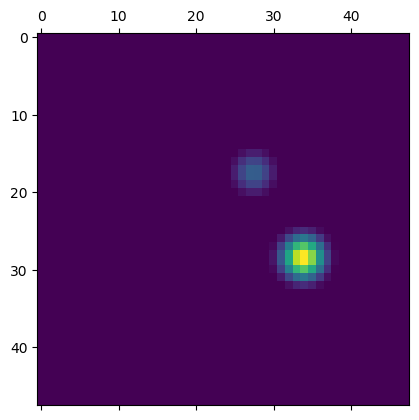

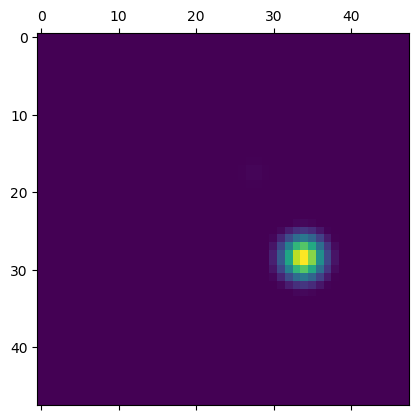

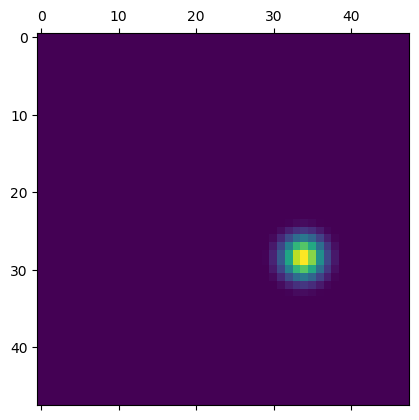

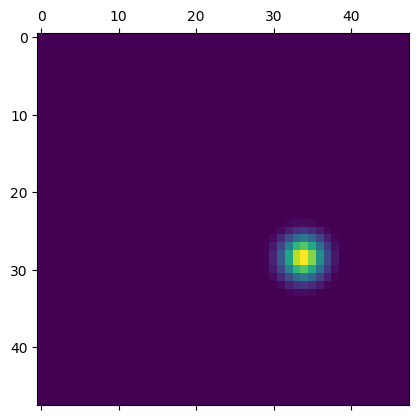

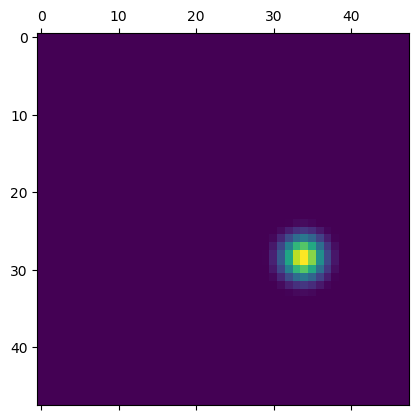

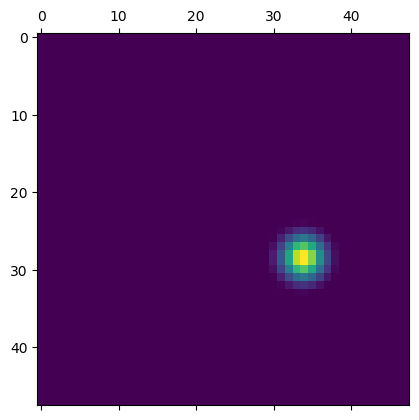

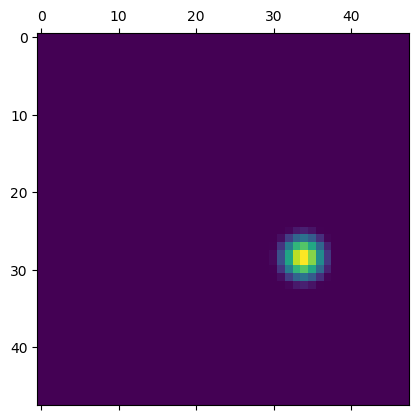

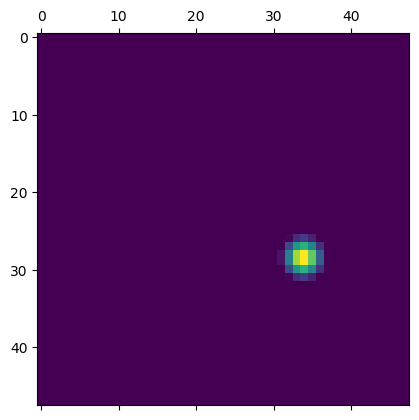

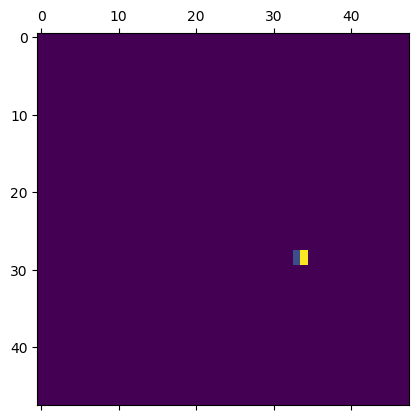

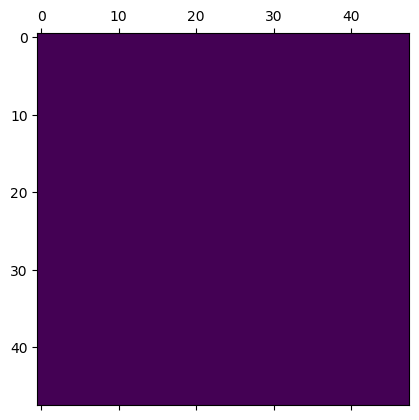

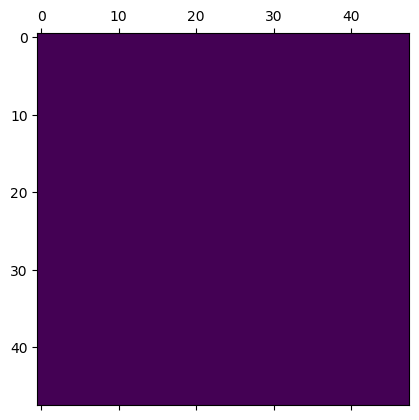

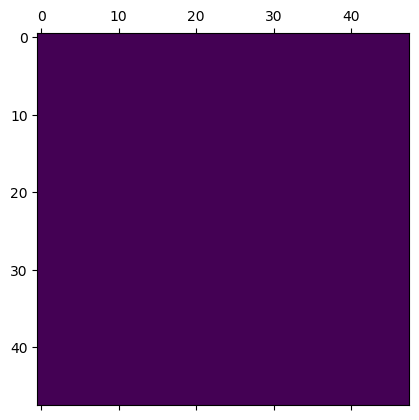

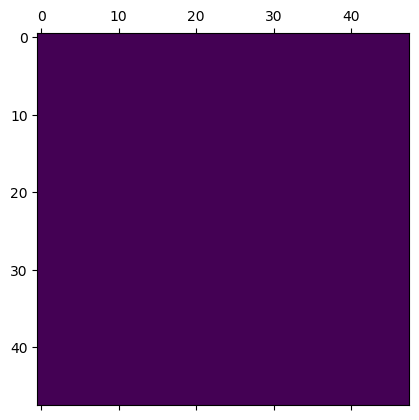

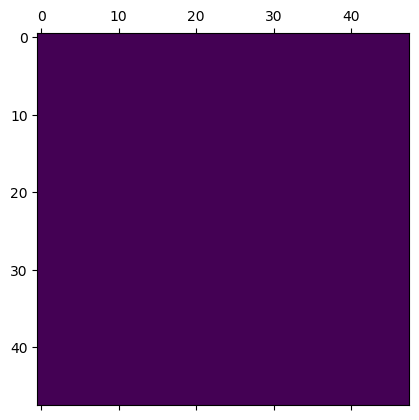

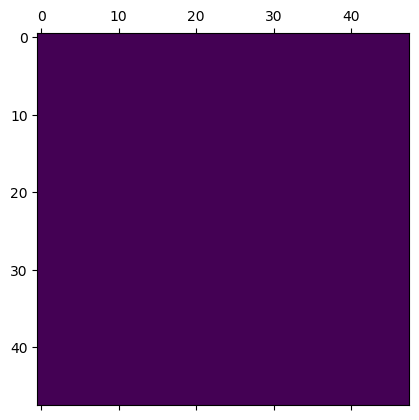

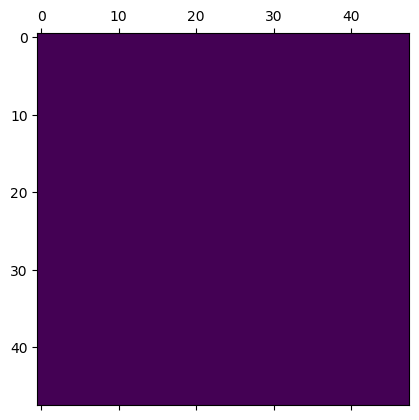

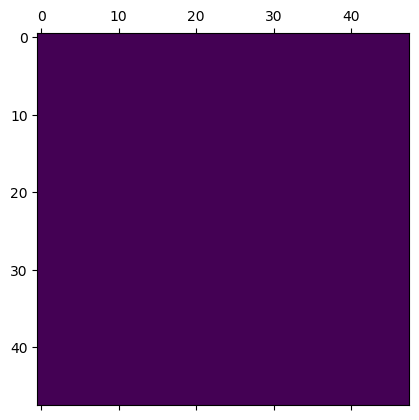

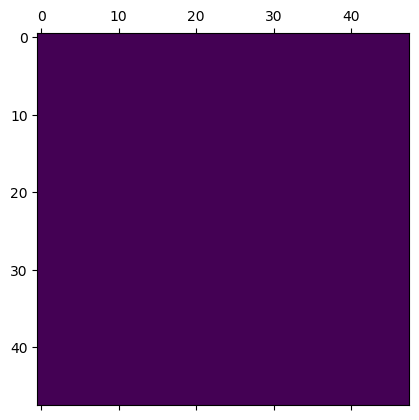

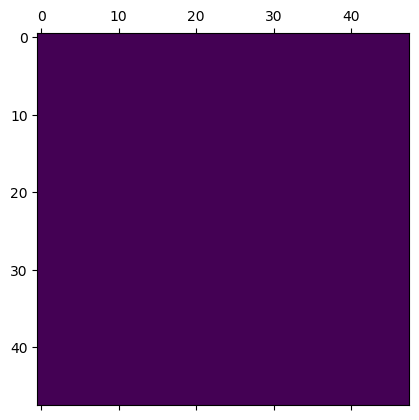

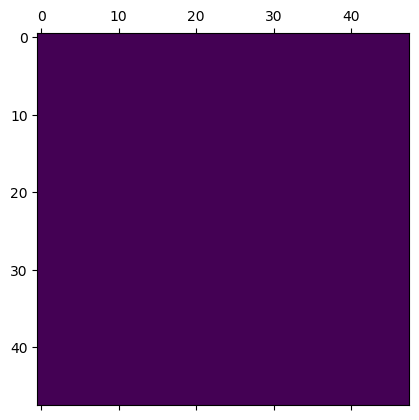

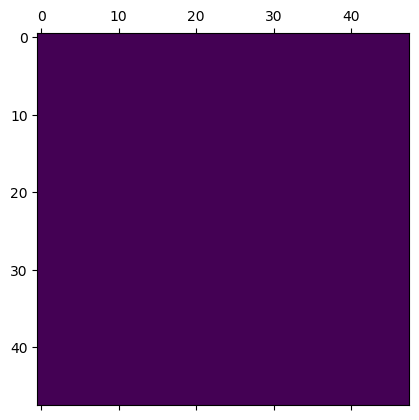

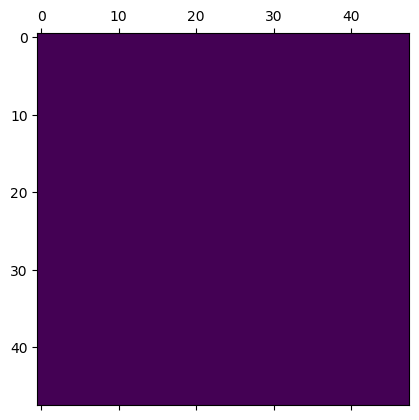

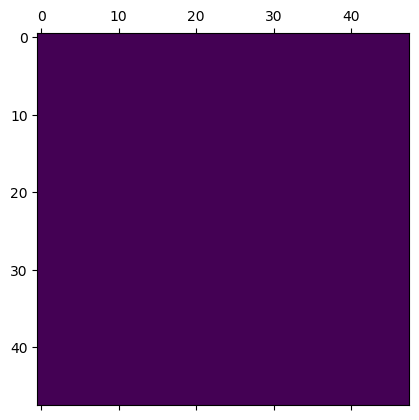

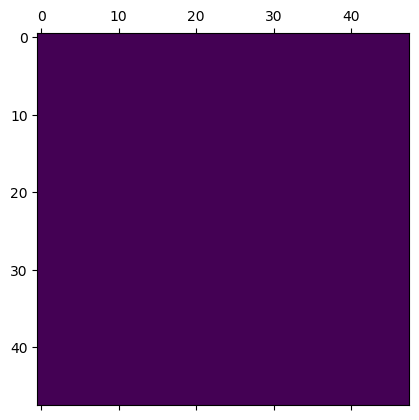

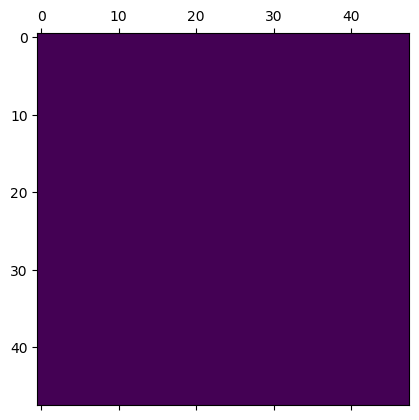

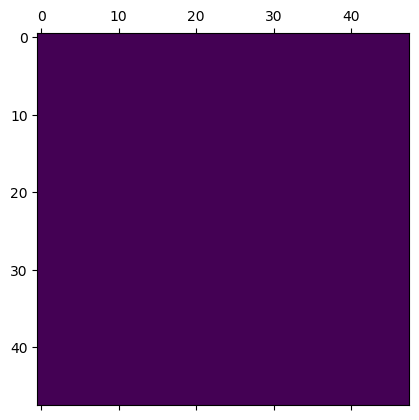

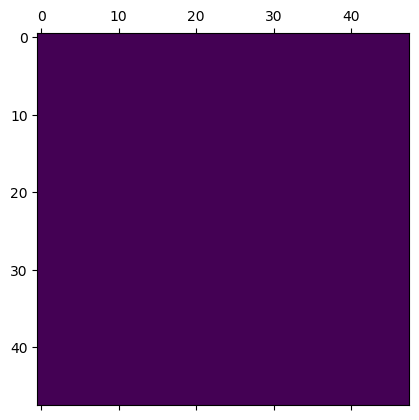

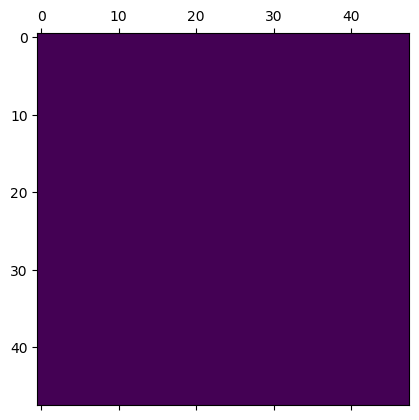

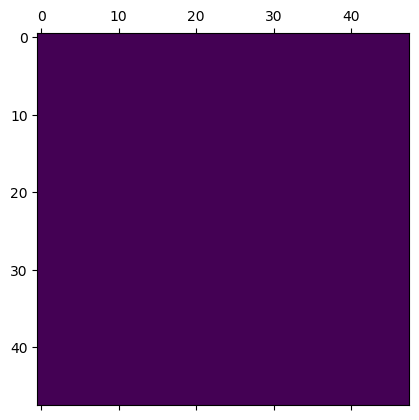

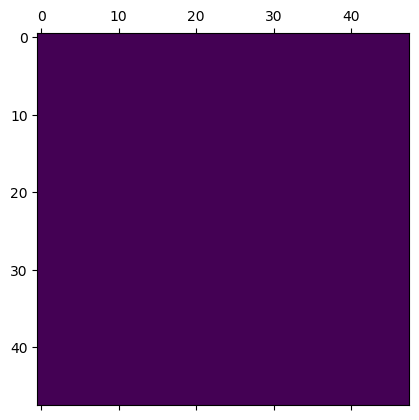

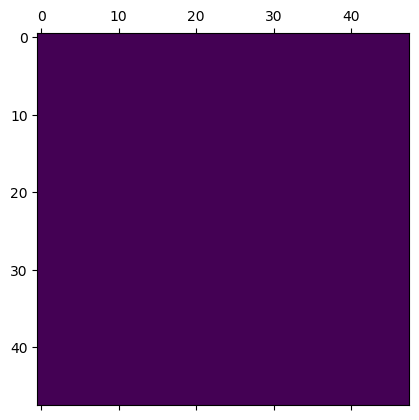

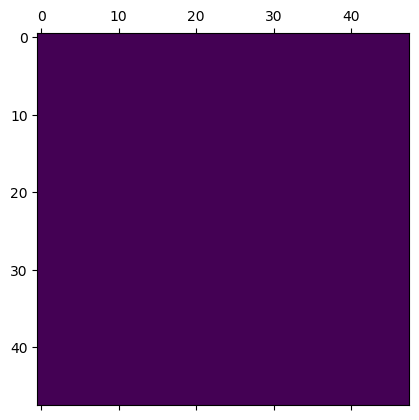

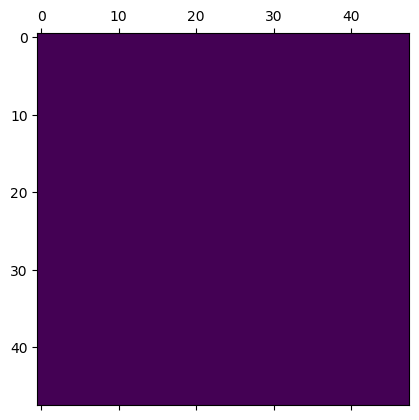

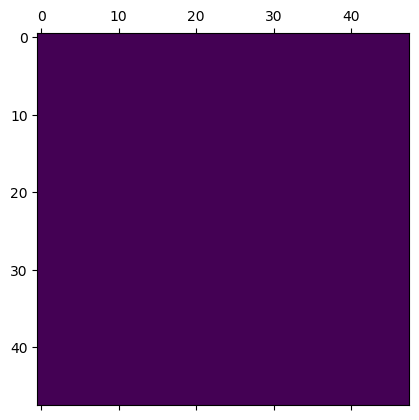

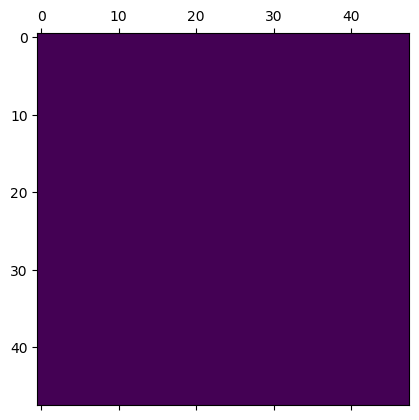

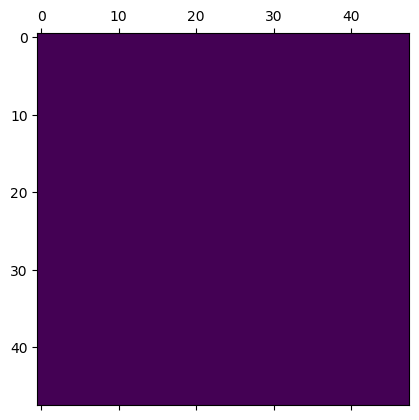

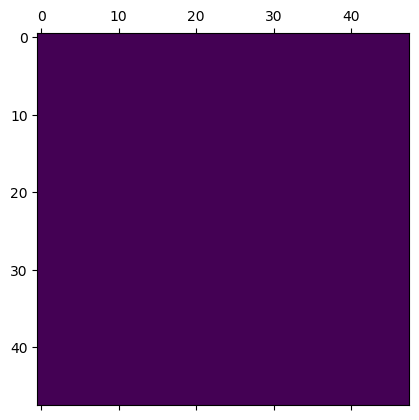

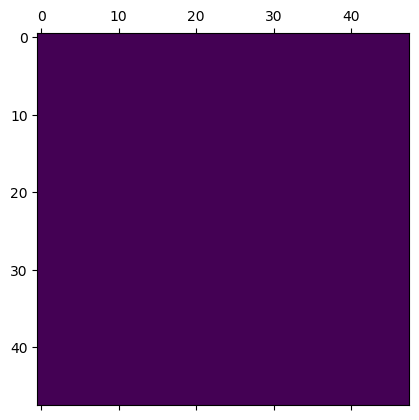

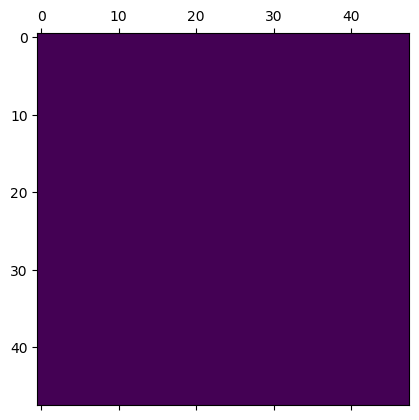

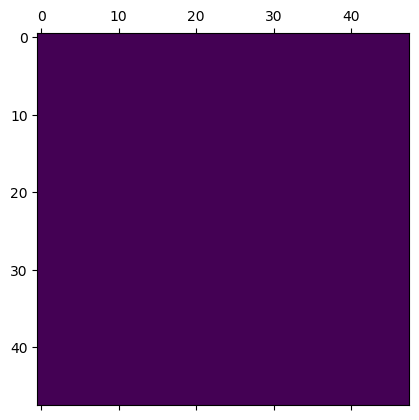

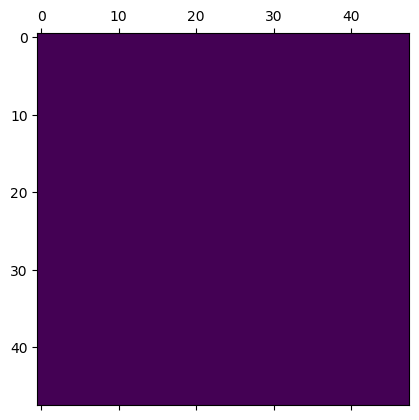

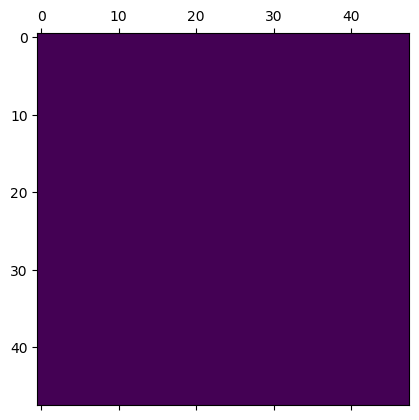

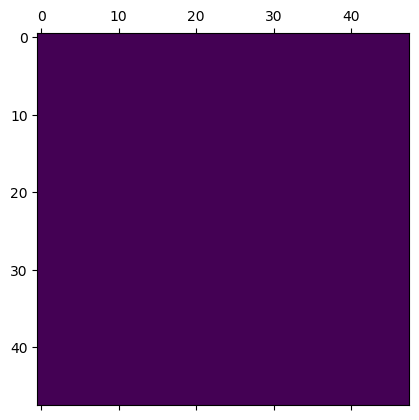

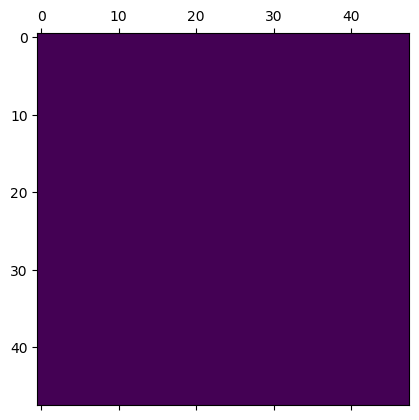

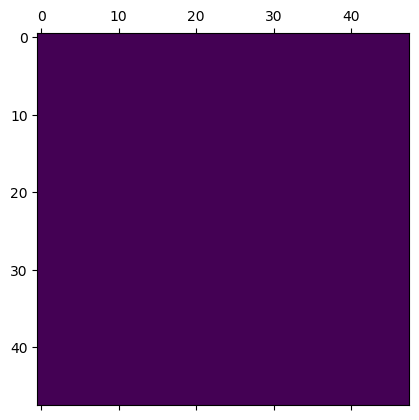

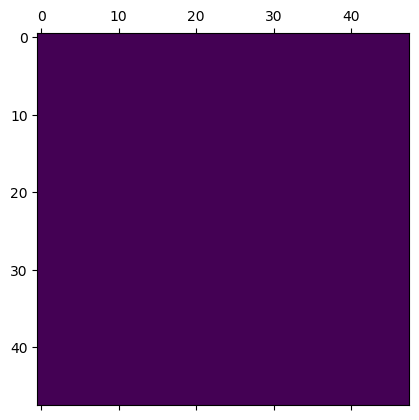

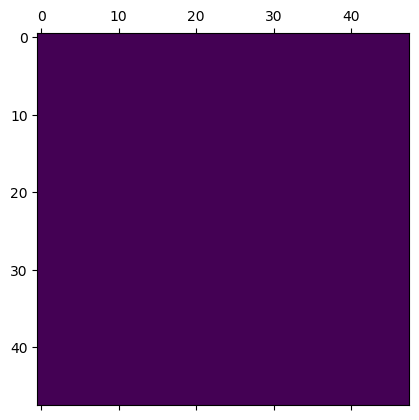

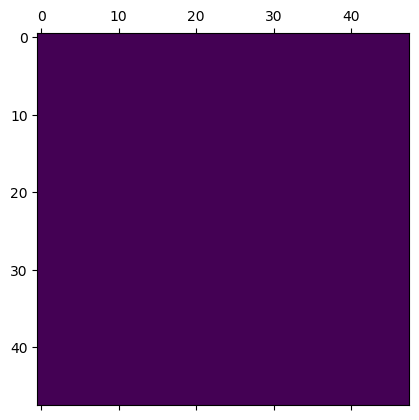

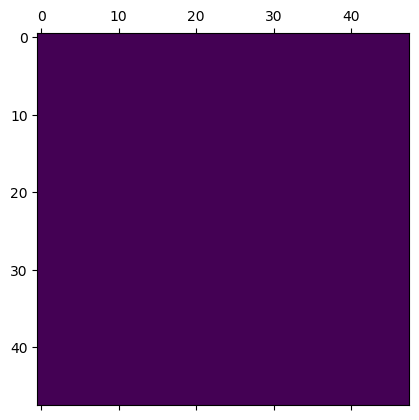

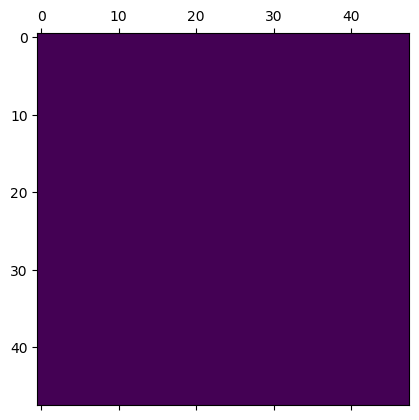

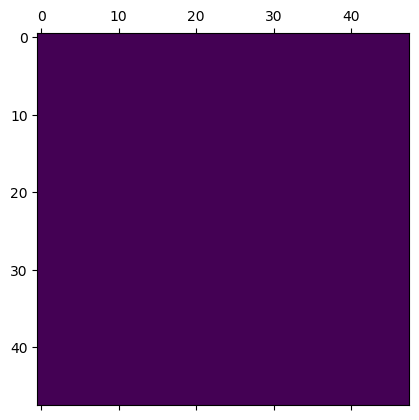

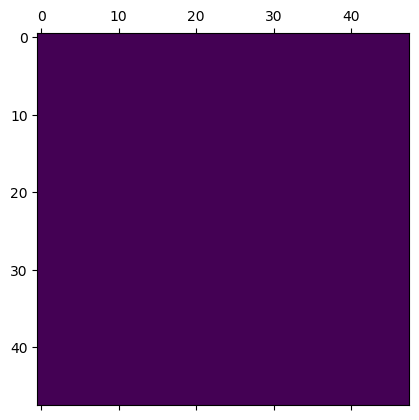

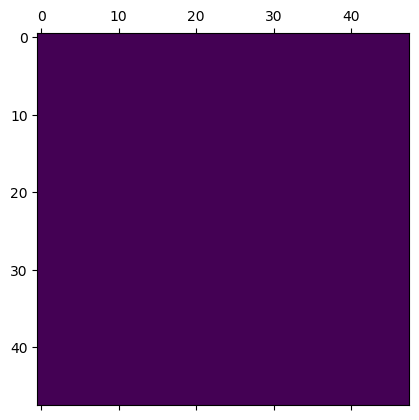

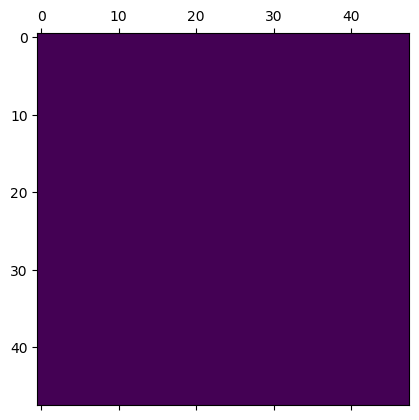

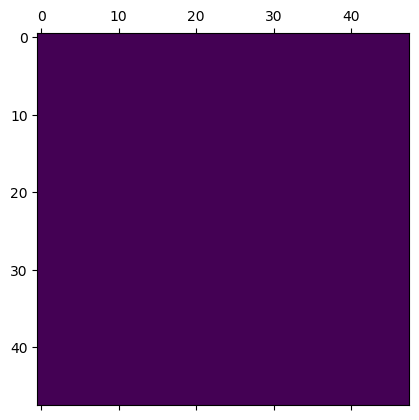

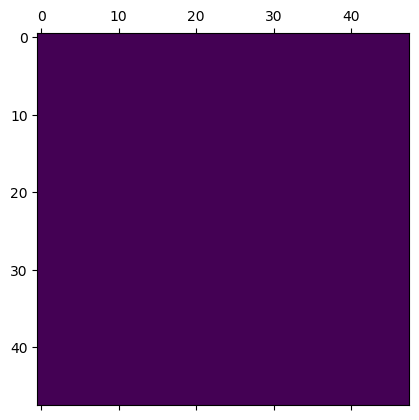

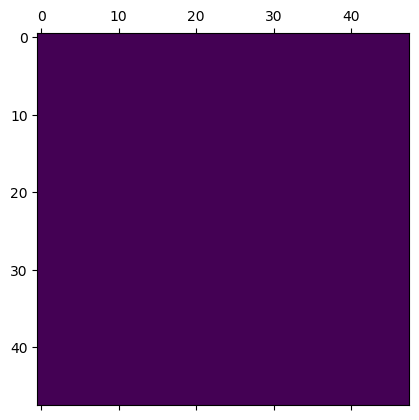

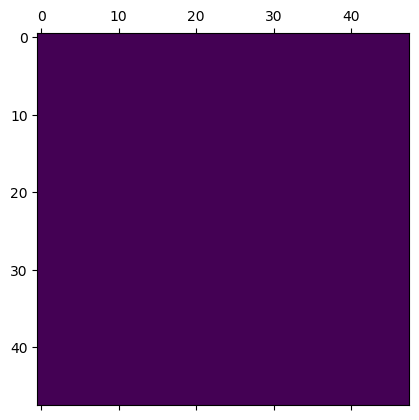

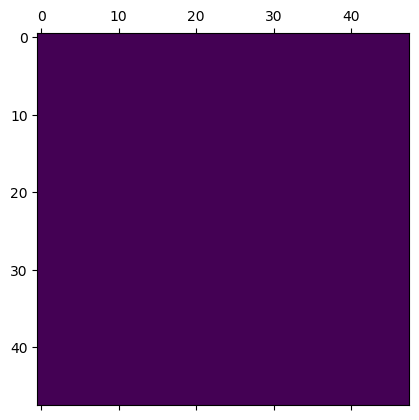

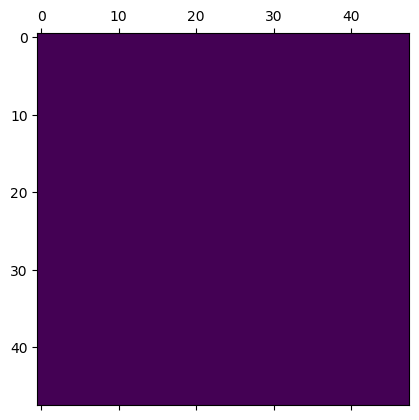

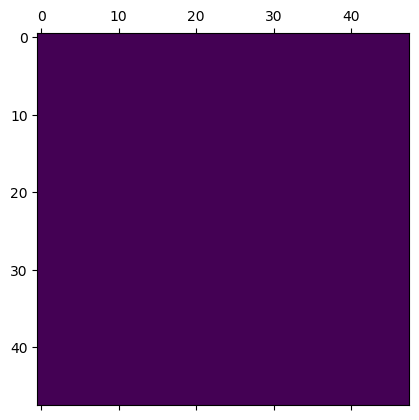

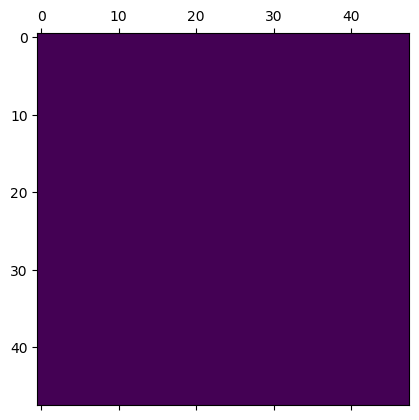

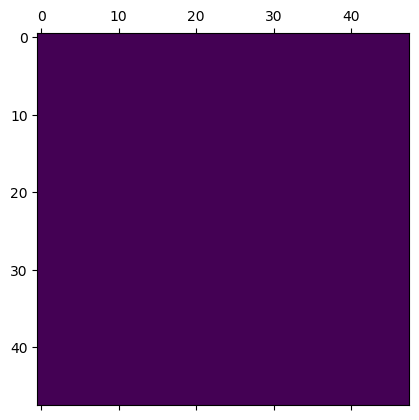

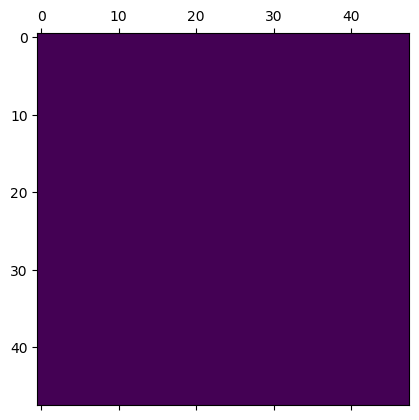

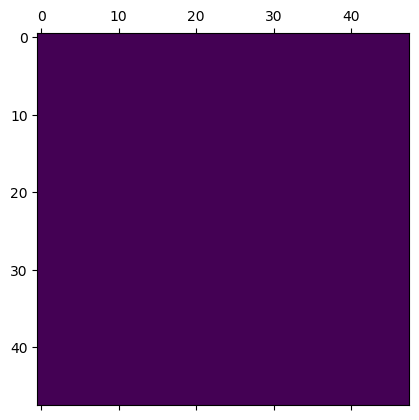

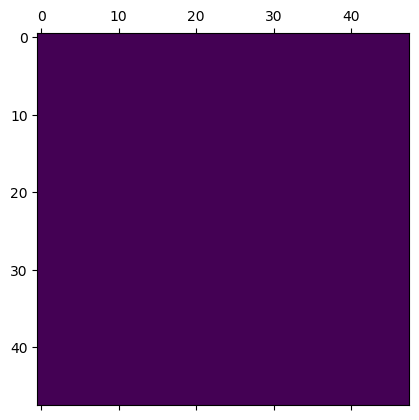

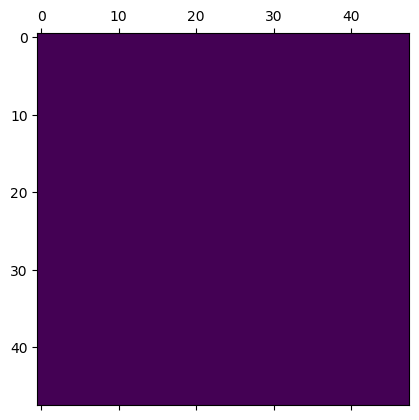

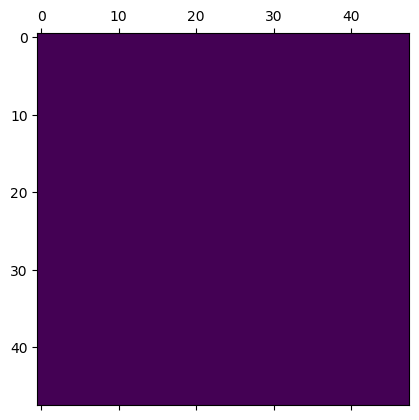

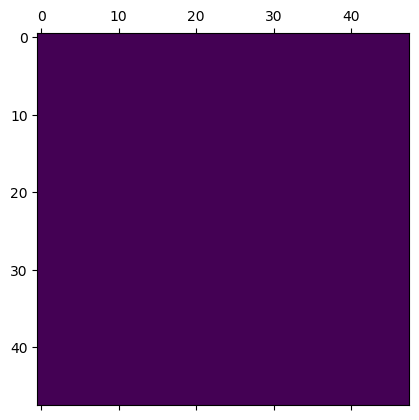

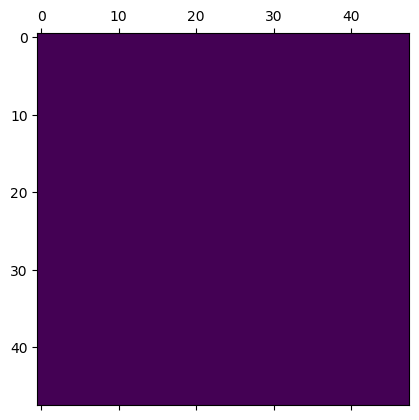

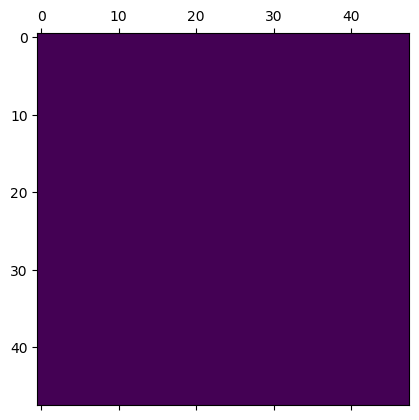

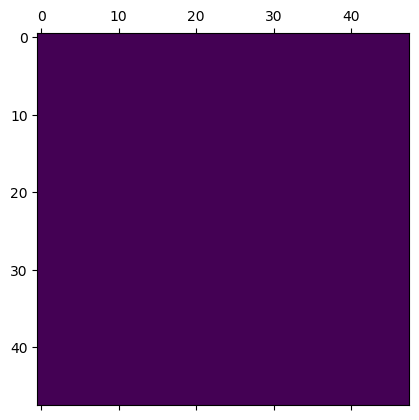

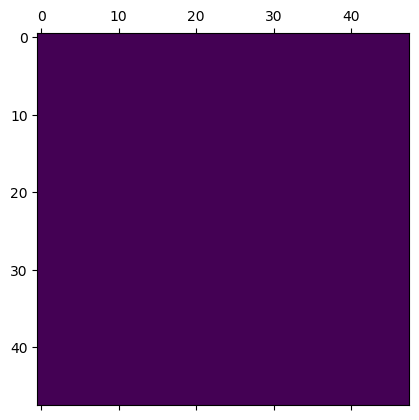

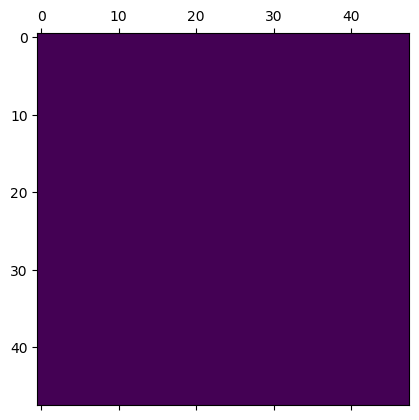

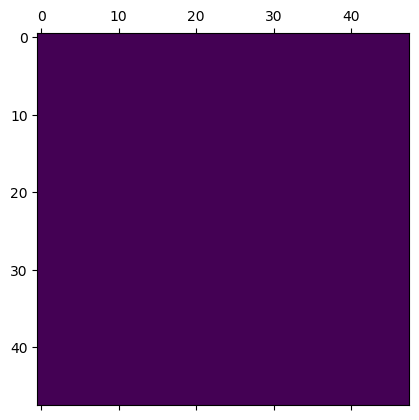

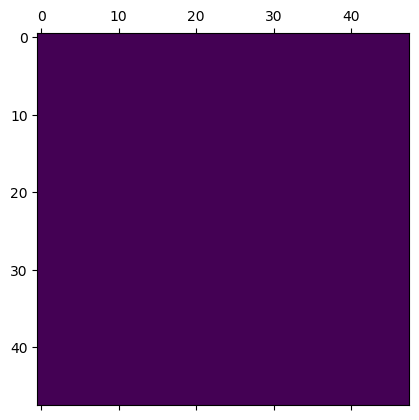

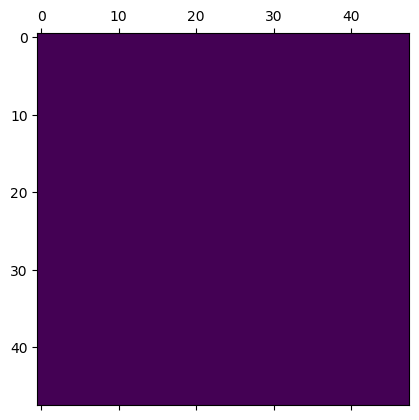

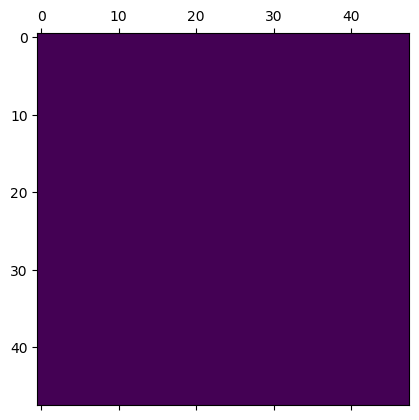

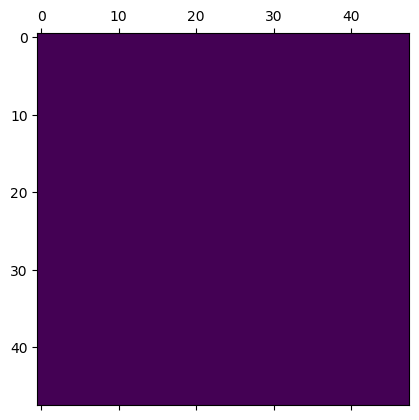

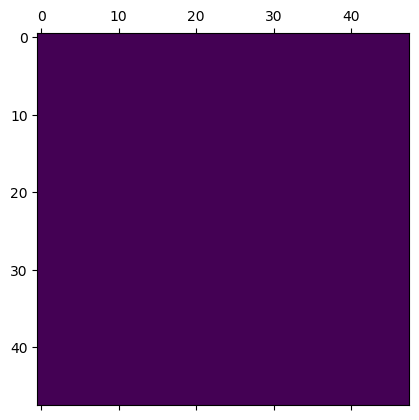

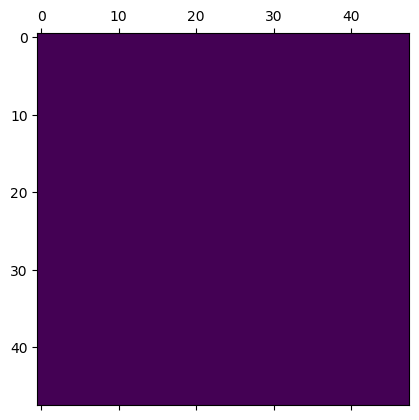

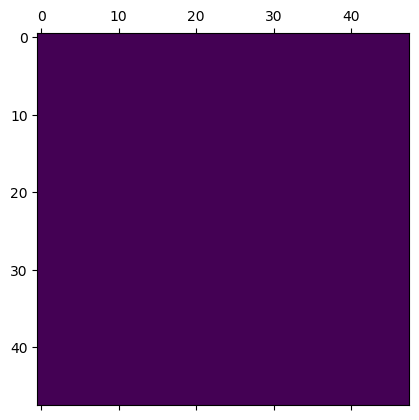

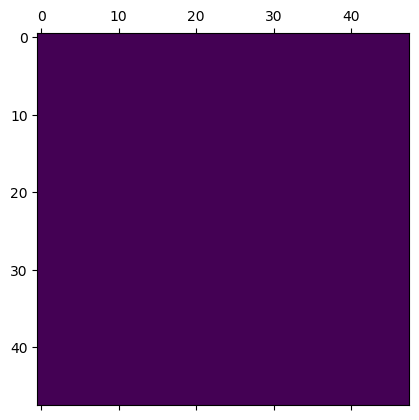

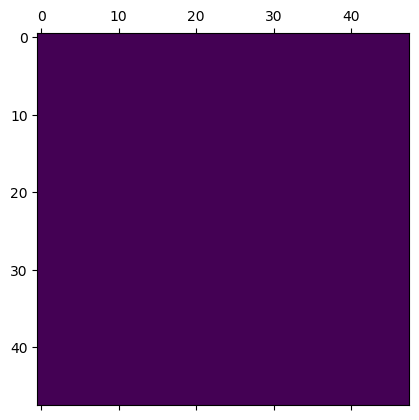

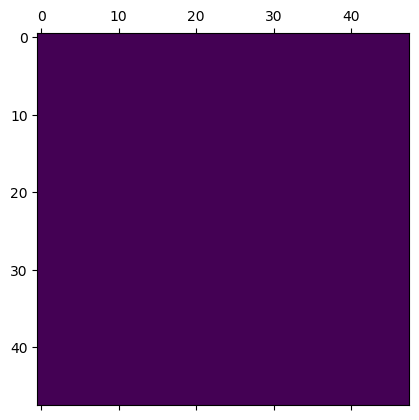

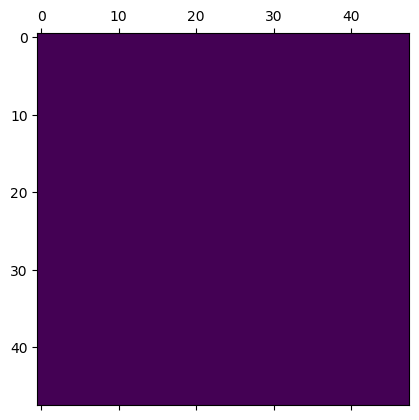

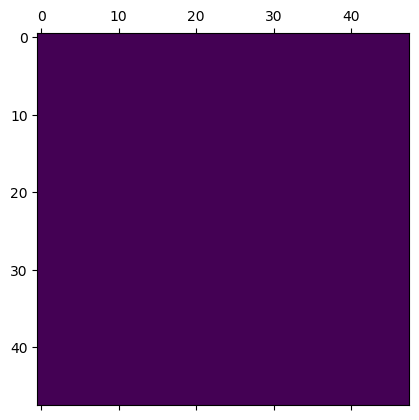

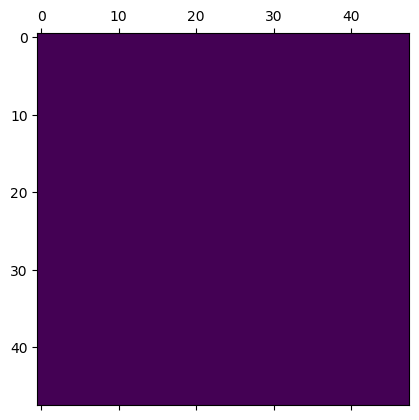

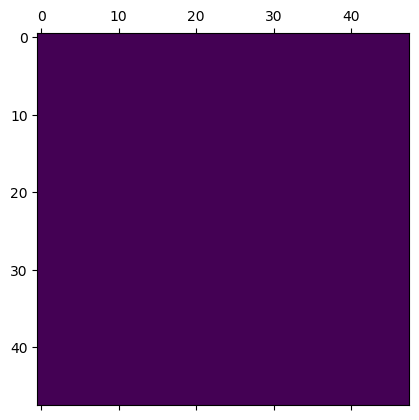

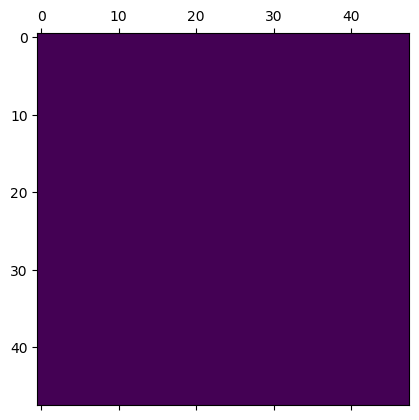

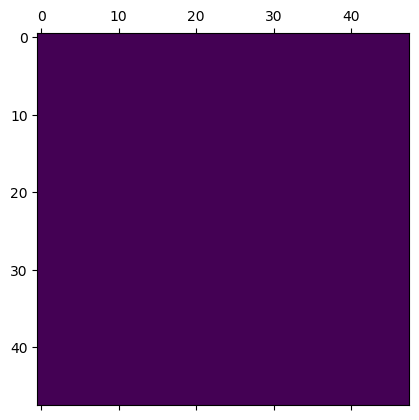

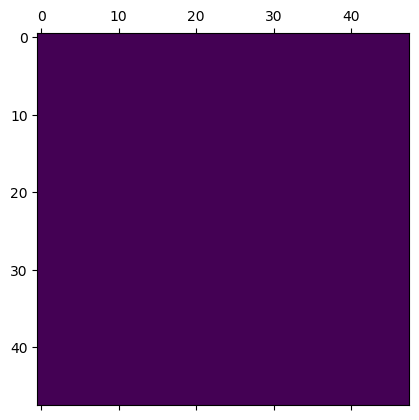

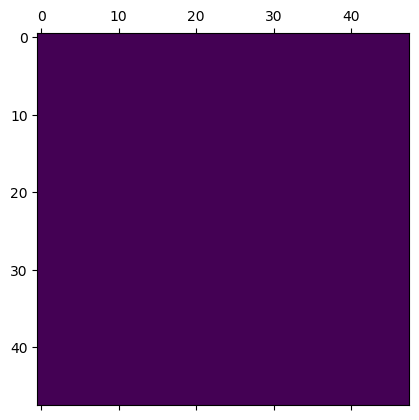

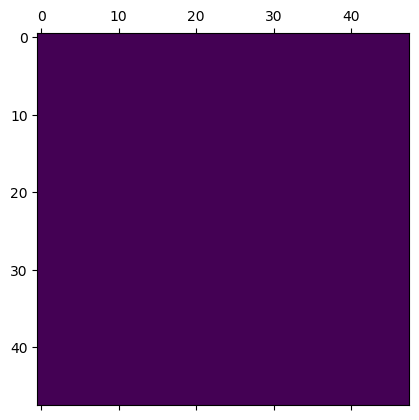

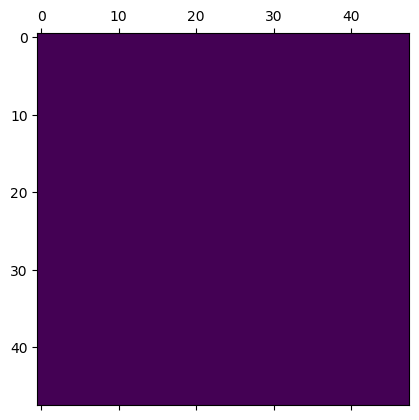

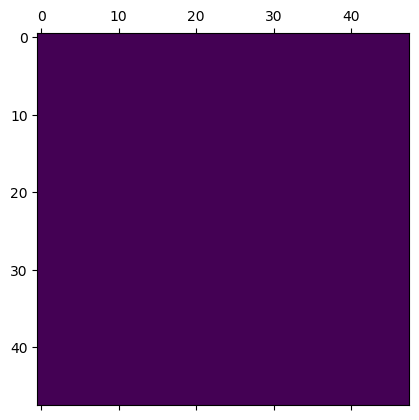

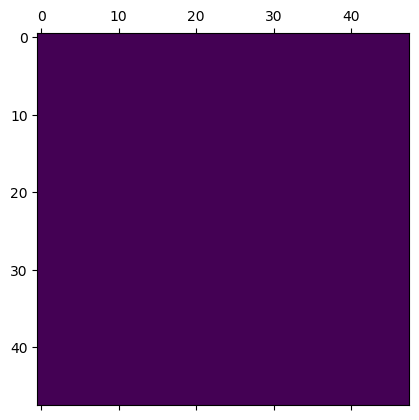

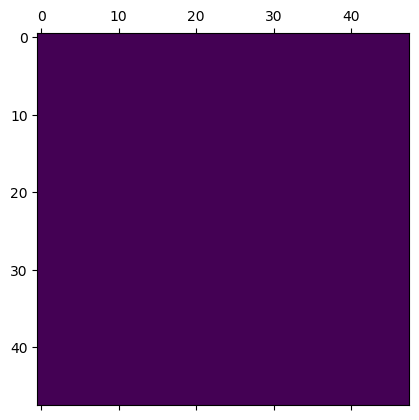

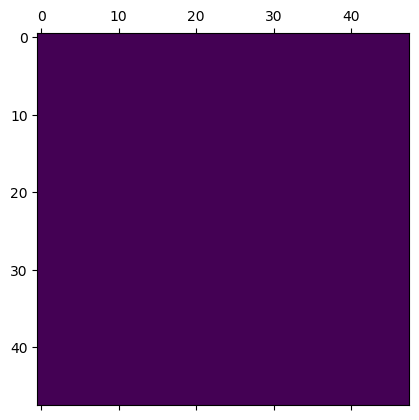

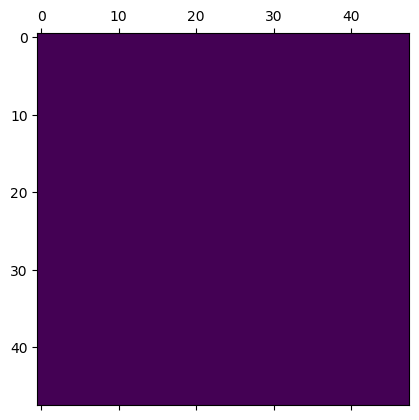

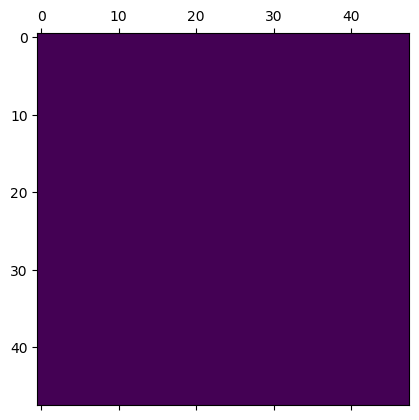

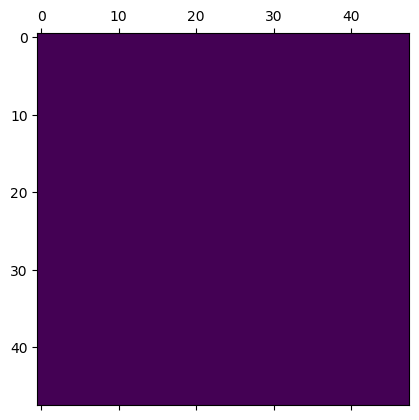

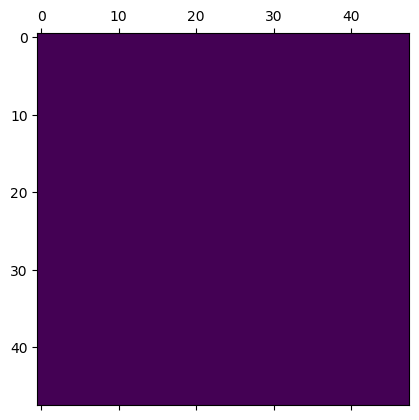

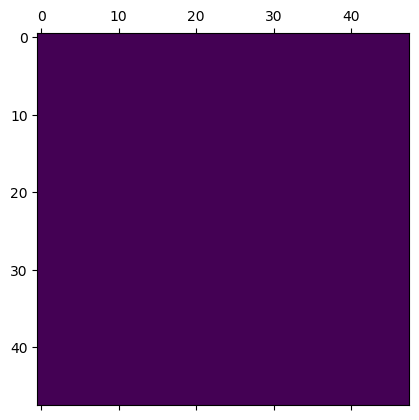

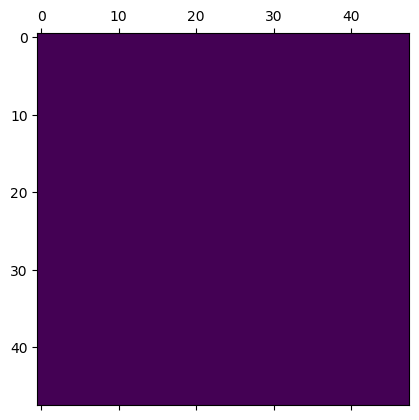

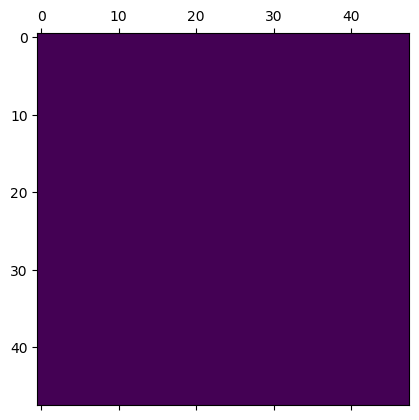

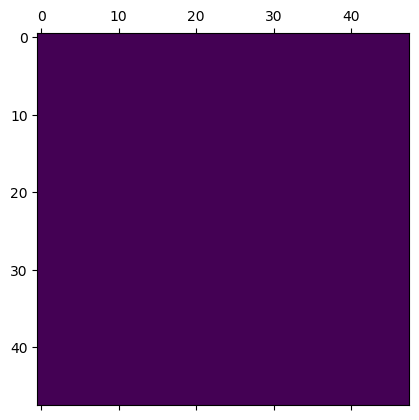

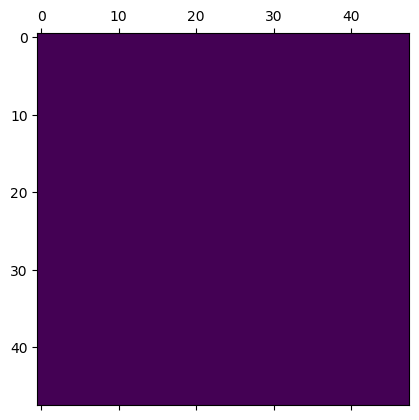

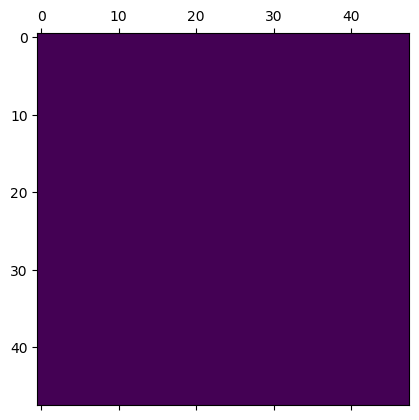

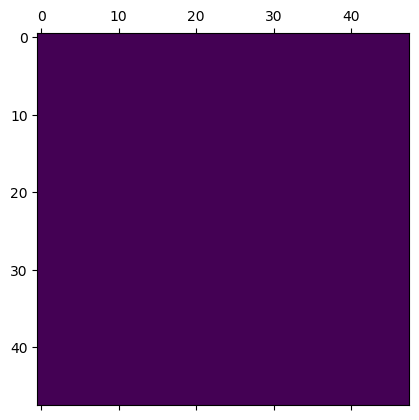

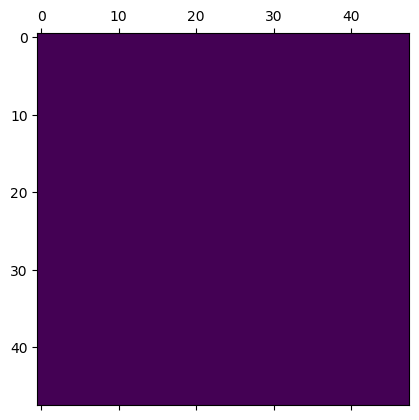

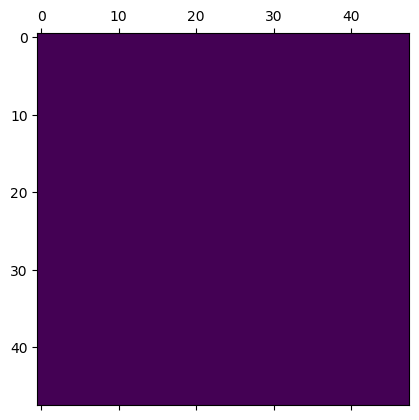

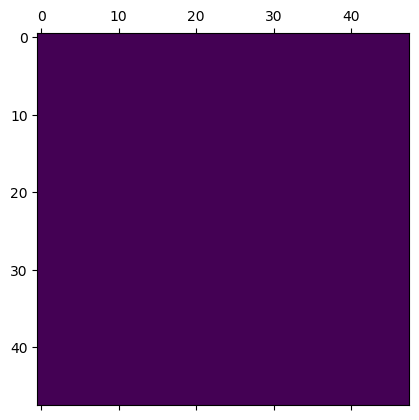

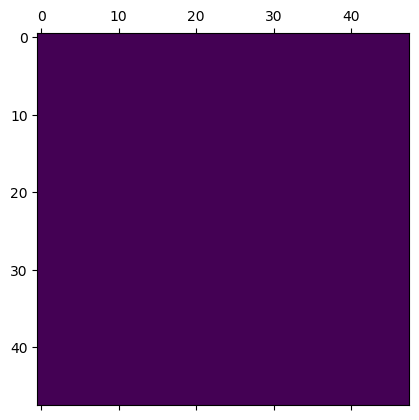

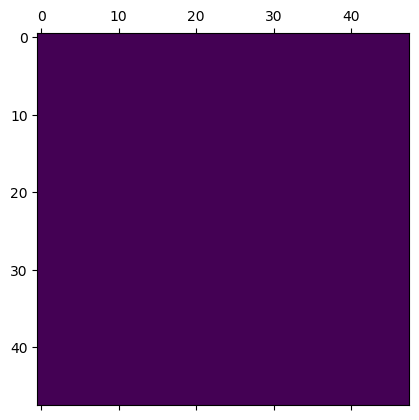

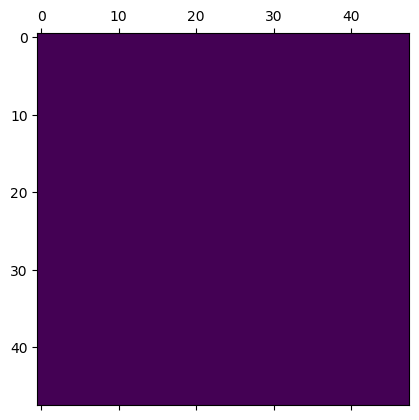

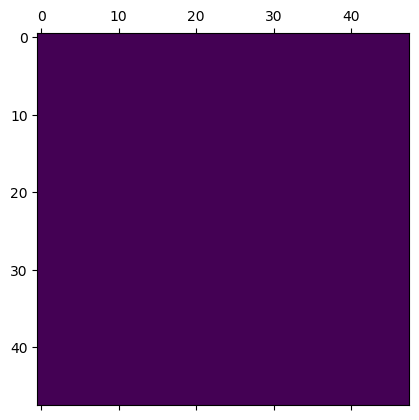

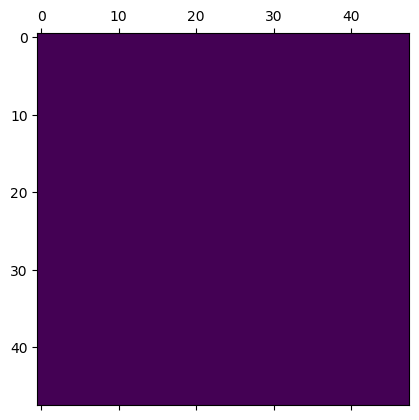

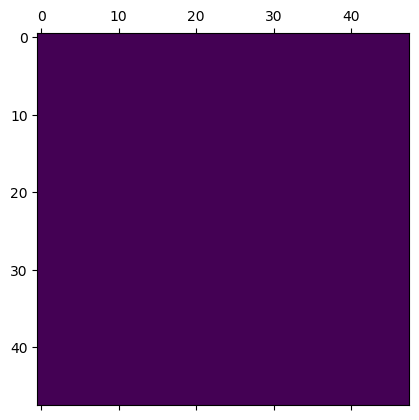

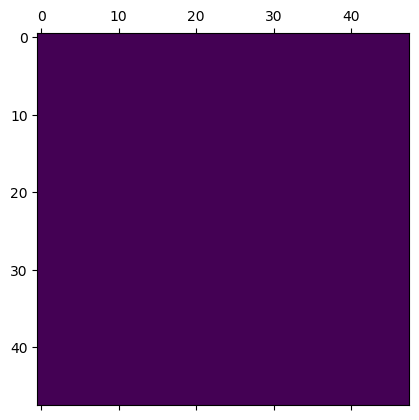

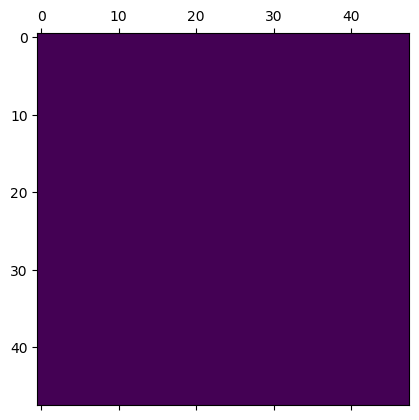

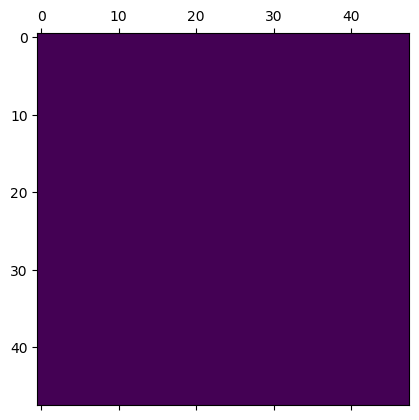

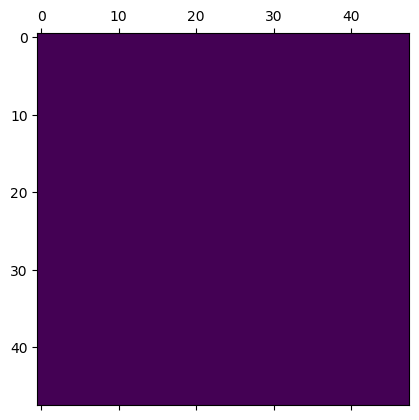

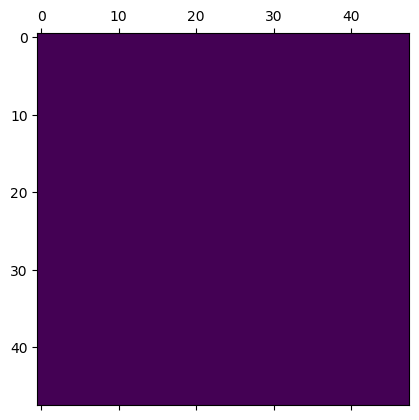

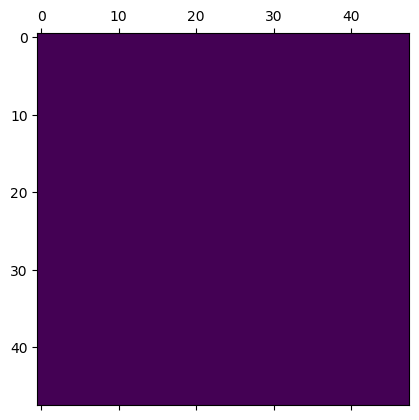

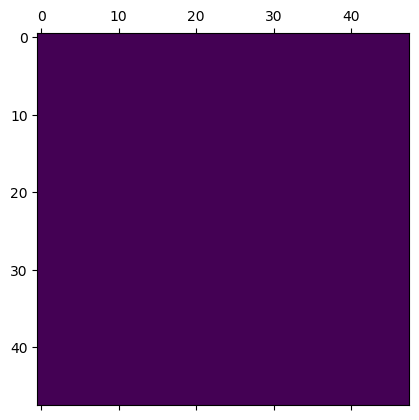

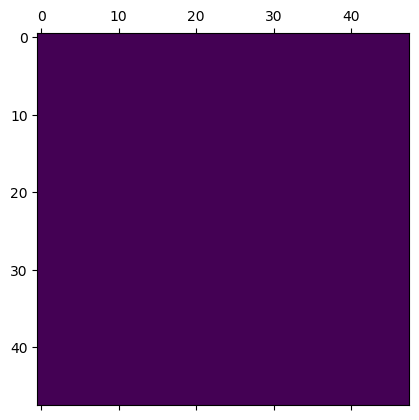

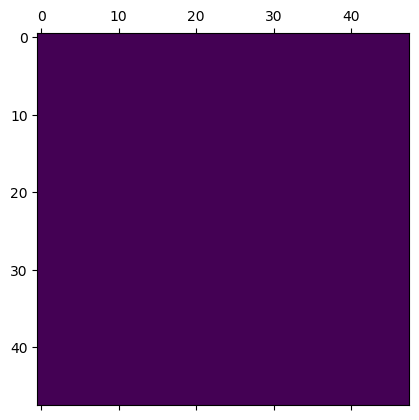

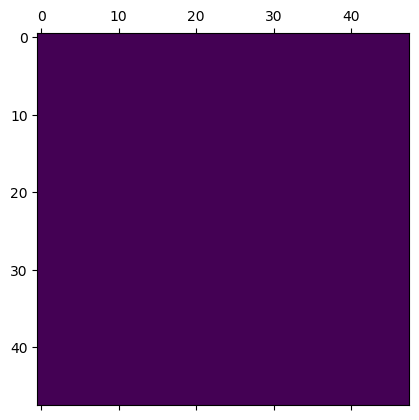

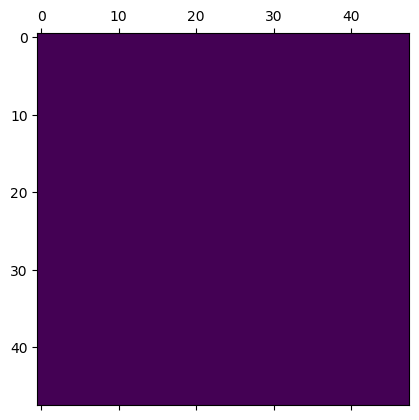

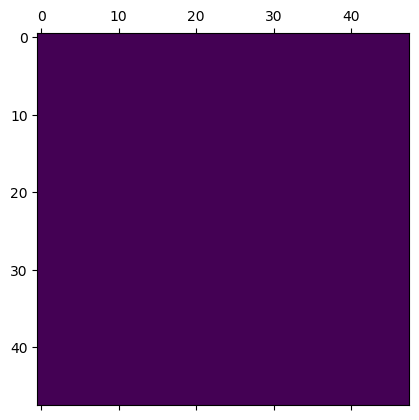

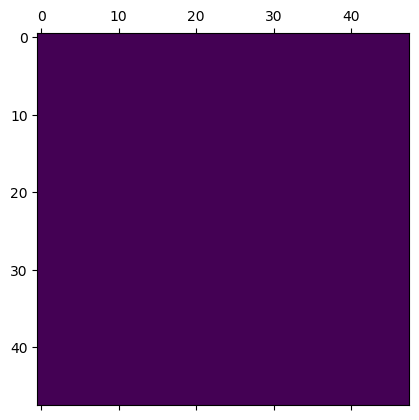

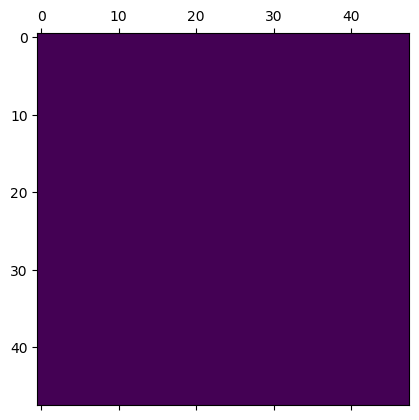

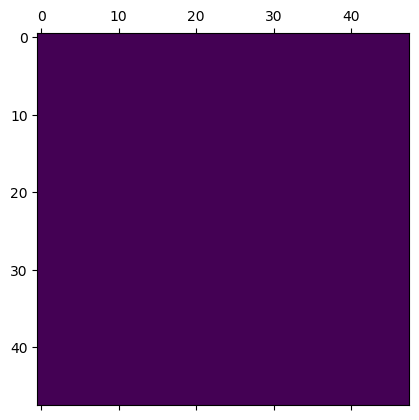

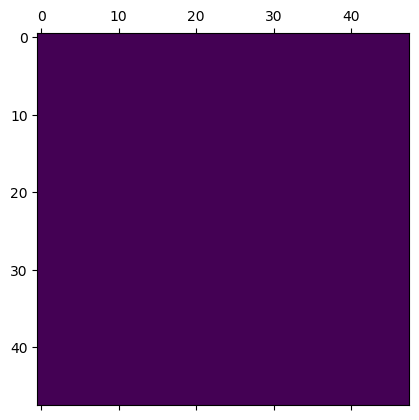

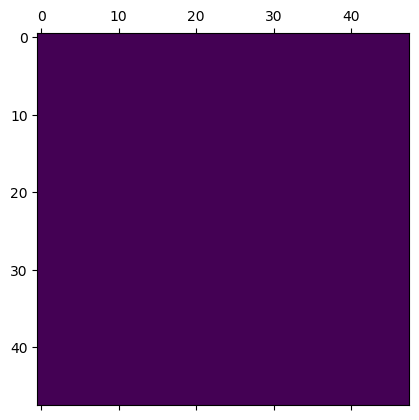

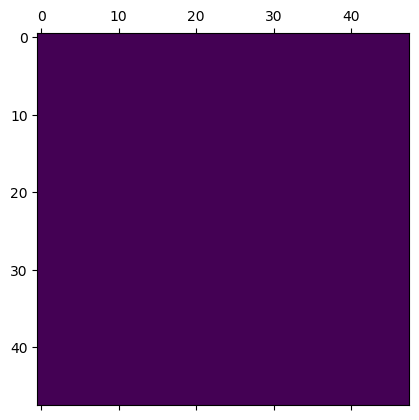

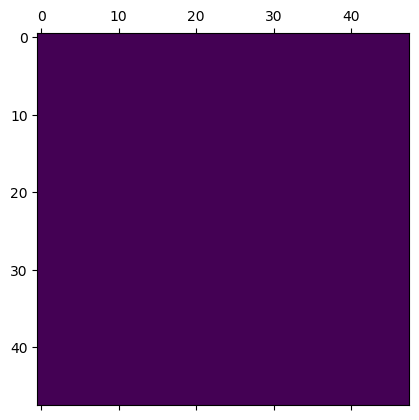

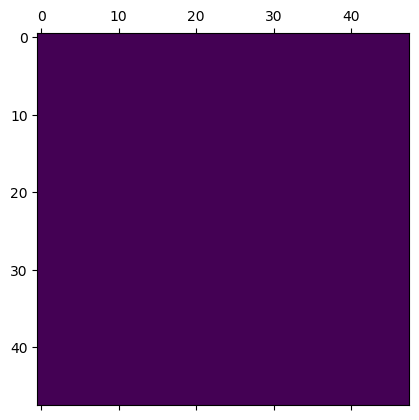

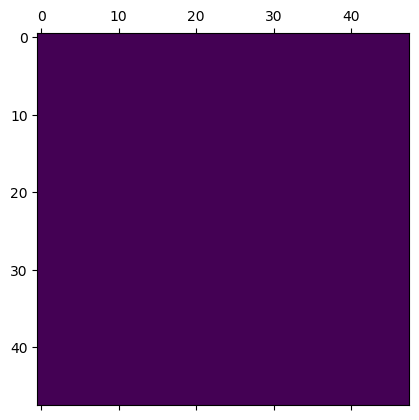

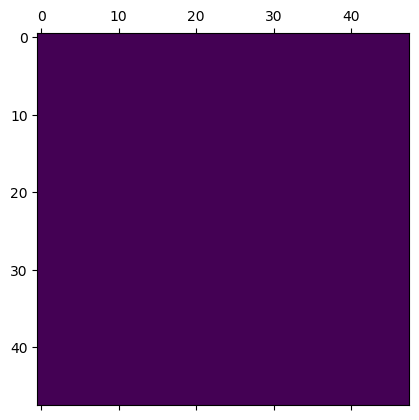

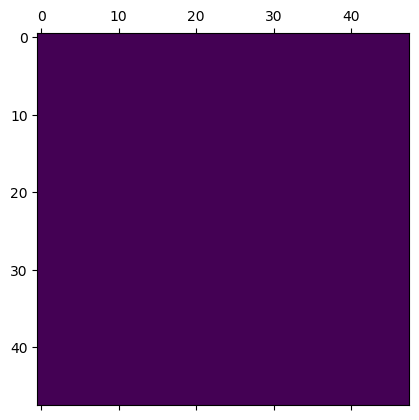

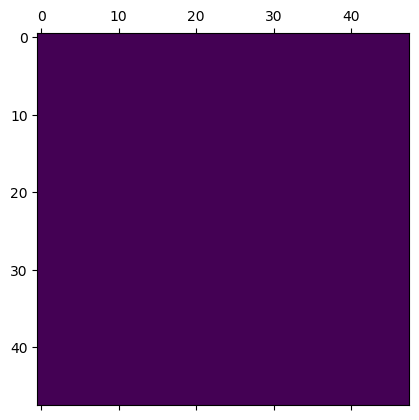

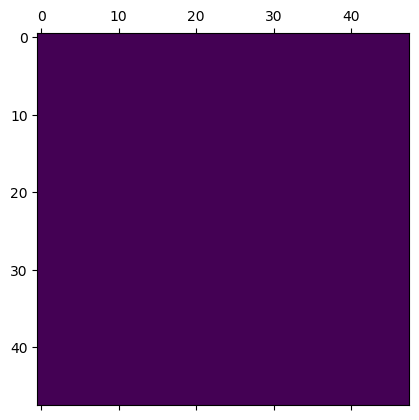

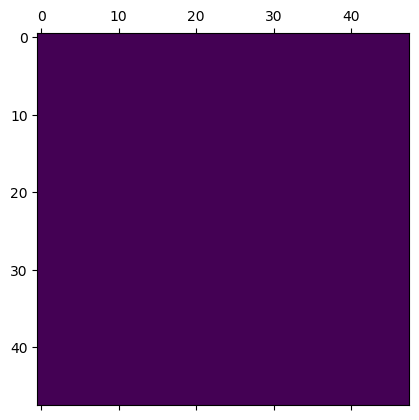

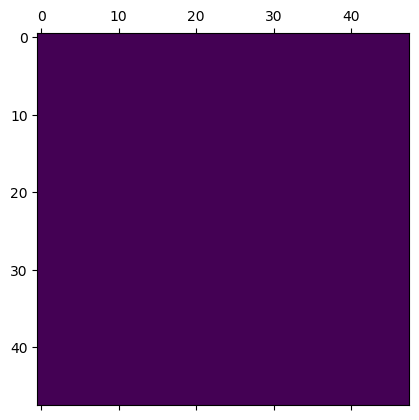

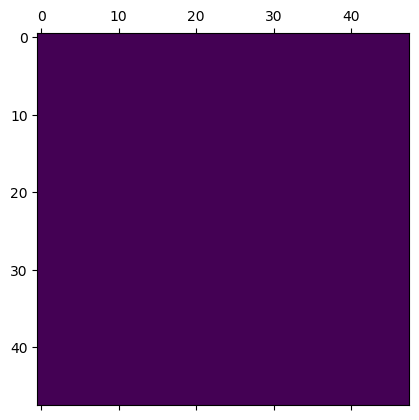

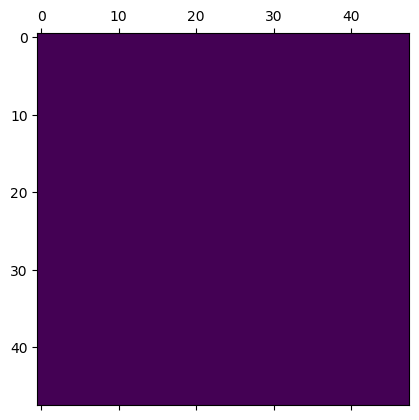

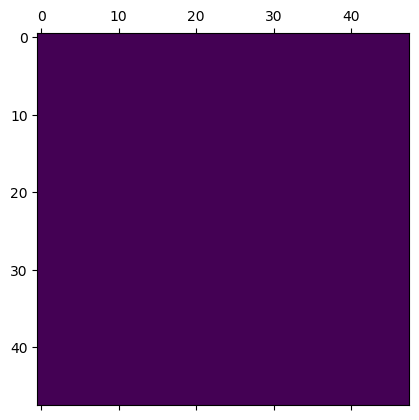

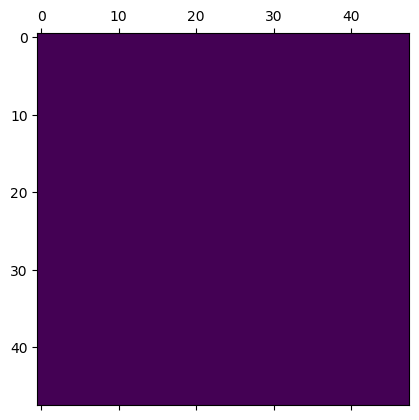

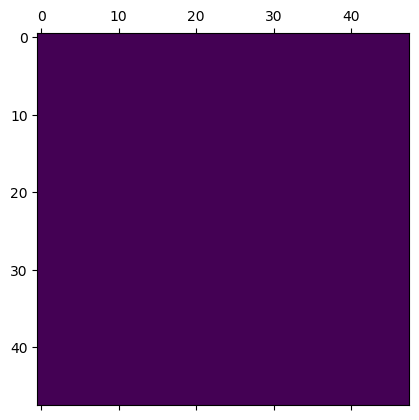

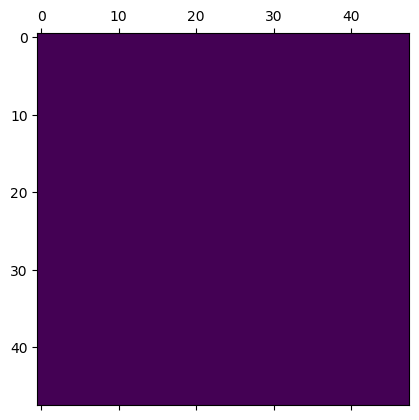

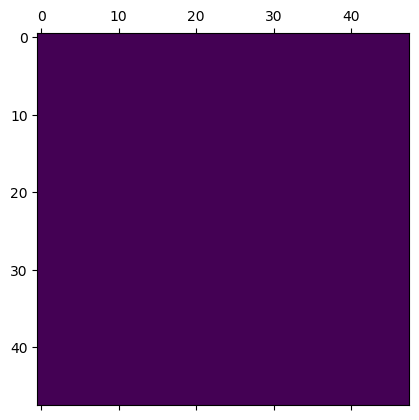

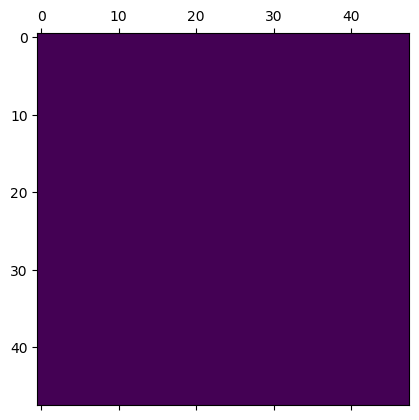

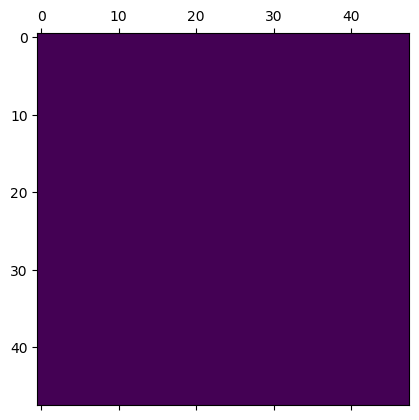

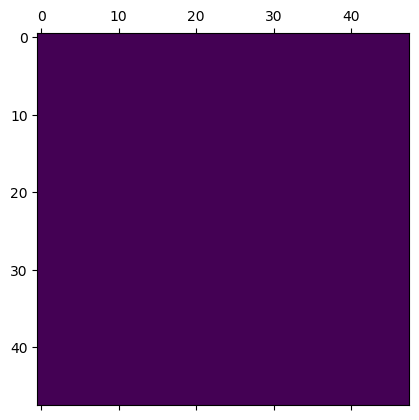

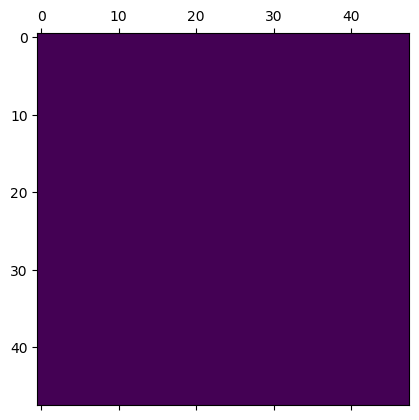

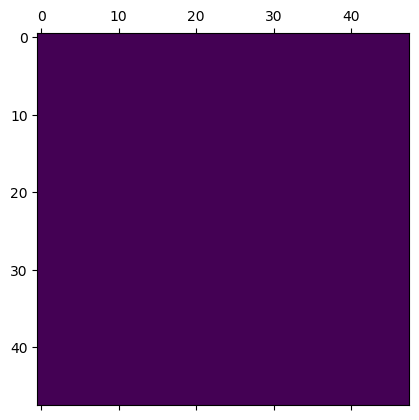

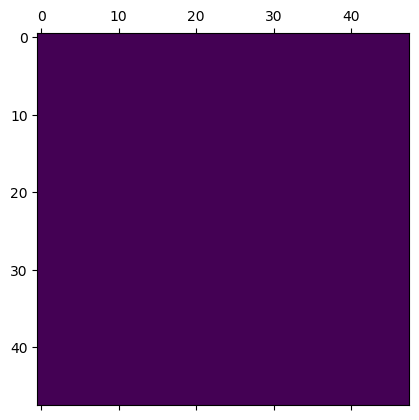

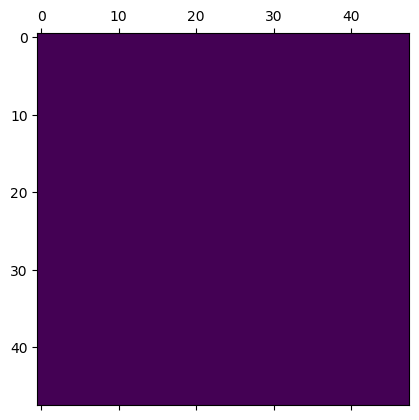

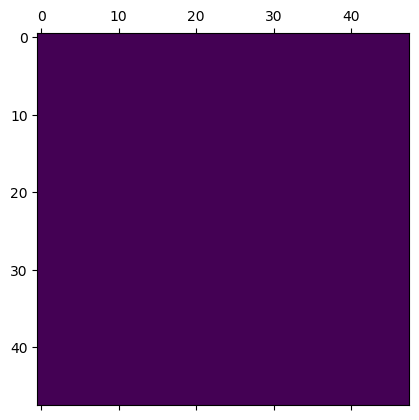

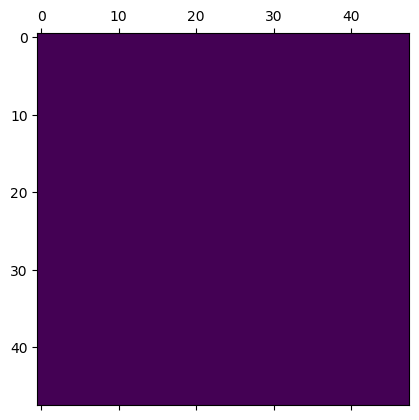

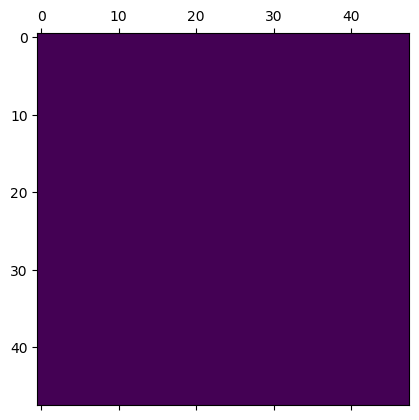

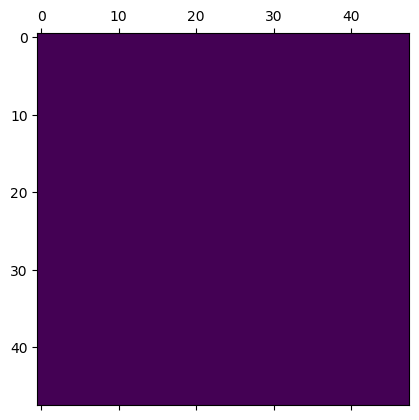

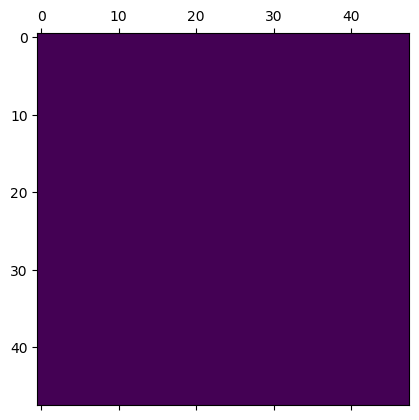

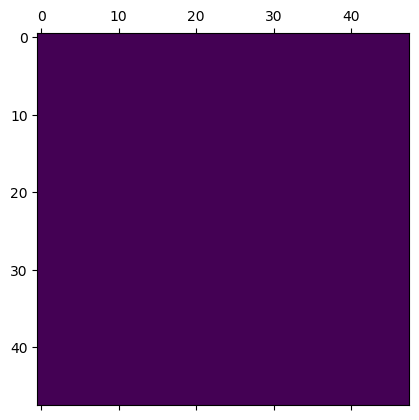

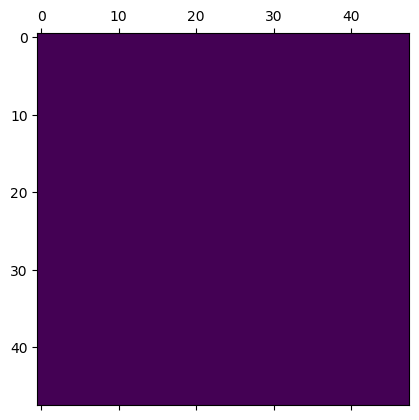

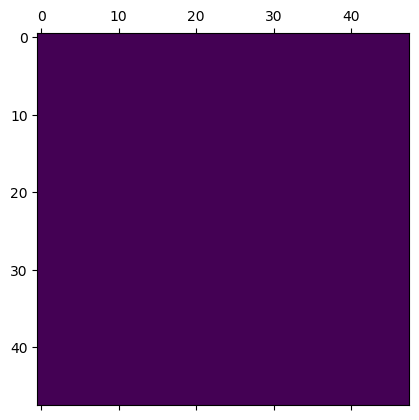

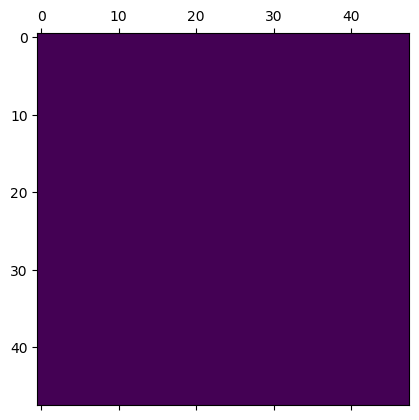

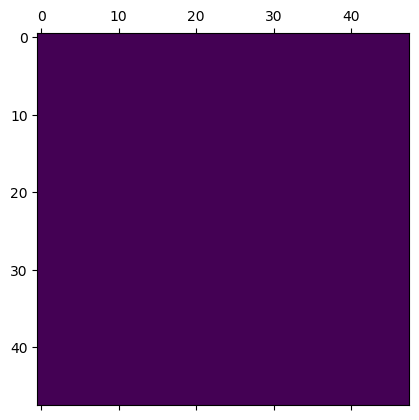

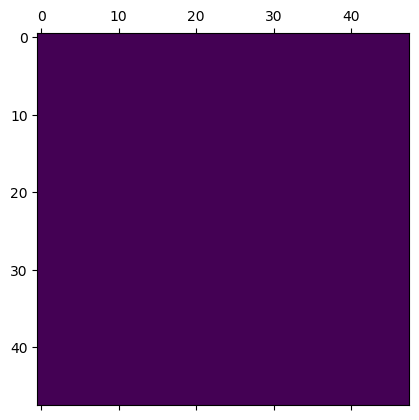

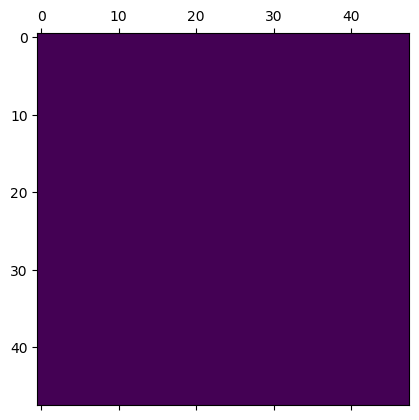

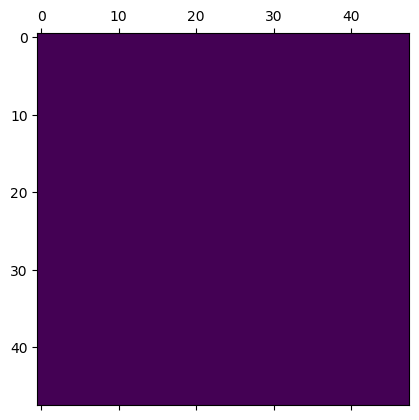

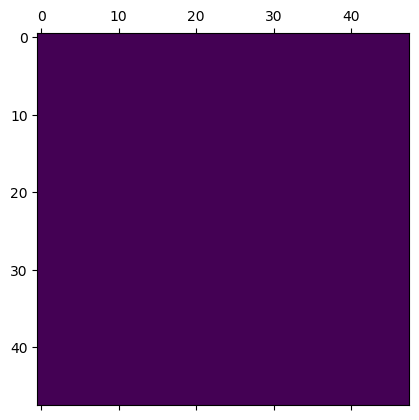

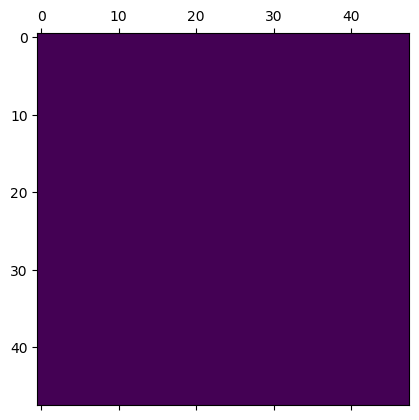

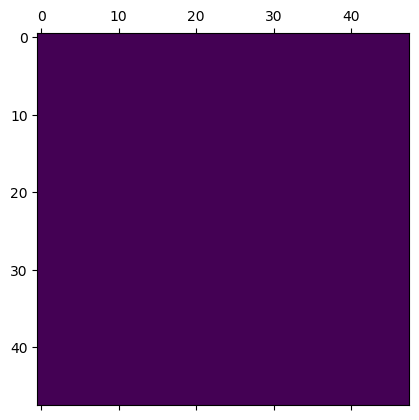

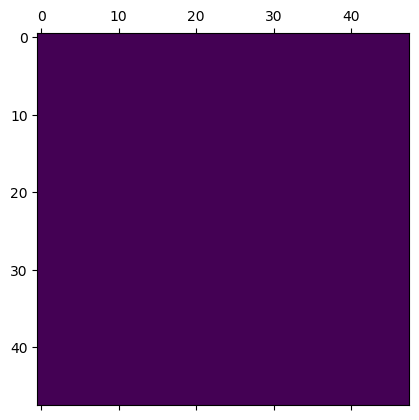

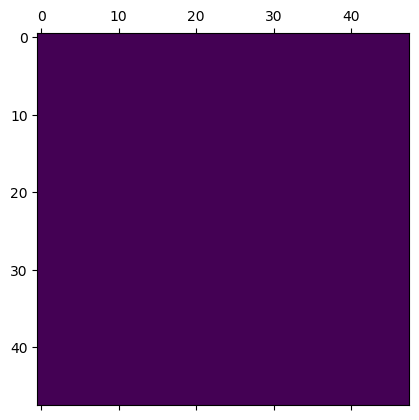

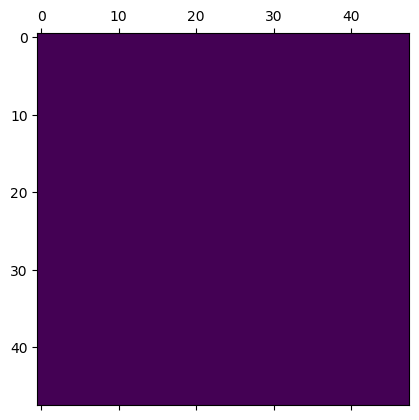

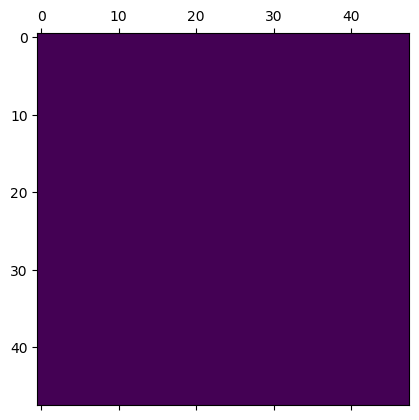

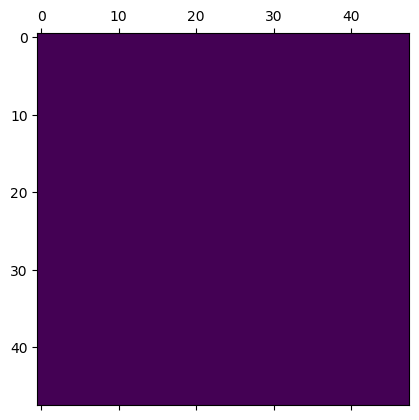

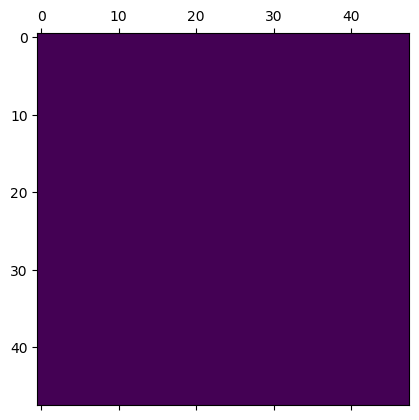

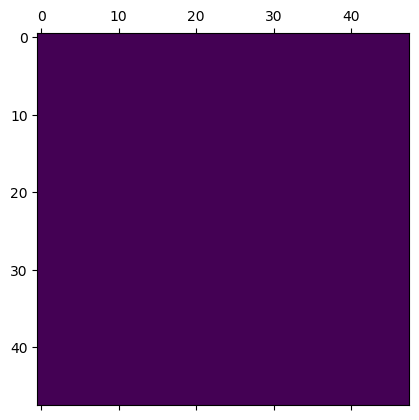

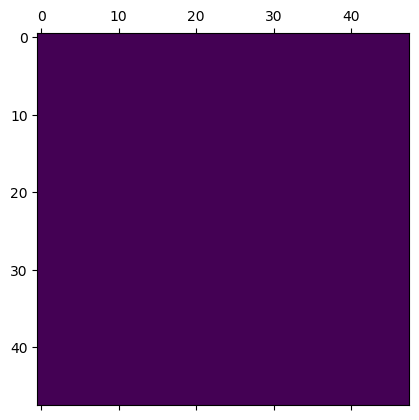

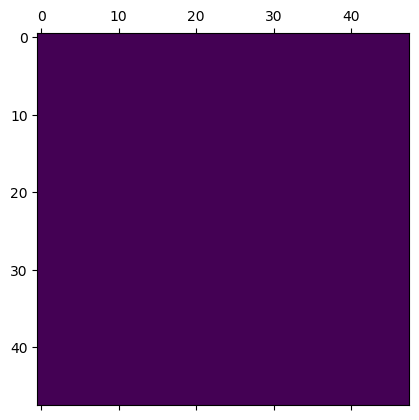

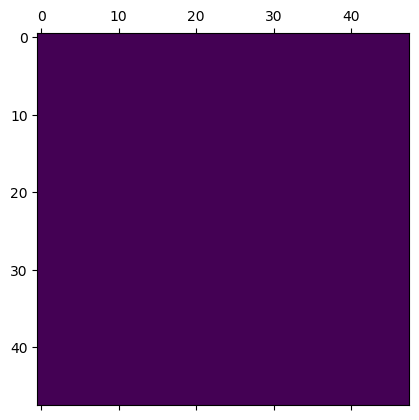

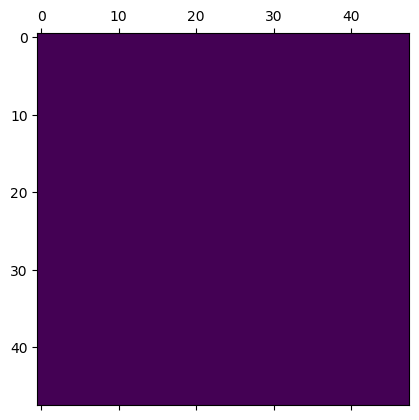

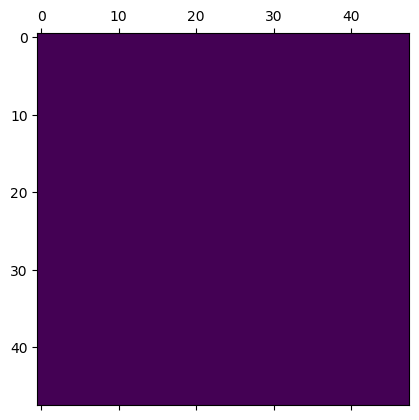

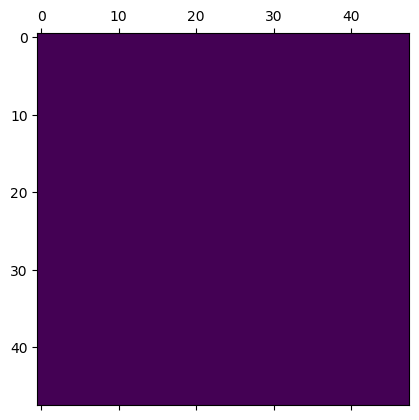

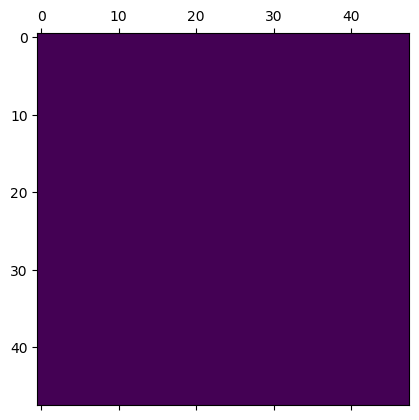

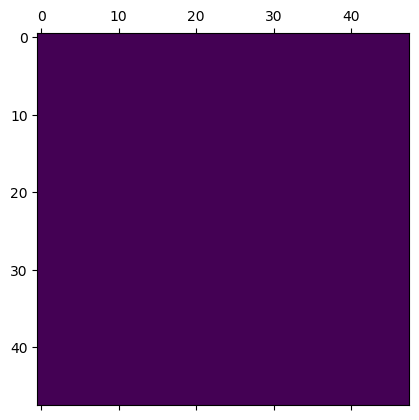

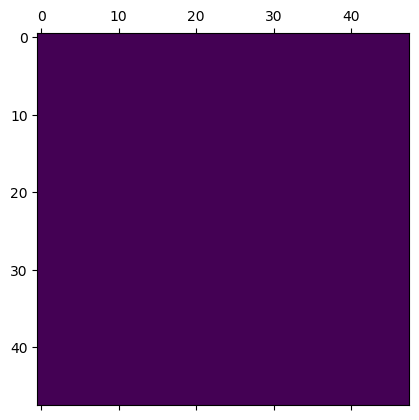

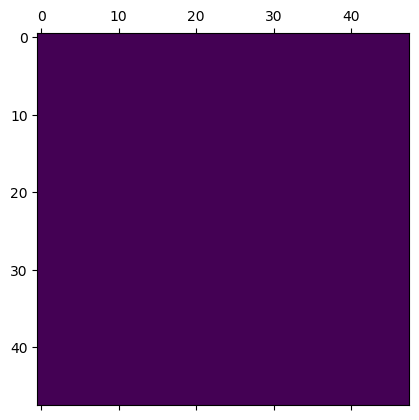

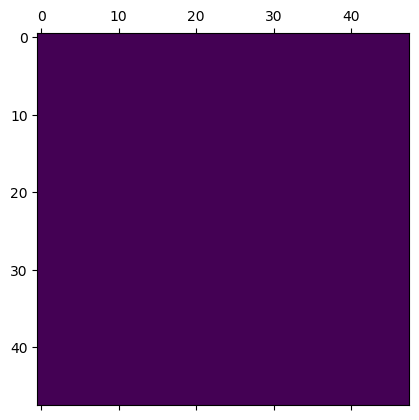

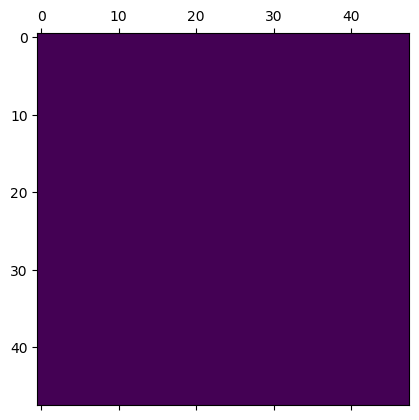

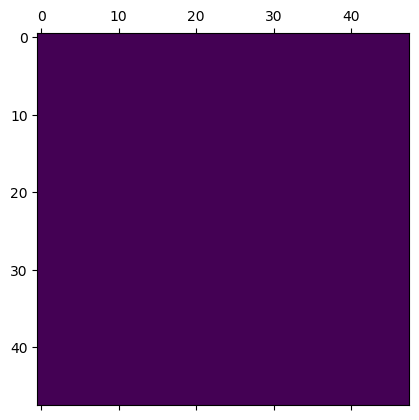

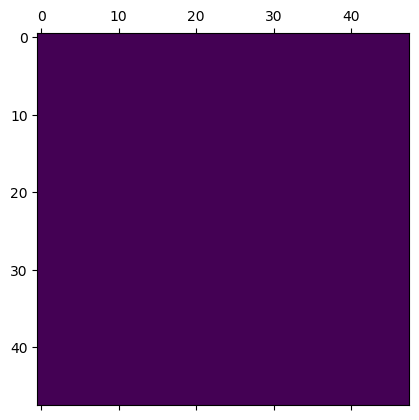

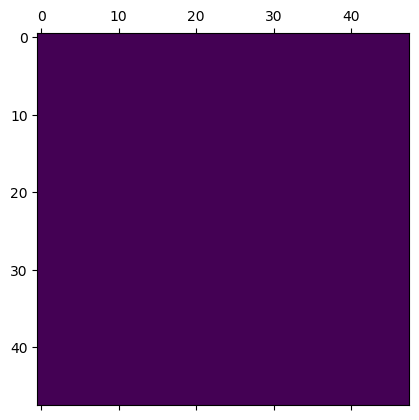

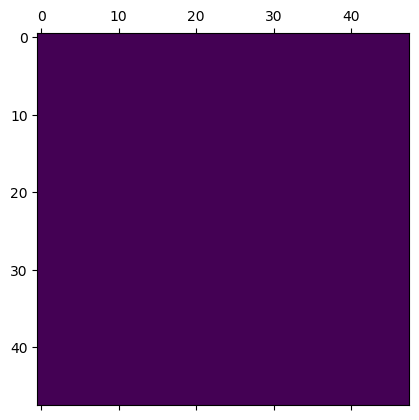

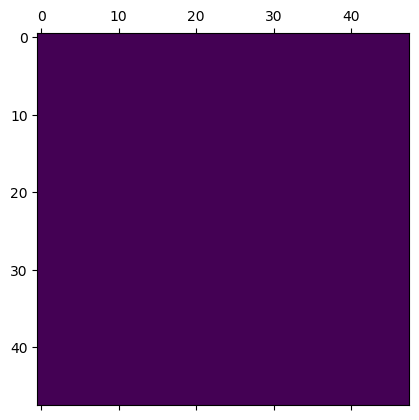

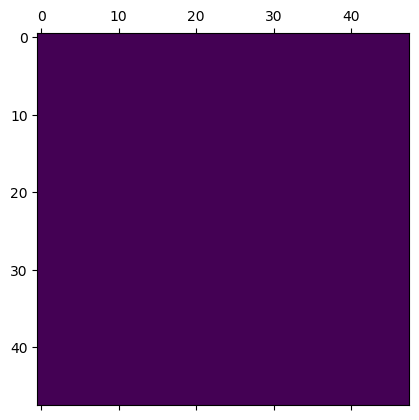

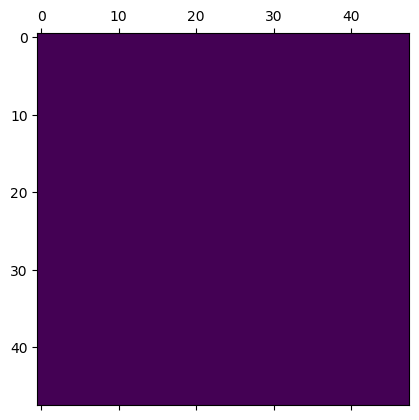

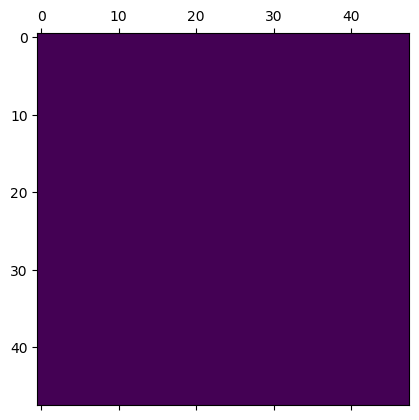

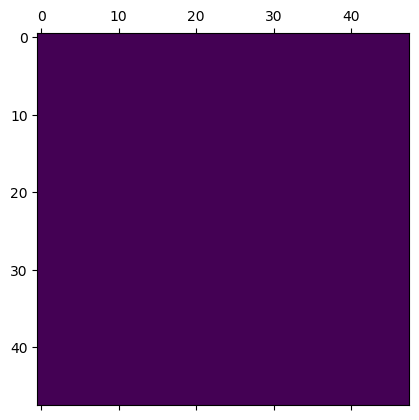

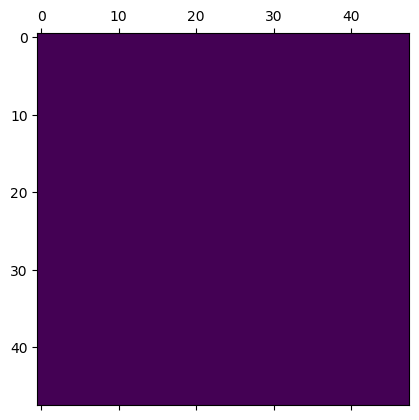

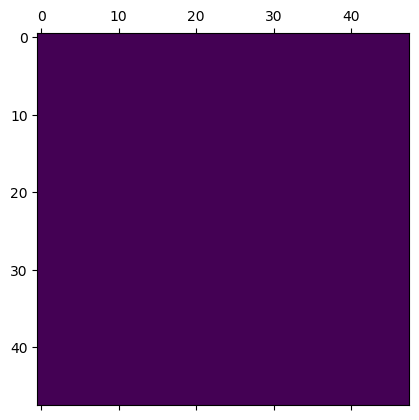

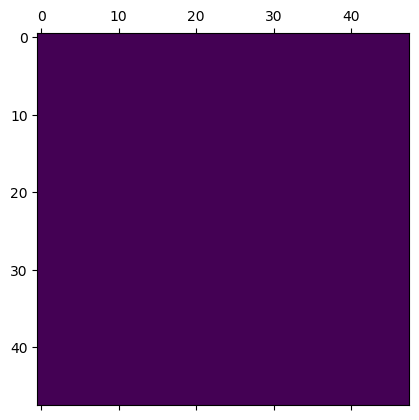

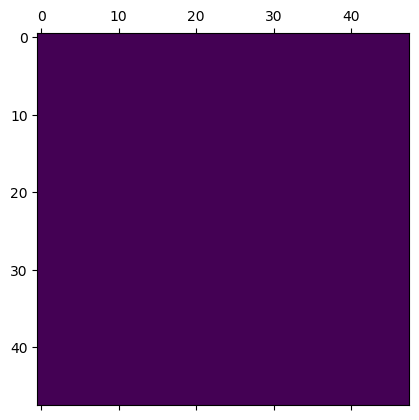

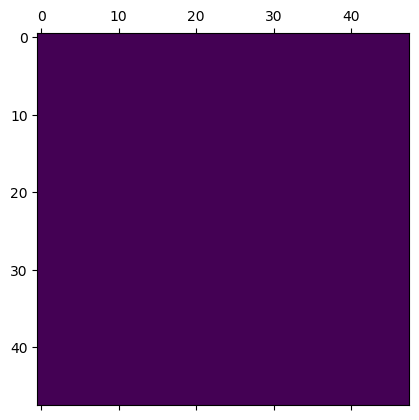

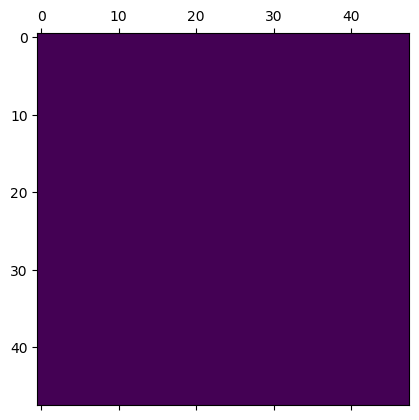

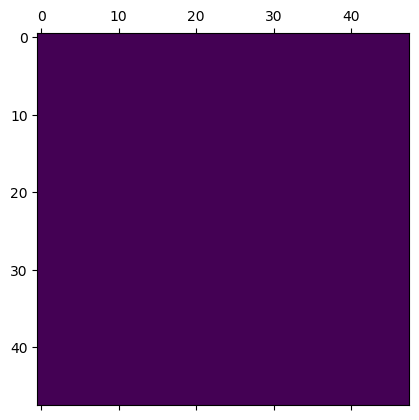

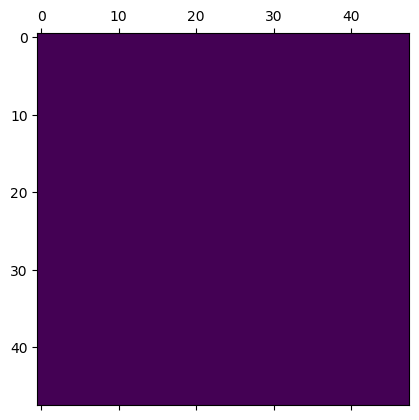

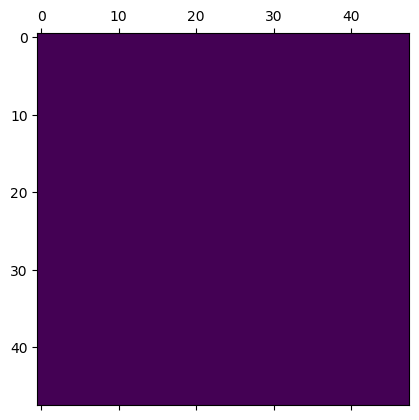

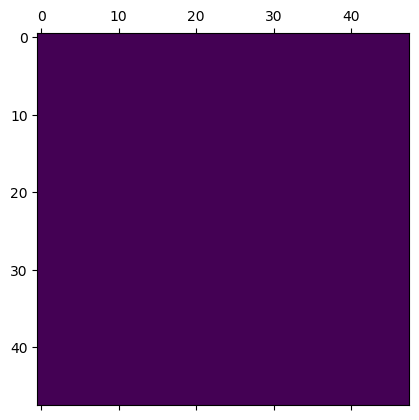

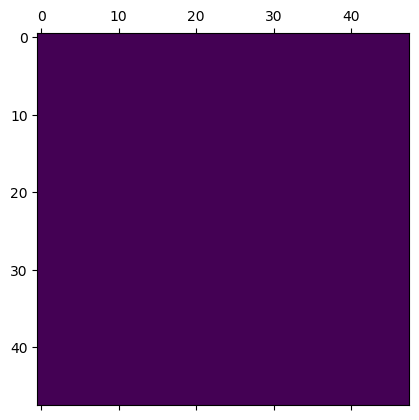

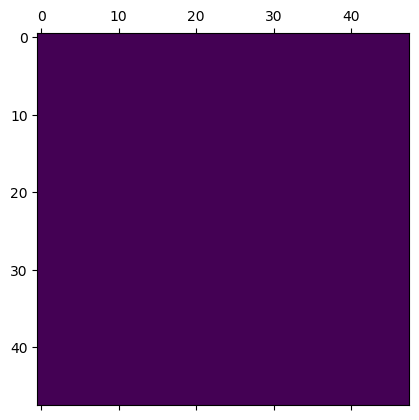

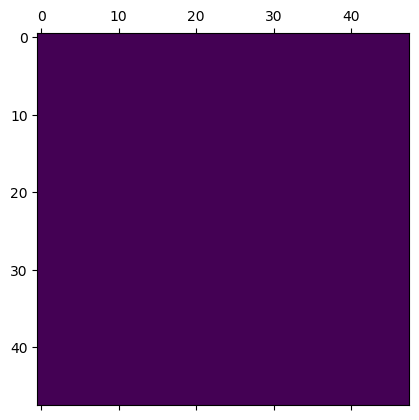

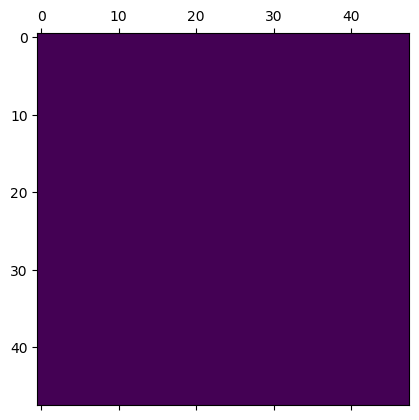

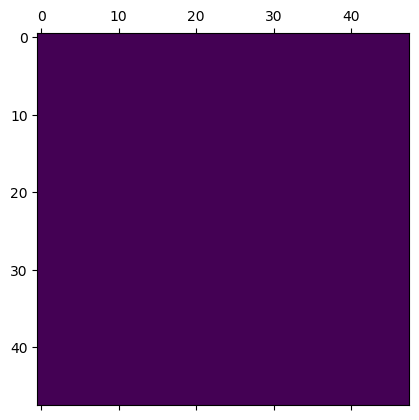

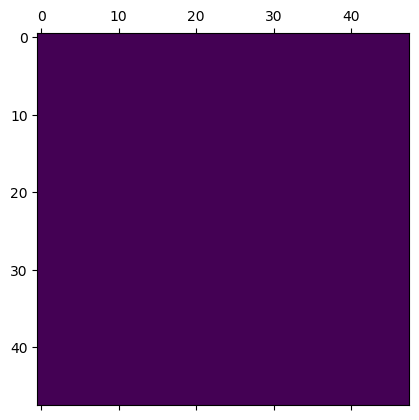

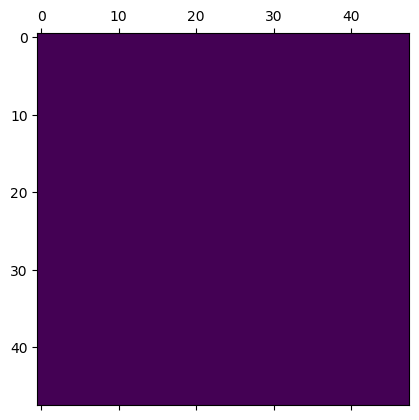

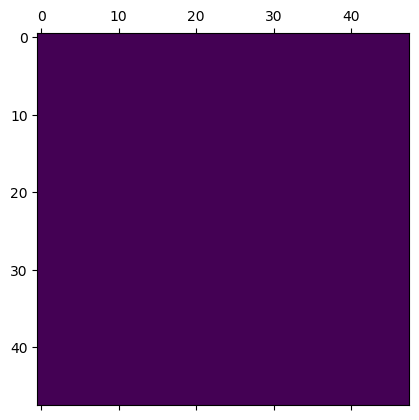

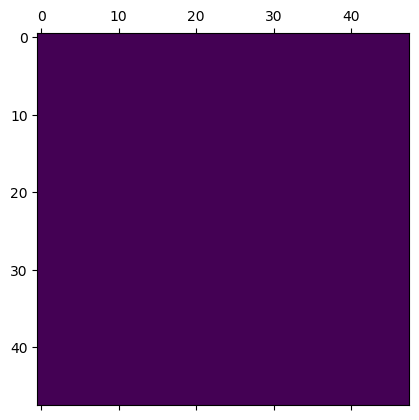

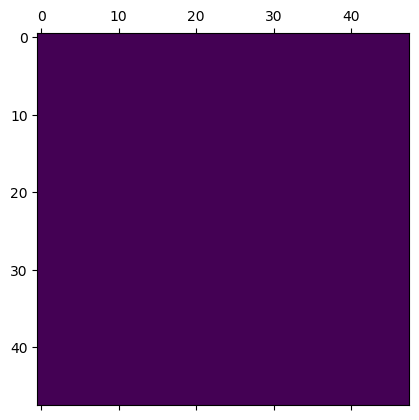

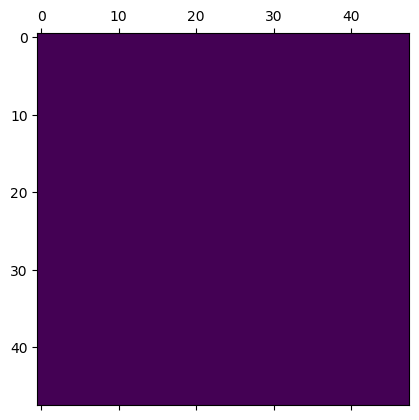

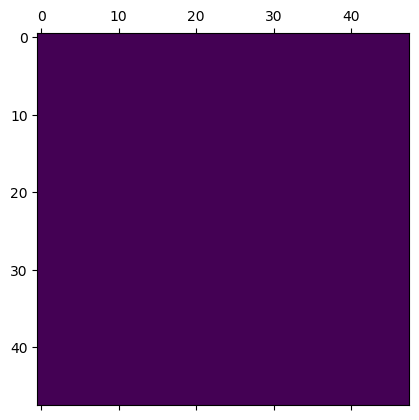

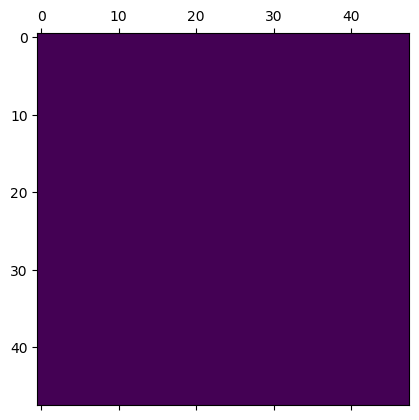

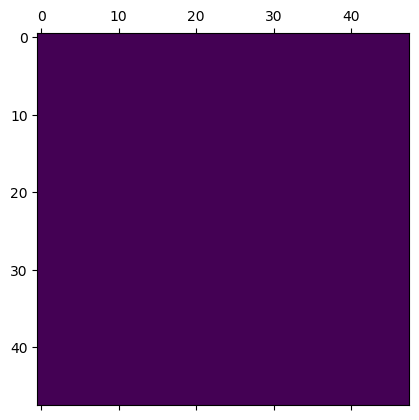

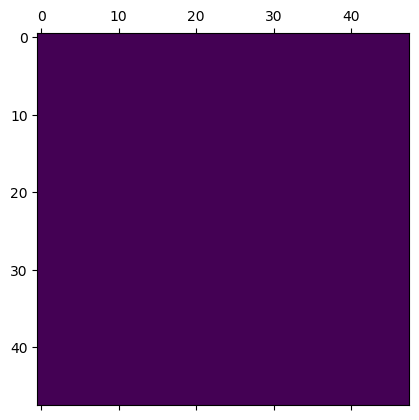

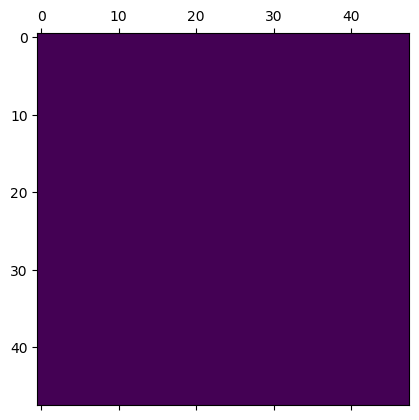

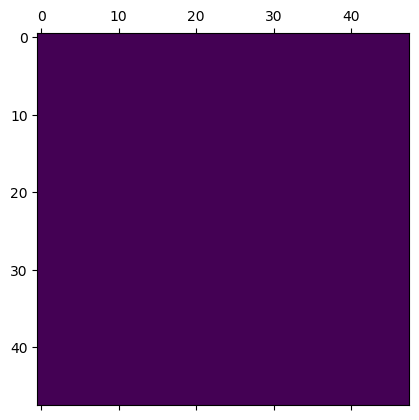

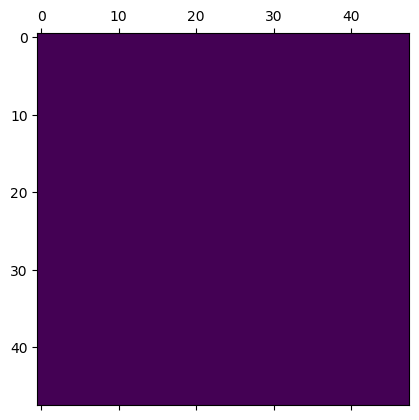

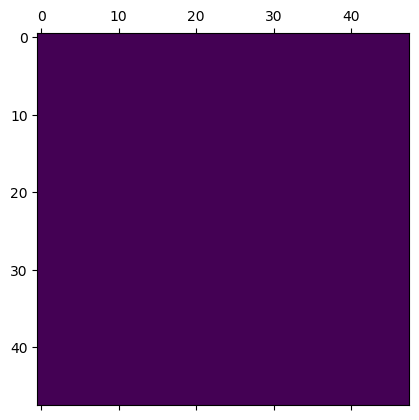

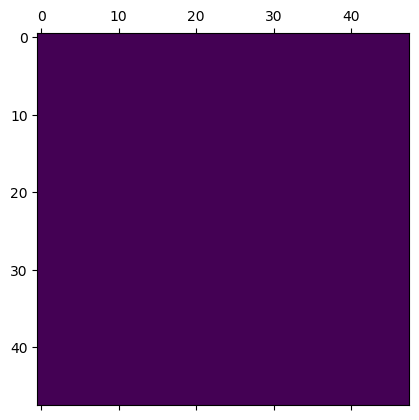

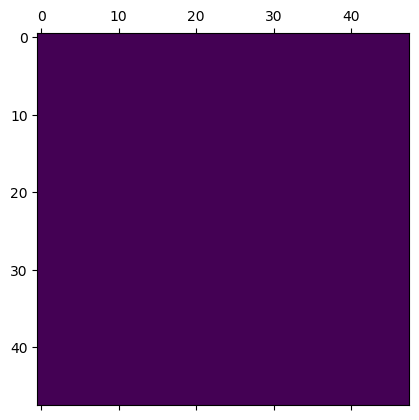

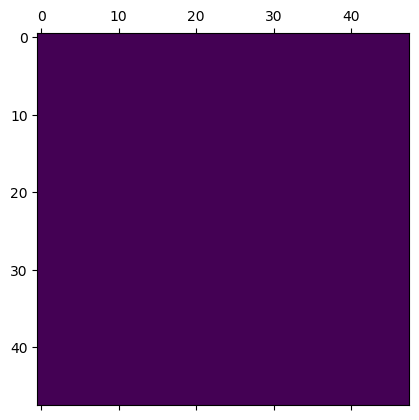

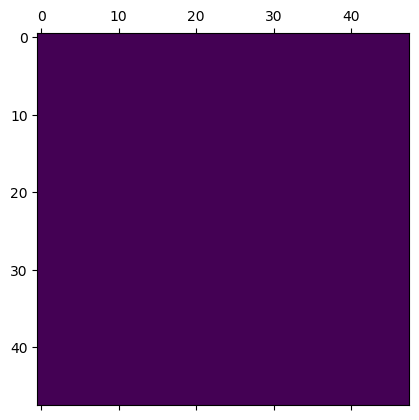

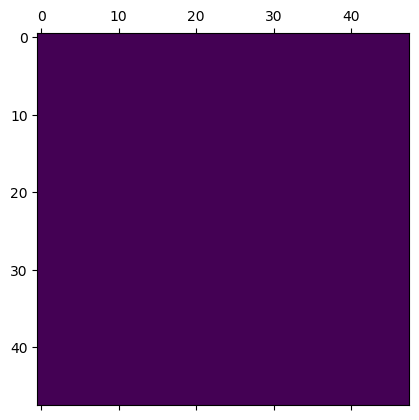

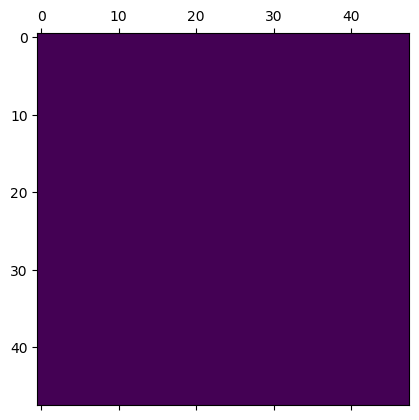

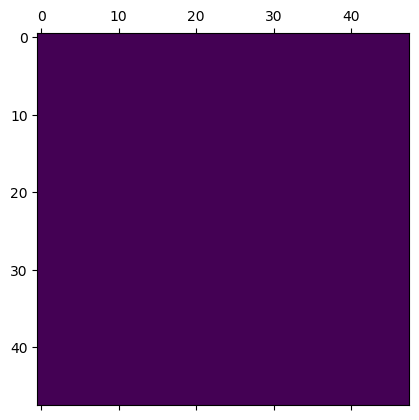

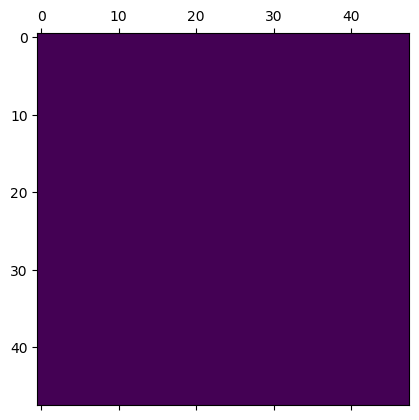

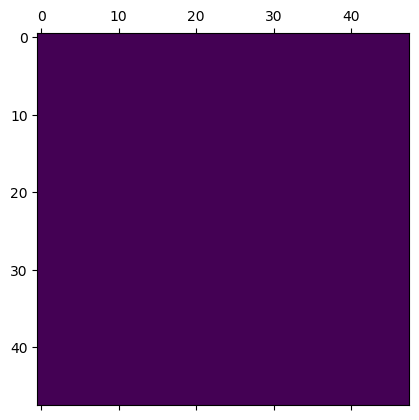

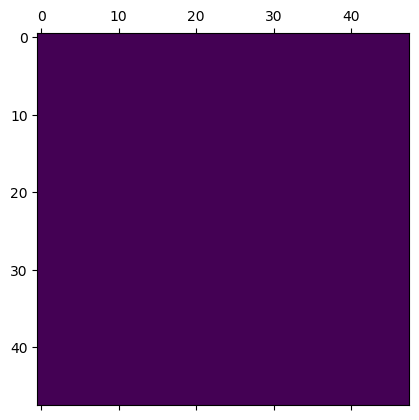

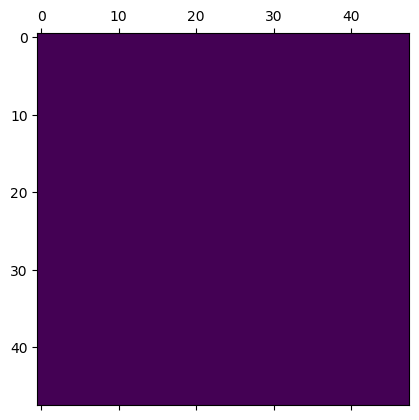

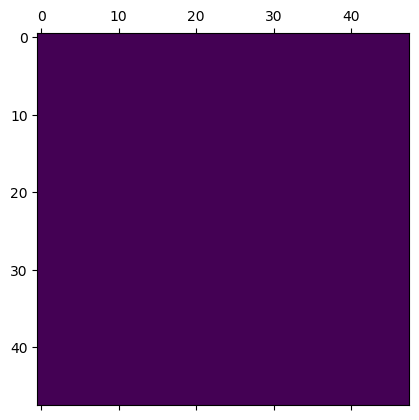

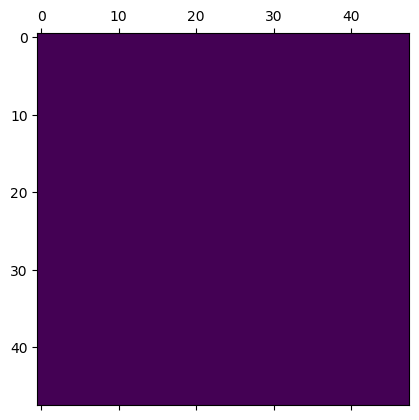

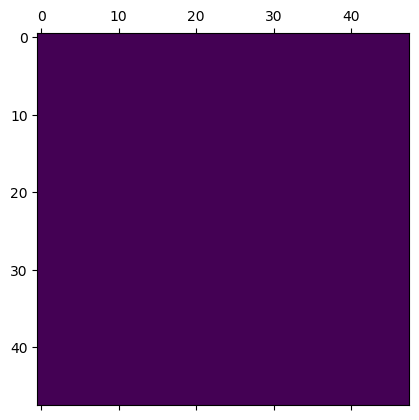

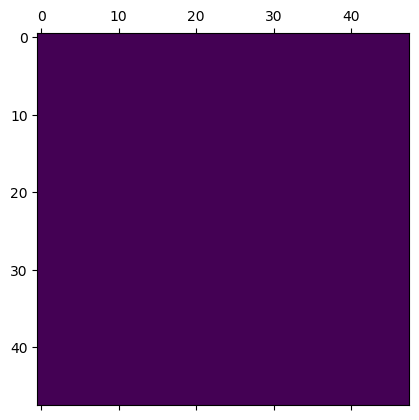

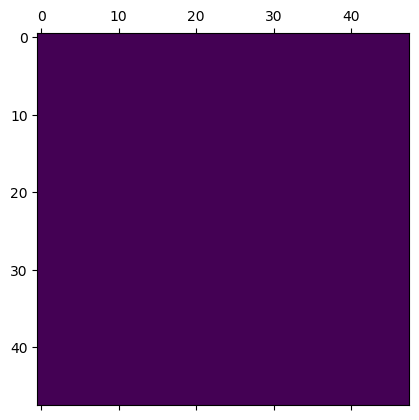

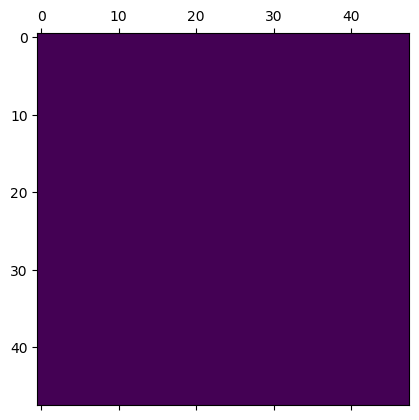

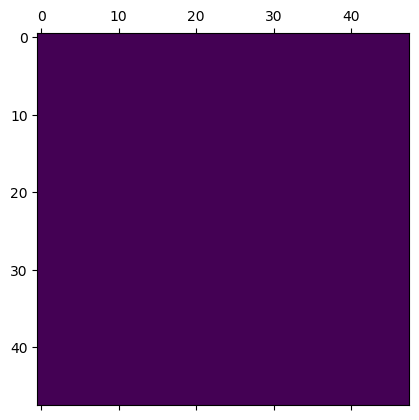

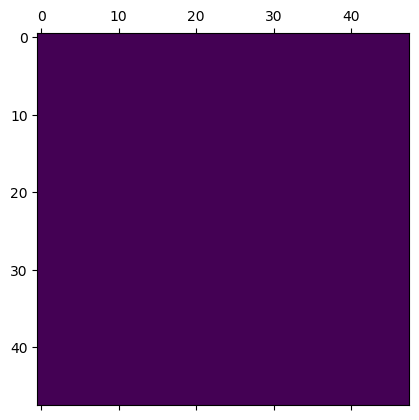

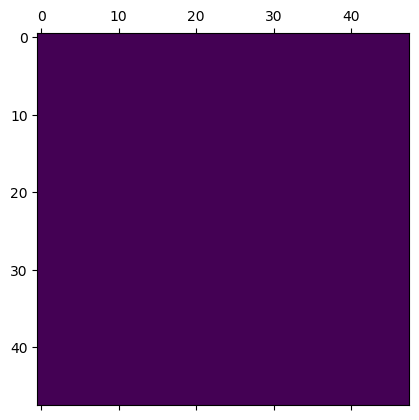

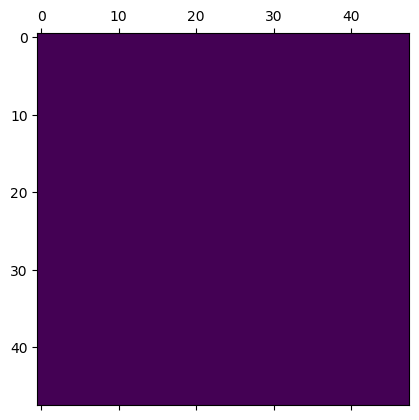

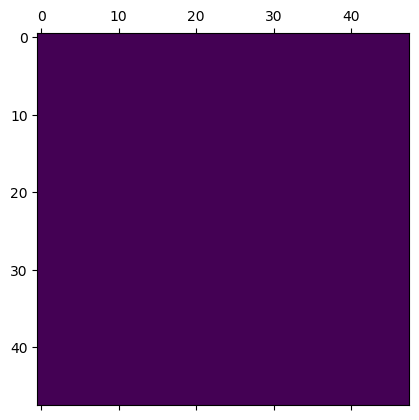

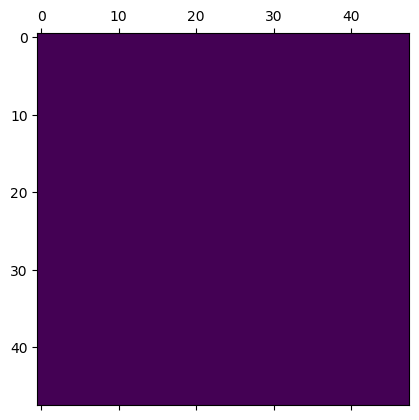

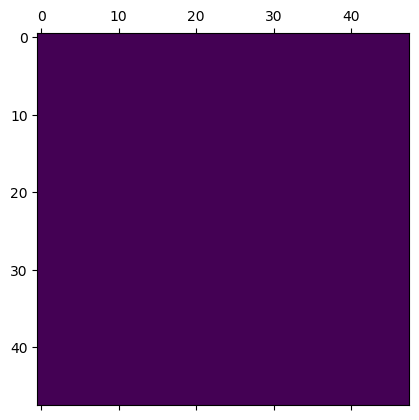

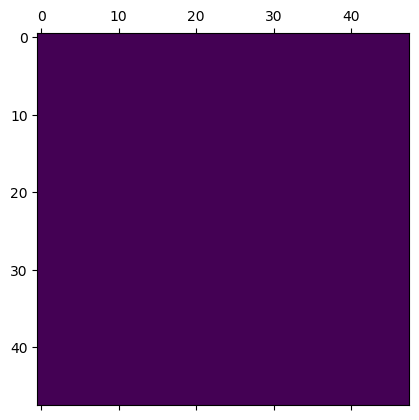

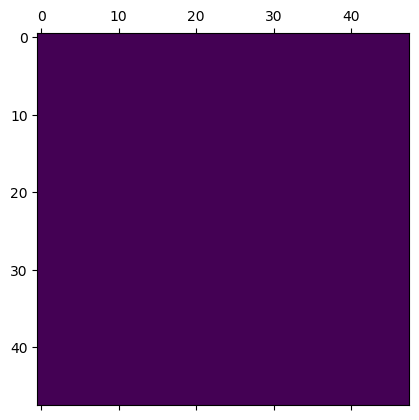

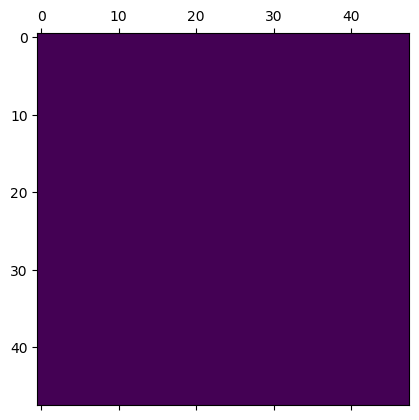

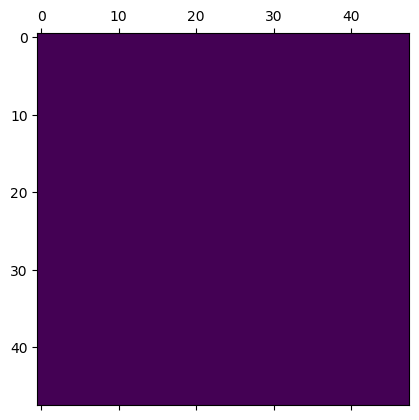

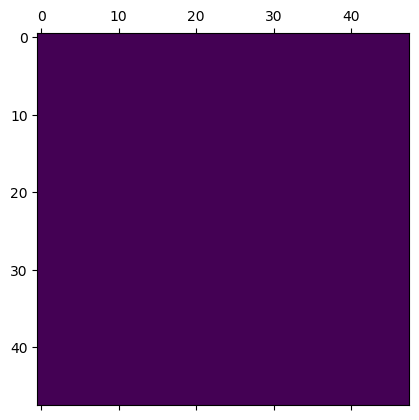

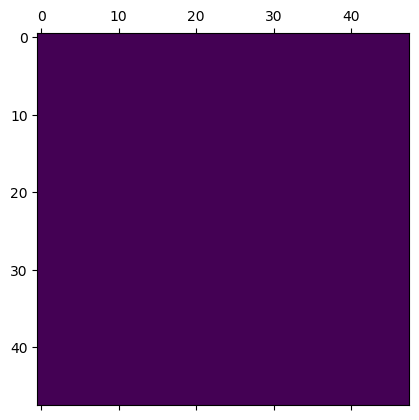

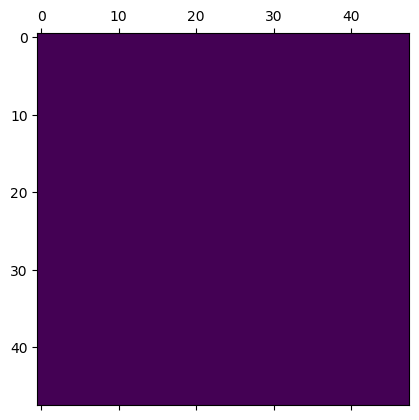

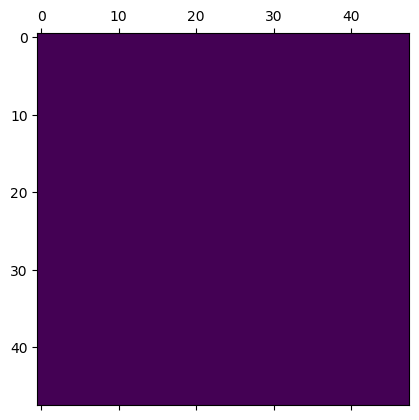

In [250]:
import matplotlib.pyplot as plt
for i in range(gridtensor.size()[0]):
    for j in range(gridtensor.size()[i]):
        plt.matshow(gridtensor[i,j,:,:])

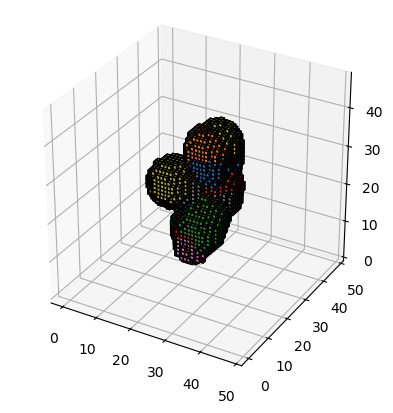

In [252]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
# N1 = 10
# N2 = 10
# N3 = 10
# ma = np.random.choice([0,1], size=(N1,N2,N3), p=[0.99, 0.01])



for i in range(0, len(xs)):
    if len(xs[i]) == 0:
        continue
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_aspect('equal')

    for i in range(gridtensor.size()[0]):
        ax.voxels(gridtensor[i], edgecolor="k")

plt.show()

In [222]:
xs = []
ys = []
zs = []
cs = []

for i in gridtensor:
    x = []
    y = []
    z = []
    c = []
    count_j = 0
    for j in i:
        count_k = 0
        for k in j:
            count_l = 0
            for l in k:
                if (float(i[count_j][count_k][count_l]) != 0.0):
                    x.append(count_j)
                    y.append(count_k)
                    z.append(count_l)
                    c.append(float(i[count_j][count_k][count_l]))
                count_l += 1
            count_k += 1
        count_j += 1
    xs.append(x)
    ys.append(y)
    zs.append(z)
    cs.append(c)

In [242]:
len(xs[1])

1642

In [224]:
qual_das_14 = 1
for i in range(0, len(xs[qual_das_14])):
    print(xs[qual_das_14][i],ys[qual_das_14][i],zs[qual_das_14][i],cs[qual_das_14][i])


19 26 27 0.0007784366607666016
19 26 28 0.0027915239334106445
19 26 29 0.001801133155822754
19 27 27 0.0028203725814819336
19 27 28 0.0061866044998168945
19 27 29 0.004624128341674805
19 27 30 0.0004935264587402344
19 28 27 0.001847386360168457
19 28 28 0.004661917686462402
19 28 29 0.0033327341079711914
19 28 30 0.00015306472778320312
19 29 28 0.0005173683166503906
19 29 29 0.00015974044799804688
20 23 32 0.0001895427703857422
20 23 33 0.001238107681274414
20 23 34 0.00047600269317626953
20 24 27 0.001629471778869629
20 24 28 0.004303455352783203
20 24 29 0.003033757209777832
20 24 30 9.66787338256836e-05
20 24 31 0.0012402534484863281
20 24 32 0.008748173713684082
20 24 33 0.013614416122436523
20 24 34 0.010449528694152832
20 24 35 0.002673625946044922
20 25 26 0.0058536529541015625
20 25 27 0.019834280014038086
20 25 28 0.02848529815673828
20 25 29 0.02468252182006836
20 25 30 0.011495590209960938
20 25 31 0.00690460205078125
20 25 32 0.019717812538146973
20 25 33 0.0271342992782592

0
1
2
3
6
7
8


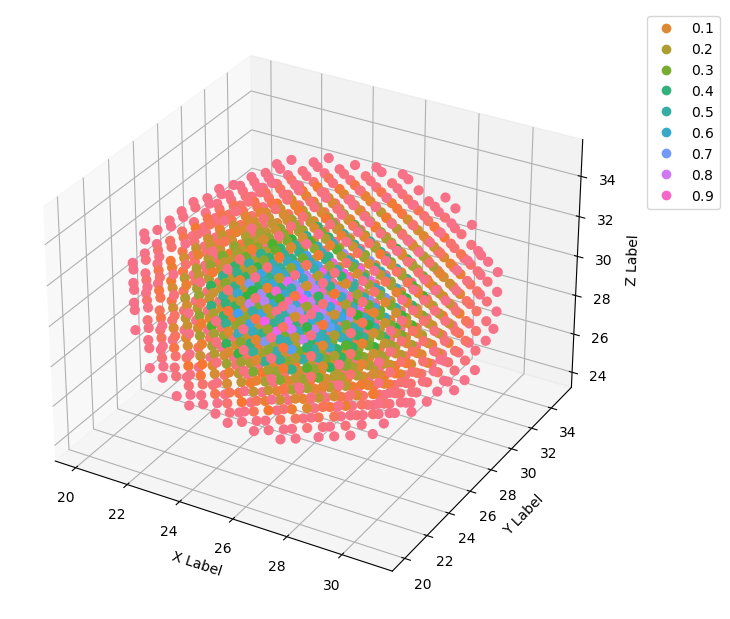

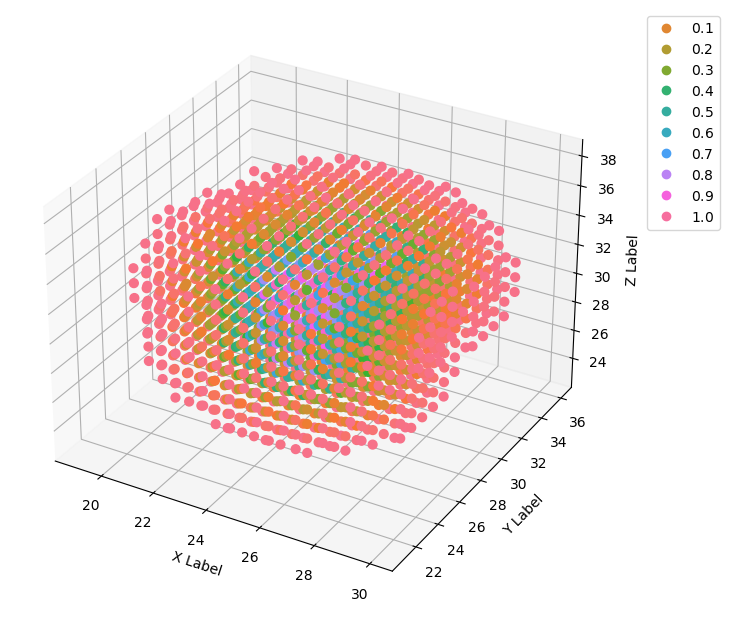

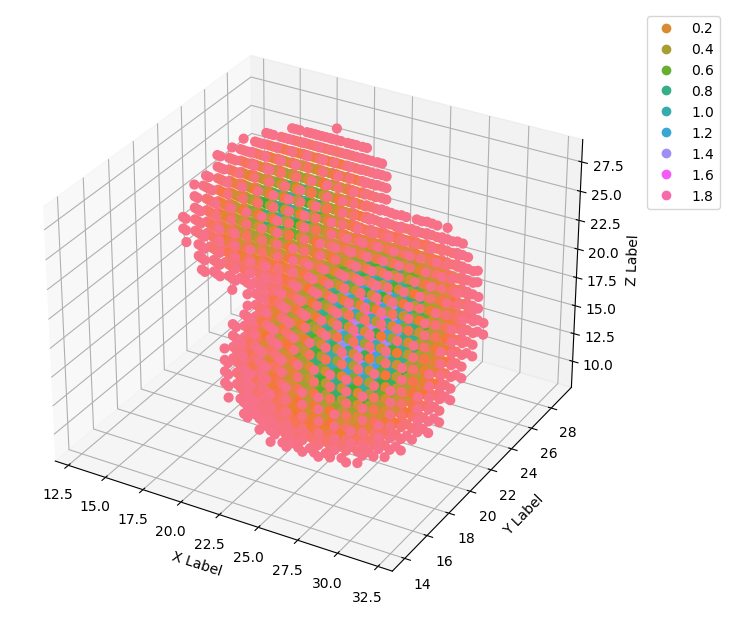

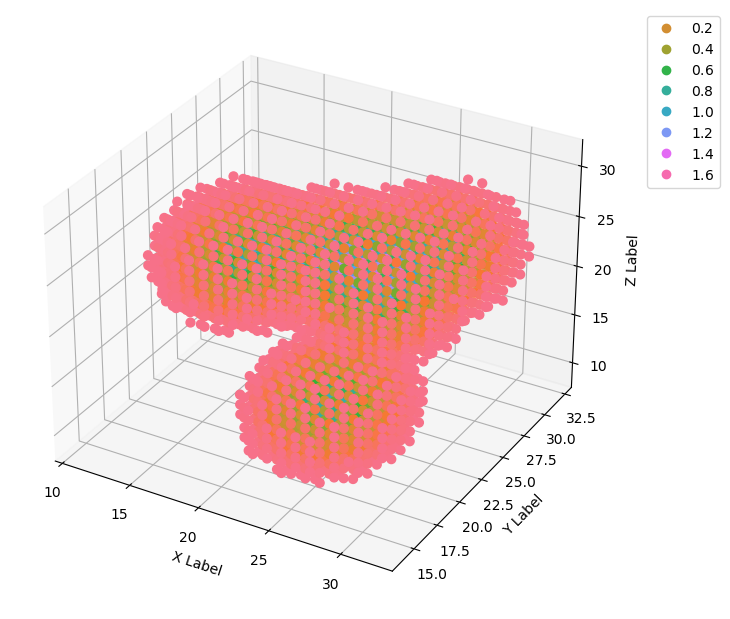

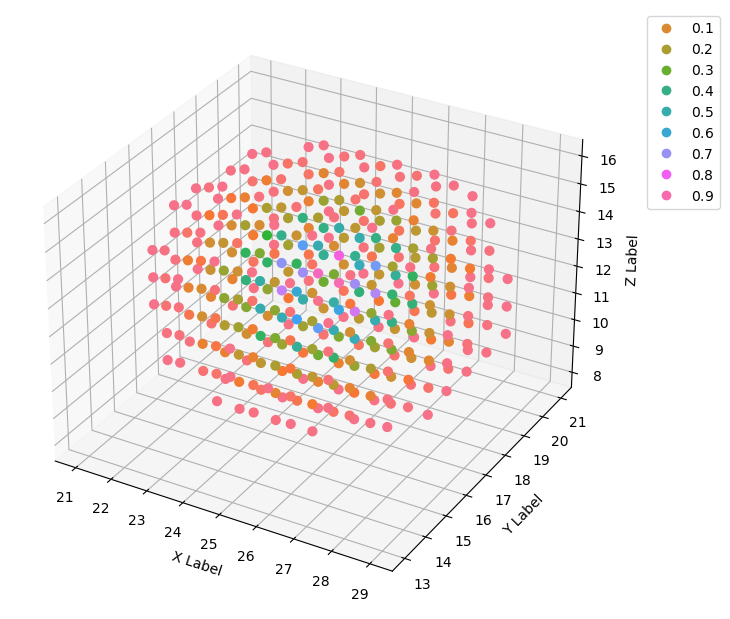

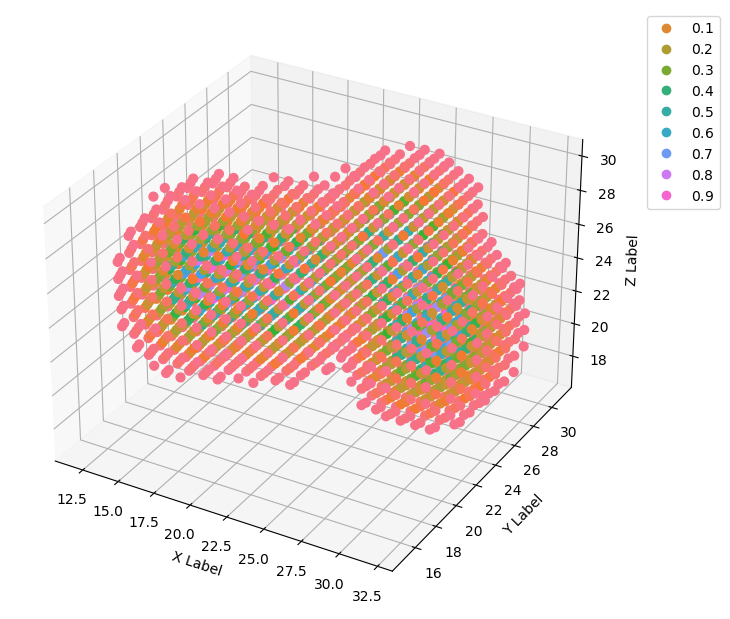

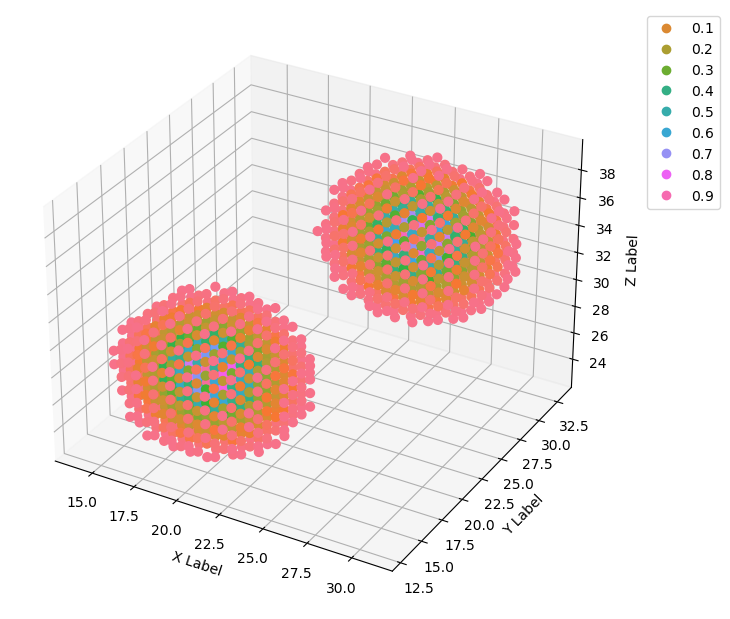

In [245]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


for i in range(0, len(xs)):
    if len(xs[i]) == 0:
        continue
    print(i)
    xis = xs[i]
    yps = ys[i]
    zee = zs[i]

    # axes instance
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)

    # get colormap from seaborn
    cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

    # plot
    sc = ax.scatter(xis, yps, zee, s=40, c=cs[i], marker='o', cmap=cmap, alpha=1)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    # legend
    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

    # save
    plt.savefig("scatter_hue", bbox_inches='tight')